# Tema: **Impacto del COVID-19 en el sector laboral costarricences.

## Identificación del problema

La pandemia de COVID-19 generó suspensiones, reducciones de jornada laboral y desempleo e inactividad, ya sea por incompatibilidad del trabajo desempeñado con la modalidad de teletrabajo, recortes administrativos o por falta de herramientas tecnológicas. Asimismo, las personas que lograron mantenerse laborando durante este periodo vieron un cambio en la calidad de su empleo, debido al aumento de los costos fijos que las medidas sanitarias que las autoridades obligaron a implementar se vieron reflejados en los costos fijos de las eempresas y en reducción de la oferta laboral (esto implicaba una mayor carga laboral para los empleados que permanecieron en las empresas), una menor capacidad utilizada.

Muchos sectores se vieron afectados de manera más inmediata y persistente son los servicios de alojamiento, esparcimiento, comercio, transporte, y aquellos sectores mayormente dependientes del turismo local y foráneo. Por otra parte, el comercio electrónico y los servicios de telecomunicaciones y tecnologías de la información, así como la venta de productos farmacéuticos se vieron favorecidos por el aumento de la demanda de sus productos y servicios. 

El gobierno otorgo la facilidad de retirar el FCL (fondo de capitalización laboral) a aquellos funcionarios que le redujeran o suspendieran su jornada laboral. Los que quedaron desempleados ya tenían ese derecho porque este fondo es un auxilio de cesantía. Por medio de este trámite se tratará de darle seguimieno a la situación laboral de esta población, que en teoría, sería la población economicamente activa.

## Objetivo

> Analizar la afectación de la situación laboral durante lo vivido con la pandemia hasta la fecha.

> Identificar los sectores más afectados, de acuerdo a los retiros de FCL y despidos o suspensiones.

> Identificar la recuperación en el sector laboral.

> Indagar si el tema referente al COVID, fcl y restricciones, realmente fue percibido como un problema por la población costarricense, así como el tipo de sentimientos experimentados en la difusión de las noticias. Este es un breve estuduio cuya finalidad es didactica para entender el funcionamiento del webscraping.


## Preguntas de investigación
*	¿En que sectores permanecieron las personas que no fueron despedidas o que recperaron su ocupación durante la pandemia de COVID-19? 
*	¿Cuales fueron los sectores más afectados? 
*   ¿A que sectores regresaron los trabajadores de los sectores más afectados? 
*	¿Qué parte de la estructura productiva fue la más golpeada: micros, pequeñas, medianas o grandes empresas?
*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al covid, FCL y jornada laboral?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?

#  Analisis de comportamiento laboral por COVID
### Se va a predecir...

Los empleados de Costa Rica en época de pandemia se vieron obligados a reducir su lornada laboral o bien ser suspendidos temporalmente. En casos peores fueron despedidos.

Los trabajadores son la fuerza laboral de un país y son los que sostienen la economía. ¿Qué pasa si estos trabajadores no logran recuperar sus trabajos o sus ingresos, cómo se verá afectado el país? Por lo tanto, la tasa de desempleo o subempleo es una de las métricas más importantes para mostrar la economía del país.

La tasa de salida del trabajador por concepto de COVID es un KPI para comprender lo que esta pasando. Esta tasa representa el porcentaje de trabajadores que quedaron desempleado o subempleados por la pandemia.

Se tratará de identificar cual es la tasa de recuperación posible con base en las variable obtenidas. 

## Tabla de contenido
### 1) Introducción

> * Dataset, caracteristicas(features) y objetivo(target value)
> * Descripción del problema

### 2) Análisis descriptivo y EDA (Análisis de datos exploratorios)

> * Desempleado y correlación entre (variables)features
> * Perfil de los trabajadores desempleados
> * Distribución salarial anterior y nueva --Tenure and Monthly charges distribution

### 3) Analisis de Clusters

> * Detección de clústeres de desempleado
> * Análisis de clústeres de desempleados: por datos demográficos, edad y estado civil, y si se consiguiera por sector y zona geografica

### 4) Modelo de predicción de desempleados

> * Proceso de modelo de predicción 
> * Evaluación del modelo

In [1]:
__author__ = "Eduardo Oreamuno"
__email__ = "eoaparicio@yahoo.com"

### 1. Introduction

Conjunto de datos (dataset) , características (features) y valor objetivo (target value)
Source : Superintendencia de Pensiones

La SUPEN proporcionó datos anonimos de los trabajadores para la industria de pensiones por medio de los retiros del FCL realizados, para predecir la pérdida de empleos por COVID en función de la información demográfica, y otros datos. El objetivo principal aquí es analizar el comportamiento de los trabajadores que retiraron dicho fondo y predecir el comportamiento que podría tener en un futuro.

La información tiene información relacionada a,

Demográfico:
* Género: Masculino - Femenino - Desconocido
* Rango de edad:
* Pensionado

Salarial
   * Salario final tras COVID
   * Salario nuevo post COVID
   * Si tuvo reducción
   * Si se pensionó
    
Se esta tratando de obtener información de patronos, para poder proporcionarle más caracteristicas al estudio, como el sector o la zona geografica.

Objetivo:
* Desempleado - ¿Si el trabajador recuperará o no el trabajo?

### Descripción del problema

* ¿Por qué a los trabajadores retiran el FCL? 

> * Por extinción laboral
> * Por suspensión laboral
> * Por reducción laboral 

* ¿Por qué a los trabajadores los desemplean? 

>    * Altos Salarios
>    * Pocos ingresos **No tenemos esto para evaluarlo.**
>    * Sectores afectado **Con la de patronos se podrá obtener.**
>    * Zonas geofráficas
>    * Grupos etarios 
>    * Otras razones
    
* ¿Cómo detectar al trabajador despedido?

>    * Monitoreo
>    * Seguimiento salarial 
>    * Seguimiento de aportes


### 2. Análisis descriptivo y EDA (Análisis de datos exploratorios)

Aquí, se han explorado datos, características y para tratar de tener algo de intuición sobre ellos.

### Cargar bibliotecas(libraries) y conjunto de datos (dataset)

In [2]:
import pandas as pd
import numpy as np
import math as math
import random
from sklearn.utils import shuffle
import sklearn.preprocessing  as prepro
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
from adjustText import adjust_text

#constantes
random_state = 42
plotColor = ['c','palegreen','salmon','plum','aquamarine', 'y','tan','peru']
#markers = ['+','o','*','^','v','>','<','-','#']
markers = ['P','H','*','^','v','>','<','D','s']

#set up
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
# Create Data class which has load_data method
class Data:
    def __init__(self):
        print("Data object initiated")
    
    def Load_data(self,filepath,format='csv'):
        """ Read data from file and return data """
        if format == 'csv':
            return pd.read_csv(filepath, encoding = 'utf8', sep=",")
        elif format == 'xlsx':
            return pd.read_excel(filepath)

In [4]:
#data_file = 'Prueba1.csv'
data_file = 'RetirosFCLNuevo.csv'
extension = 'csv'

data = Data()
df_raw = data.Load_data(data_file, extension)
df_raw.columns =['Afiliado','Periodo','Edad','RangoEdad','Genero','EstadoCivil','EstCiv','HayRetiro','TipoRetiro','Salario','RangoSalario','SalarioPromedioRetorno','RangoSalarioRetorno','Reduccion','%Reduccion','TuvoReduccion','FechaRetorno','FechaUltimoAporte','HayAportes','Pensionado','Difunto','MesDesempleadoAntesRetorno','MesesDesempleado','MesesTrancurridos','Desempleado']


Data object initiated


### Dimensionalidad & comprobación de estado

In [5]:
# Observar las dimensiones dle conjunto de datos
df_raw.shape

(532637, 25)

In [6]:
# Observar la estrctura delconjunto de datos
df_raw.head().T
#df_raw.groupby('Desempleado').count()

,0,1,2,3,4
Afiliado,27,217,227,286,345
Periodo,2020-05-31,2021-03-31,2020-08-31,2021-02-28,2020-10-31
Edad,85,77,76,75,73
RangoEdad,Entre59y100,Entre59y100,Entre59y100,Entre59y100,Entre59y100
Genero,F,M,F,F,M
EstadoCivil,4,1,2,1,3
EstCiv,VIUDO,SOLT,CASAD,SOLT,DIVOR
HayRetiro,1,1,1,1,1
TipoRetiro,E,E,E,E,E
Salario,538592,0,0,0,64908


In [7]:
# Información del conjunto d edatos
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532637 entries, 0 to 532636
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Afiliado                    532637 non-null  int64  
 1   Periodo                     532637 non-null  object 
 2   Edad                        532637 non-null  int64  
 3   RangoEdad                   532637 non-null  object 
 4   Genero                      532637 non-null  object 
 5   EstadoCivil                 532637 non-null  int64  
 6   EstCiv                      532637 non-null  object 
 7   HayRetiro                   532637 non-null  int64  
 8   TipoRetiro                  532637 non-null  object 
 9   Salario                     532637 non-null  float64
 10  RangoSalario                532637 non-null  int64  
 11  SalarioPromedioRetorno      532637 non-null  float64
 12  RangoSalarioRetorno         532637 non-null  int64  
 13  Reduccion     

Se puede observar que algunos datos tienen valores perdidos.Esos valores faltantes debemos manejarlos de alguna forma para que nuestro modelo funcione con precisión. 

In [8]:
df_raw.describe(include='all')

,Afiliado,Periodo,Edad,RangoEdad,Genero,EstadoCivil,EstCiv,HayRetiro,TipoRetiro,Salario,...,TuvoReduccion,FechaRetorno,FechaUltimoAporte,HayAportes,Pensionado,Difunto,MesDesempleadoAntesRetorno,MesesDesempleado,MesesTrancurridos,Desempleado
count,5.326370e+05,532637,532637.000000,532637,532637,532637.000000,532637,532637.0,532637,5.326370e+05,...,532637.000000,336379,336379,532637.000000,532637.000000,532637.000000,532637.000000,532637.000000,532637.000000,532637.000000
unique,NaN,14,NaN,5,3,NaN,6,NaN,3,NaN,...,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2020-05-31,NaN,Entre31y45,M,NaN,SOLT,NaN,E,NaN,...,NaN,2020-06-30,2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,93805,NaN,214653,348817,NaN,283656,NaN,407222,NaN,...,NaN,59758,106892,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.958359e+06,NaN,38.580266,NaN,NaN,1.242308,NaN,1.0,NaN,4.654147e+05,...,0.519187,NaN,NaN,2.430490,0.055006,0.001528,3.750156,5.103132,8.085405,0.739969
std,1.703682e+06,NaN,12.195244,NaN,NaN,1.139581,NaN,0.0,NaN,1.491551e+06,...,0.499632,NaN,NaN,3.035202,0.227991,0.039063,4.042361,4.274412,3.994882,0.438651
min,2.700000e+01,NaN,16.000000,NaN,NaN,0.000000,NaN,1.0,NaN,-4.576663e+06,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.479164e+06,NaN,29.000000,NaN,NaN,1.000000,NaN,1.0,NaN,1.792333e+05,...,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.000000
50%,3.005000e+06,NaN,36.000000,NaN,NaN,1.000000,NaN,1.0,NaN,3.198333e+05,...,1.000000,NaN,NaN,1.000000,0.000000,0.000000,1.000000,5.000000,10.000000,1.000000
75%,4.522775e+06,NaN,47.000000,NaN,NaN,2.000000,NaN,1.0,NaN,4.800000e+05,...,1.000000,NaN,NaN,4.000000,0.000000,0.000000,6.000000,9.000000,11.000000,1.000000


Para los parámetros numéricos, se completaron campos como la media, la desviación estándar, los percentiles y el máximo. Para las características categóricas, se han completado el recuento, el único, el superior (valor más frecuente) y la frecuencia correspondiente. Esto nos da una idea amplia de nuestro conjunto de datos.

En la identificación de datos hecha en POWER BI, ya se habien emcontrado algunos valores extraños los cuale sprocederemos a ir eliminando por que no impactan el la muestra.

* Crear Columna de brechas
* Convertir en fecha la columnas Periodo, FechaRetorno y FechaUltimo Aporte

In [9]:
# Crear Columna de brechas
# Convertir en fecha la columnas Periodo, FechaRetorno y FechaUltimo Aporte
df_work = df_raw.copy()

df_work['Periodo'] = pd.to_datetime(df_work['Periodo'])
df_work['FechaRetorno'] = pd.to_datetime(df_work['FechaRetorno'])
df_work['FechaUltimoAporte'] = pd.to_datetime(df_work['FechaUltimoAporte'])
df_work['Periodo'] = pd.to_datetime(df_work['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#FechaCorte = '2021-03-31'
#df_work['DiferenciaBrechas'] = df_work['RangoSalario'] - df_work['RangoSalarioRetorno']
#df_work['DiferenciaBrechas'] = np.where(df_work['DiferenciaBrechas']<=0, 0, df_work['DiferenciaBrechas'])

# Para que solo consideresi existen y las interprete como binarias
df_work['DiferenciaBrechas'] = np.where(df_work['RangoSalario'] - df_work['RangoSalarioRetorno'] > 0,1,0) #np.select(condicion,values,default=0)
df_work['MesDesempleadoAntesRetorno'] = np.where(df_work['MesDesempleadoAntesRetorno'] > 0, 1, 0)
df_work['MesesDesempleado'] = np.where(df_work['MesesDesempleado'] > 0, 1, 0)
df_work['HayAportes'] = np.where(df_work['HayAportes'] > 0, 1, 0)
# Hay slo 30 registros que genero en X, mejor cambiarlos con la mayoria para no afectar por un elemento más el modelo.
df_work['Genero']= df_work['Genero'].replace(['X'],['M'])                             

df_work.head().T

,0,1,2,3,4
Afiliado,27,217,227,286,345
Periodo,2020/05,2021/03,2020/08,2021/02,2020/10
Edad,85,77,76,75,73
RangoEdad,Entre59y100,Entre59y100,Entre59y100,Entre59y100,Entre59y100
Genero,F,M,F,F,M
EstadoCivil,4,1,2,1,3
EstCiv,VIUDO,SOLT,CASAD,SOLT,DIVOR
HayRetiro,1,1,1,1,1
TipoRetiro,E,E,E,E,E
Salario,538592,0,0,0,64908


Identificar filas duplicadas

In [10]:
# Identificar valor duplicados
valoresduplicados = df_work.duplicated()
print(valoresduplicados.sum())
df_work[valoresduplicados]

0


,Afiliado,Periodo,Edad,RangoEdad,Genero,EstadoCivil,EstCiv,HayRetiro,TipoRetiro,Salario,...,FechaRetorno,FechaUltimoAporte,HayAportes,Pensionado,Difunto,MesDesempleadoAntesRetorno,MesesDesempleado,MesesTrancurridos,Desempleado,DiferenciaBrechas


* No tenemos filas duplicadas

* Eliminar columnas innecesarias

In [11]:
# Se descartan filas y columnas innecesarias
X = df_work.copy()

X.drop(['Afiliado','EstadoCivil','FechaRetorno','FechaUltimoAporte'], axis=1, inplace=True)
X.drop(['Reduccion', '%Reduccion','MesesTrancurridos'], axis=1, inplace=True)

df_work= X.copy()
#df_work.head(10)

In [12]:
#df_work.rename(columns={'EstCiv':'EstadoCivil'
#                       ,'DiferenciaBrechas':'Brecha'
#                       ,'MesDesempleadoAntesRetorno':'InactivoPostRetiro'
#                       ,'MesesDesempleado':'InactivoPostUltAporte'
#                      }
#              ,inplace=True)

In [13]:
cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","TipoRetiro","TuvoReduccion","HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]
num_cols = ["Salario","SalarioPromedioRetorno","Edad"]
#num_cols = num_cols + ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]
target_col = 'Desempleado'
nominal_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","TipoRetiro"]
binary_cols = ["Pensionado","TuvoReduccion", "Difunto"]
binary_cols = binary_cols + ["HayAportes","Brecha","InactivoPostUltAporte","InactivoPostRetiro"]
monto_cols = ["Salario","SalarioPromedioRetorno","Edad"]

In [14]:
# Chequeando valores nulos o extraños
df_work.isnull().any()

Periodo                       False
Edad                          False
RangoEdad                     False
Genero                        False
EstCiv                        False
HayRetiro                     False
TipoRetiro                    False
Salario                       False
RangoSalario                  False
SalarioPromedioRetorno        False
RangoSalarioRetorno           False
TuvoReduccion                 False
HayAportes                    False
Pensionado                    False
Difunto                       False
MesDesempleadoAntesRetorno    False
MesesDesempleado              False
Desempleado                   False
DiferenciaBrechas             False
dtype: bool

No se identificaron valores faltantes. Sin embargo, si se hubieran encontrado se podrían manejar de la siguiente manera 

* **Elimine los valores perdidos:** si el conjunto de datos es grande y los valores perdidos son muy pocos, se pueden eliminar los valores directamente porque no tendrá mucho impacto. 
* **Reemplazar con valores medios:** se puede reemplazar con valores medios, pero esto no es aconsejable en caso de que los datos tengan **"outliers"**. 
* **Reemplazar con la mediana:** se puede reemplazar con la mediana, y se recomienda en caso de que los datos tengan **outliers**. 
* **Reemplazar con la moda:** se puede hacer esto con las características categóricas. 
* **Regresión:** se puede usar para predecir el valor nulo usando otros detalles del conjunto de datos. 

### Se identificaran valores extraños

* Salarios menores iguales a 0
* Edad mayor a 100 para trabajadores activos, los cuales se espera que vengan en el set de datos
* Salarios **outliers**

In [15]:
def detectar_outlier(data):
    # find q1 and q3 values
    q1, q3 = np.percentile(sorted(data), [1, 99])  #Antes 25 y 75
 
    # compute IRQ
    iqr = q3 - q1
 
    # find lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
 
    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
    return outliers

In [16]:
print(df_work['Salario'].count())
print('Salarios menores a 0 : ',df_work[df_work.Salario<0].shape[0])
print('Salarios Retorno menores a 0 : ',df_work[df_work.SalarioPromedioRetorno<0].shape[0])
print('Salarios iguales a 0 : ', df_work[df_work.Salario==0].shape[0])
print('Empleados activos con edades superiores a 100 : ',df_work[df_work.Edad>100].shape[0])
print('Salarios anómalos ',len(detectar_outlier((df_work['Salario']))))
print('Salarios de retorno anómalos ',len(detectar_outlier((df_work['SalarioPromedioRetorno']))))

532637
Salarios menores a 0 :  6
Salarios Retorno menores a 0 :  0
Salarios iguales a 0 :  14528
Empleados activos con edades superiores a 100 :  20
Salarios anómalos  796
Salarios de retorno anómalos  797


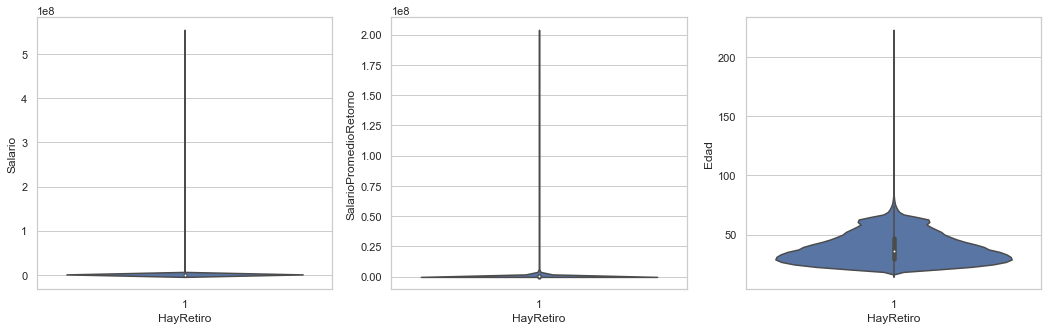

In [17]:
fig , ax = plt.subplots(1,3,figsize=(18,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,monto_cols):
    sns.violinplot(x=df_work["HayRetiro"], y=df_work[col],ax=axis)

Eliminar valores anomalos,

In [18]:
# Se descartan filas y columnas innecesarias
X = df_work.copy()

# Limpiamos datos de salarios y edad extraños
# Se borran 18 registros con edades > 100 se asumen como anomalias.
X = X.drop(X[X['Edad']>100].index)

# Se borra salario menor que 0
X = X.drop(X[X['Salario']<0].index)
X = X.drop(X[X['SalarioPromedioRetorno']<0].index)
X = X.reset_index(drop=True)

df_work = X.copy()
#df_work.head(10)
## Siguen quedando salario perdidos

In [19]:
# Cambiando los anomalos a la media, no se veía razonable mejor se elimina.
df_raw1 = df_work.copy()
monto_cols1=["Salario","SalarioPromedioRetorno"]
#print('Antes ',df_raw1.shape)

for j in monto_cols1:
    outliers = detectar_outlier(df_raw1[j])
    #print(outliers)
    for i in range(0,len(df_raw1)):
        if df_raw1[j][i] in outliers: ##== -200:
            #print(i,j)
            df_raw1[j][i] = -1
            #print(df_raw1[j][i],' contra ',df_raw1[j],' col ', j)
            #df_raw1.drop((df_raw1[df_raw1[j]==df_raw1[j][i]].index))
            #df_raw1[j != df_raw1[j][i]]
            #df_raw1.drop(df_raw1.index[i])

df_raw1 = df_raw1.drop(df_raw1[df_raw1['Salario']<0].index)
df_raw1 = df_raw1.drop(df_raw1[df_raw1['SalarioPromedioRetorno']<0].index)
df_raw1.reset_index(drop=True, inplace=True)
#print('Despues ',df_raw1.shape)

<ipython-input-19-db55545104f3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw1[j][i] = -1


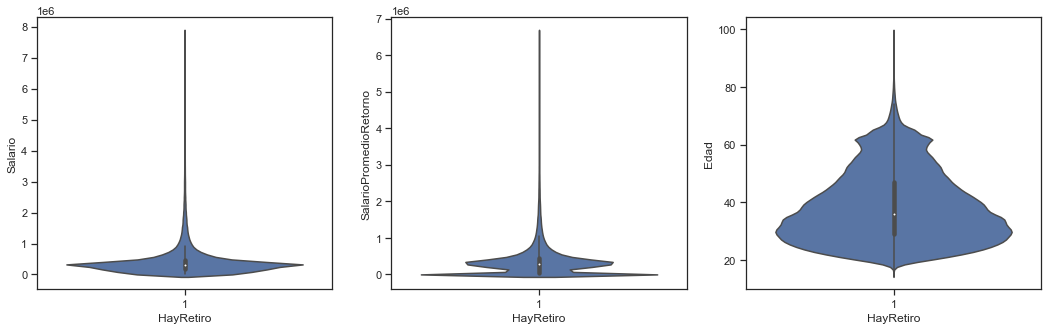

In [20]:
df_work = df_raw1.copy()
fig , ax = plt.subplots(1,3,figsize=(18,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,monto_cols):
    sns.violinplot(x=df_work["HayRetiro"], y=df_work[col],ax=axis)

Los salarios siguen mostrando algunos valres anomalos, pero se mantendrán y se evaluaran más adelante.

In [21]:
#df_raw1.groupby(['FechaUltimoAporte']).size()
df_work.columns

Index(['Periodo', 'Edad', 'RangoEdad', 'Genero', 'EstCiv', 'HayRetiro',
       'TipoRetiro', 'Salario', 'RangoSalario', 'SalarioPromedioRetorno',
       'RangoSalarioRetorno', 'TuvoReduccion', 'HayAportes', 'Pensionado',
       'Difunto', 'MesDesempleadoAntesRetorno', 'MesesDesempleado',
       'Desempleado', 'DiferenciaBrechas'],
      dtype='object')

Necesitamos cambiar el nombre de las columnas al formato adecuado y debemos transformar columnas como RangoEdad, genero, etc., a un formato similar para análisis futuros. 

### Transformación y cambio de nombre de datos

Aquí, cambiaremos el nombre de algunas columnas y modificaremos los registros con el formato adecuado para su posterior análisis.

In [22]:
def Transforma_Renombra_Datos(df_raw):
    """ Rename column names and transformed into proper format and return dataframe """
    df_cal = df_raw.copy()
    
    df_cal.rename(columns={'EstCiv':'EstadoCivil'
                       ,'DiferenciaBrechas':'Brecha'
                       ,'MesDesempleadoAntesRetorno':'InactivoPostRetiro'
                       ,'MesesDesempleado':'InactivoPostUltAporte'
                      }
              ,inplace=True)

    # Pasa a valor de texto
    df_cal['RangoSalario'] = df_cal.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
    df_cal['RangoSalarioRetorno'] = df_cal.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
    df_cal['TuvoReduccion'] = df_cal.TuvoReduccion.map({1:'Si',0:'No'})
    df_cal['TipoRetiro'] = df_cal.TipoRetiro.map({'E':'Extinción','S':'Suspensión','R':'Reducción'})
    df_cal['Pensionado'] = df_cal.Pensionado.map({1:'Si',0:'No'})
    df_cal['Desempleado'] = df_cal.Desempleado.map({1:'Si',0:'No'})
    df_cal['Difunto'] = df_cal.Difunto.map({1:'Si',0:'No'})

    '''
    df_cal['Partner'] = df_cal.Partner.map({'Yes':1,'No':0})
    df_cal['Dependents'] = df_cal.Dependents.map({'Yes':1,'No':0})

    df_cal['PhoneService'] = df_cal.PhoneService.map({'Yes':1,'No':0})
    df_cal['MultipleLines'] = df_cal.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})
    df_cal['InternetService'] = df_cal.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
    df_cal['OnlineSecurity'] = df_cal.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['OnlineBackup'] = df_cal.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['DeviceProtection'] = df_cal.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['TechSupport'] = df_cal.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingTV'] = df_cal.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['StreamingMovies'] = df_cal.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})
    df_cal['PaperlessBilling'] = df_cal.PaperlessBilling.map({'Yes':1,'No':0})
    df_cal['Churn'] = df_cal.Churn.map({'Yes':1,'No':0})
    
    # Data mining
    df_cal['IsContracted'] = df_cal.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
    
    # Data transformation
    
    # Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them.
    df_cal.loc[df_cal['TotalCharges']==' ','TotalCharges'] = np.nan
    
    # First we convert TotalCharges to float and then replace with tenure * monthly charges
    df_cal['TotalCharges'] = df_cal['TotalCharges'].astype('float64')
    df_cal.loc[df_cal['TotalCharges'].isnull()==True,'TotalCharges'] = df_cal['MonthlyCharges'] * df_cal['Tenure']
    '''

    return df_cal    

In [23]:
df_cal = Transforma_Renombra_Datos(df_work)

df_cal.head()

,Periodo,Edad,RangoEdad,Genero,EstadoCivil,HayRetiro,TipoRetiro,Salario,RangoSalario,SalarioPromedioRetorno,RangoSalarioRetorno,TuvoReduccion,HayAportes,Pensionado,Difunto,InactivoPostRetiro,InactivoPostUltAporte,Desempleado,Brecha
0,2020/05,85,Entre59y100,F,VIUDO,1,Extinción,538591.88,0.32-0.85,2431900.0,2.17-4.33,No,1,Si,No,1,1,No,0
1,2021/03,77,Entre59y100,M,SOLT,1,Extinción,0.00,<=Minimo,0.0,No,No,0,Si,No,1,1,No,1
2,2020/08,76,Entre59y100,F,CASAD,1,Extinción,0.00,<=Minimo,0.0,No,No,0,Si,No,1,1,No,1
3,2021/02,75,Entre59y100,F,SOLT,1,Extinción,0.00,<=Minimo,0.0,No,No,0,Si,No,1,1,No,1
4,2020/10,73,Entre59y100,M,DIVOR,1,Extinción,64908.00,<=Minimo,0.0,No,Si,0,Si,No,1,1,No,1


### Representación Gráfica

In [24]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title,color=plotColor):
    """ Based on x and y value, generate bar graph """
    
    fig, ax = plt.subplots()
    ax.bar(range(len(x))
       , y
       , width = 0.75
       , color=color
        , alpha = 0.6) 

    # stopping alphabetical sorting of graph
    plt.xticks(range(len(x)),x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title,fontsize=13)
    plt.ylabel(y_title,fontsize=13)
    plt.grid(b=False)
    plt.yticks(fontsize=0)
    plt.ylim(top=1)

    
    # Visible x - axis line
    for spine in plt.gca().spines.values():
        spine.set_visible(False) if spine.spine_type != 'bottom' else spine.set_visible(True)
    
    # Display label for each plot
    for i,v in (enumerate(y)):
        ax.text(i
                ,v+0.05
                ,str(round((v*100),2))+'%'
                ,fontsize=13
                ,ha='center')
    
    plt.show()

### Distribución de variables categóricas y binarias por objetivo

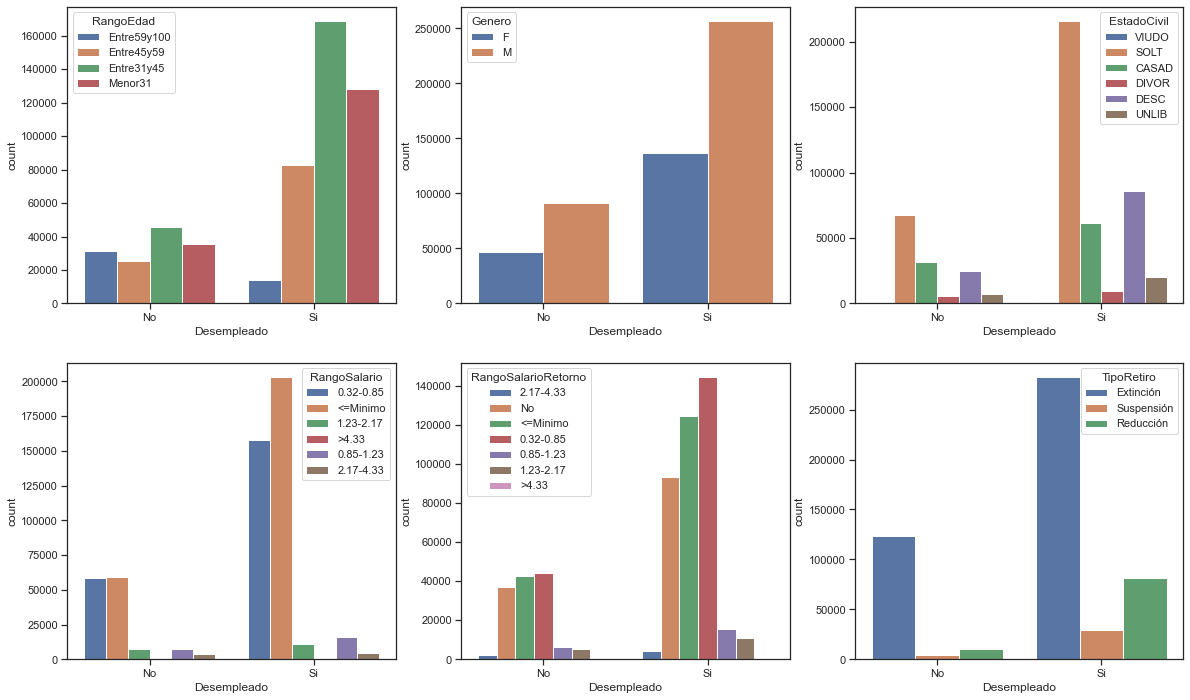

In [25]:
df_temp = df_cal.copy()
fig , ax = plt.subplots(2,3,figsize=(20,12))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,cat_cols):
    sns.countplot(x=df_temp[target_col],hue=df_temp[col],ax=axis)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in cat_cols:
    df_temp.loc[:,cols] = LabelEncoder().fit_transform(df_temp.loc[:,cols])


**De los graficos de arriba se puede deducir que los desempleados or COVID**

> * La mayoria fueron mujeres y de igual froma la recuperación de empleo se dio en la misma proporción.
> * A nivel de edad, los que retiraron y quedaron desempleados, la mayoria estuvieron entre 31 y 45, seguidos muy de cerca por los menores de 31, y luego lo de 45 a 59. 
> * Solteros y estado desconocidos fueron los mayores que retiraron y quedaron desempleados.
> * Con respecto a la parte salarial, la mayoria de los identificados ganaban o reportaban menos del salario mínimo, segudo por el segmento que ganaba menos de 850 mil.
> * De los que regresaron a sus empleos o solo tuvieron reducción de jornada, muchos quedaron sin salario y un alto porcentaje quedo en la rama de ganar salario por menos del mínimo.
> * De los que tuvieron reducción o suspensión pocos quedan con trabajo.


In [26]:
#print(df_raw.groupby(['RangoSalario','Genero']).count())
binary_cols

['Pensionado',
 'TuvoReduccion',
 'Difunto',
 'HayAportes',
 'Brecha',
 'InactivoPostUltAporte',
 'InactivoPostRetiro']

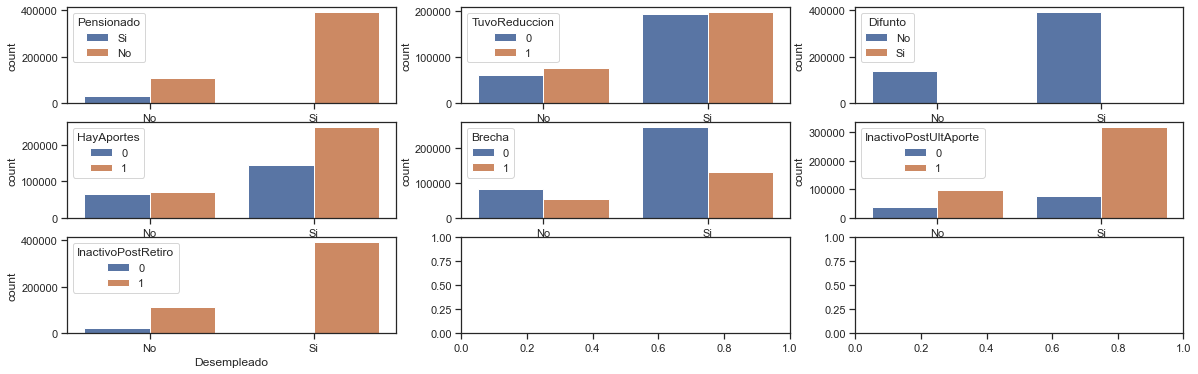

In [27]:
fig , ax = plt.subplots(3,3,figsize=(20,6))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,binary_cols):
    sns.countplot(x=df_temp[target_col],hue=df_temp[col],ax=axis)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
label_encoder=LabelEncoder()
for cols in cat_cols:
    df_temp.loc[:,cols] = LabelEncoder().fit_transform(df_temp.loc[:,cols])

En el analisis de la variables binaria se puede apreciar lo siguiente:
> * Hay un grupo de pensionados y difuntos que no son representativos par anuestro analisis, ni para el modelo. Por lo que se eliminaran de la muestra.
> * Con respecto a los que tuvieron reducción salarial, se aprecia que un alto porcentaje quedo desempleado.
> * Las otras caracteristicas muestran, como los calificados coo desempleado presentan una mayor cantidad de aportes, además furon los que tuvieron menos de disminución de brecha; podría ser porque siguieron desempleado. Además se muestra como la mayoria se encontro inactivo despues del retito, osea no tuvo aportes, y tambien un alto porcentaje despues del último aporte no hizo más aportes. 

In [28]:
# Se descartan la filas de pensionados ya que para el estudio no se requieren
X = df_cal.copy()
X = X.drop(X[X['Pensionado']=='Si'].index)
X = X.drop(X[X['Difunto']=='Si'].index)
X.drop(['Pensionado'], axis=1, inplace=True)
X.drop(['Difunto'], axis=1, inplace=True)
X = X.reset_index(drop=True)
df_cal= X.copy()
X = df_work.copy()
X = X.drop(X[X['Pensionado']==1].index)
X = X.drop(X[X['Difunto']==1].index)
X.drop(['Pensionado'], axis=1, inplace=True)
X.drop(['Difunto'], axis=1, inplace=True)
X = X.reset_index(drop=True)
df_work = X.copy()
binary_cols = ["TuvoReduccion"]
binary_cols = binary_cols + [ 'HayAportes','Brecha','InactivoPostUltAporte','InactivoPostRetiro']

<AxesSubplot:xlabel='RangoSalario', ylabel='count'>

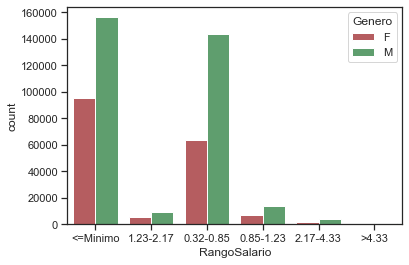

In [29]:
sns.countplot(data=df_cal, x='RangoSalario', hue='Genero', palette=['r','g','blue'])

Confirmando los graficos anteriores, se puede apreciar como los hombres fueron los principales afectados, y particularmente de este gráfico se puede deducir:

* Los rangos de salarios que más predominaba era el rango los menores a 850  850 mil. 
* Pero muy de cerca estaba el mínimo o menos.
* Es importante notar como en salario menores o iguales al mínimo las mujeres tenían una representación importante con respecto a los otros rangos.

<AxesSubplot:xlabel='RangoSalarioRetorno', ylabel='count'>

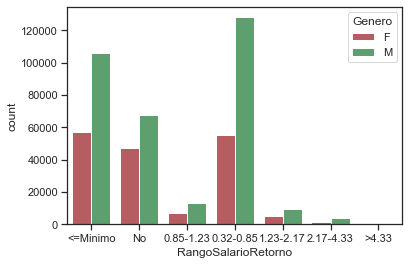

In [30]:
#sns.histplot(data=df_raw, x='Genero', hue='RangoSalarioRetorno')
sns.countplot(data=df_cal, x='RangoSalarioRetorno', hue='Genero', palette=['r','g','blue'])

En este gráfico podemos ver como se comportó la variable de salario de retorno, aunque esto no garantiza que sigan empleados.

* Un alto porcentaje tanto de hombres como mujeres no retornó a un empleo. 
* Otro grupo importante de personas retorno por un salario mínimo o inferior.


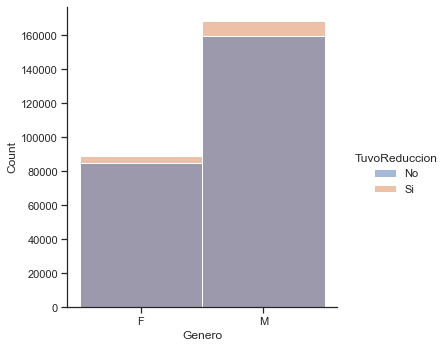

In [31]:
sns.displot(data=df_cal, x='Genero', hue='TuvoReduccion')

Se puede ver que hay casi el doble del tamaño de la muestra de hombres en comparación con las mujeres en el conjunto de datos. Esto no solo se aprecia en el gráfico anterior, sino tambien en el de desempleo por COVID. Si bien esto puede no afectar demasiado las predicciones, la distribución del ingreso sí puede hacerlo. Como se aprecia el porcentaje de hombres que ganan tienen salario inferiores al mínimo es mucho mayor que el porcentaje de hombres que ganan la misma cantidad. Además podemos ver, como el porcentaje de mujeres sin salario es muy similar al de los hombres. Lo que si se evidencia es que proporcionalmente mayor cantidad de mujeres quedo sin salario. 
Este será sin duda un factor significativo y debería ser una característica considerada en el modelo de predicción.

<AxesSubplot:xlabel='RangoSalario', ylabel='count'>

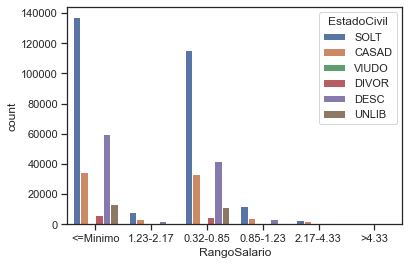

In [32]:
sns.countplot(data=df_cal, x='RangoSalario', hue='EstadoCivil')

<AxesSubplot:xlabel='RangoSalarioRetorno', ylabel='count'>

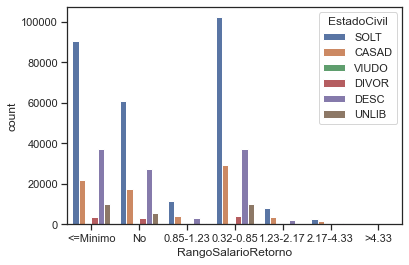

In [33]:
sns.countplot(data=df_cal, x='RangoSalarioRetorno', hue='EstadoCivil')

Text(0.5, 1.0, 'Distribución por edad')

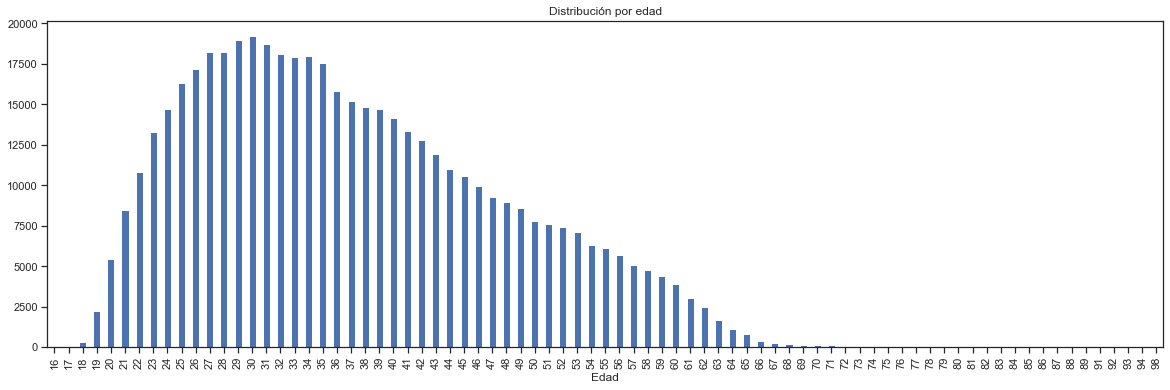

In [34]:
fig = plt.figure(figsize = (20,6))
GrupoEdad = df_cal.groupby(['Edad']).size()
GrupoEdad.plot.bar()
plt.title("Distribución por edad")

La característica de edad describe la edad del individuo. Primero se muestra la distribución de edad de nuestro conjunto de datos con un sesgo hacia la izquierda. Las edades oscilan, mayormente, entre los 20 y los 62 años de edad.

<AxesSubplot:xlabel='Salario', ylabel='Count'>

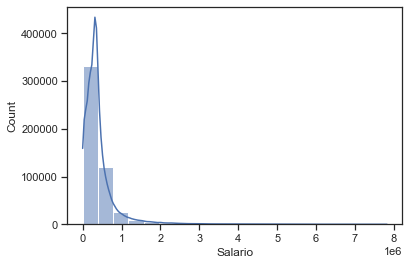

In [35]:
sns.histplot(df_cal['Salario'],bins = 20,kde = True)

Los datos estan sesgados a la izquierda, y los salarios se ahrupan entre 0 y 1.5 millones.

Agrupamos los datos que necesitaremos en nuestro análisis.

### Realizaremos un analisis para ver el comportamiento por mes.

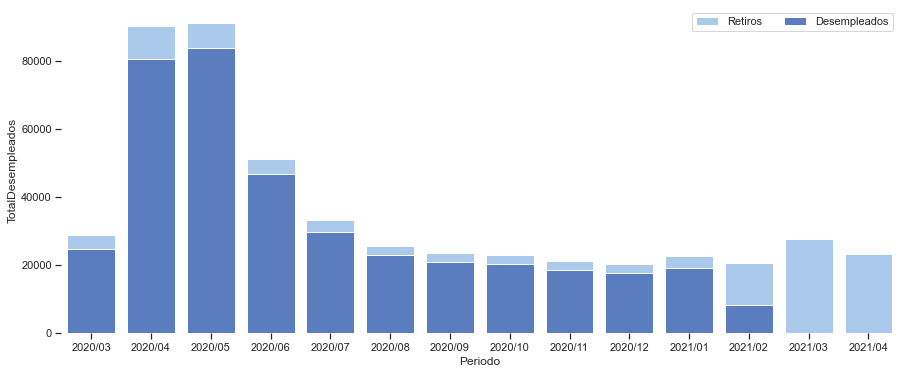

In [36]:
#result10 = df_raw2.groupby(["Periodo", "HayRetiros"])["HayRetiros"].count().reset_index(name="TotalRetiros")
#print(result10)
result11 = df_cal.groupby(["Periodo", "Desempleado"])["Desempleado"].count().reset_index(name="TotalDesempleados")
#print(result11)
result11 = result11[result11.Desempleado == 'Si']
#result11['Periodo'] = pd.to_datetime(result11['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
result12 = df_work.groupby(["Periodo"])["Periodo"].count().reset_index(name="TotalAfiliados")
#result12['Periodo'] = pd.to_datetime(result12['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#print(result12)
result13 = pd.merge(result11,result12,left_on='Periodo', right_on='Periodo', how='outer')
result13.sort_values(by=['Periodo'], inplace=True)
#print(result13)
f, ax = plt.subplots(figsize = (15,6))
sns.set_color_codes('pastel')
sns.barplot(y = 'TotalAfiliados', x = 'Periodo', data = result13, label = 'Retiros', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(y = 'TotalDesempleados', x = 'Periodo', data = result13, label = 'Desempleados', color = 'b', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'upper right')
sns.despine(left = True, bottom = True)
plt.show()

Se aprecia que los picos e retiros se dieron al inicio de la pandemia, entre abril y mayo, luego ha venido a la baja. sin embargo, se nota un repunte en marzo de este año.

In [37]:
df_temp = df_cal.copy()
#df_temp['RangoSalario'] = df_temp.RangoSalario.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
#df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({0:'No',1:'Sub',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_temp['Desempleado'] = df_temp['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
#df_temp['Periodo'] = pd.to_datetime(df_temp['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
df_temp.head()

,Periodo,Edad,RangoEdad,Genero,EstadoCivil,HayRetiro,TipoRetiro,Salario,RangoSalario,SalarioPromedioRetorno,RangoSalarioRetorno,TuvoReduccion,HayAportes,InactivoPostRetiro,InactivoPostUltAporte,Desempleado,Brecha
0,2020/10,71,Entre59y100,F,SOLT,1,Extinción,61386.500,<=Minimo,6.140000e+04,<=Minimo,No,1,1,0,1,0
1,2020/08,68,Entre59y100,F,CASAD,1,Extinción,0.000,<=Minimo,0.000000e+00,No,No,0,1,1,1,1
2,2020/11,66,Entre59y100,F,SOLT,1,Extinción,0.000,<=Minimo,0.000000e+00,No,No,0,1,1,1,1
3,2020/05,64,Entre59y100,F,VIUDO,1,Extinción,1344800.000,1.23-2.17,1.031017e+06,0.85-1.23,Si,1,1,1,0,1
4,2020/06,64,Entre59y100,F,VIUDO,1,Extinción,717233.333,0.32-0.85,7.172333e+05,0.32-0.85,No,0,1,1,1,0


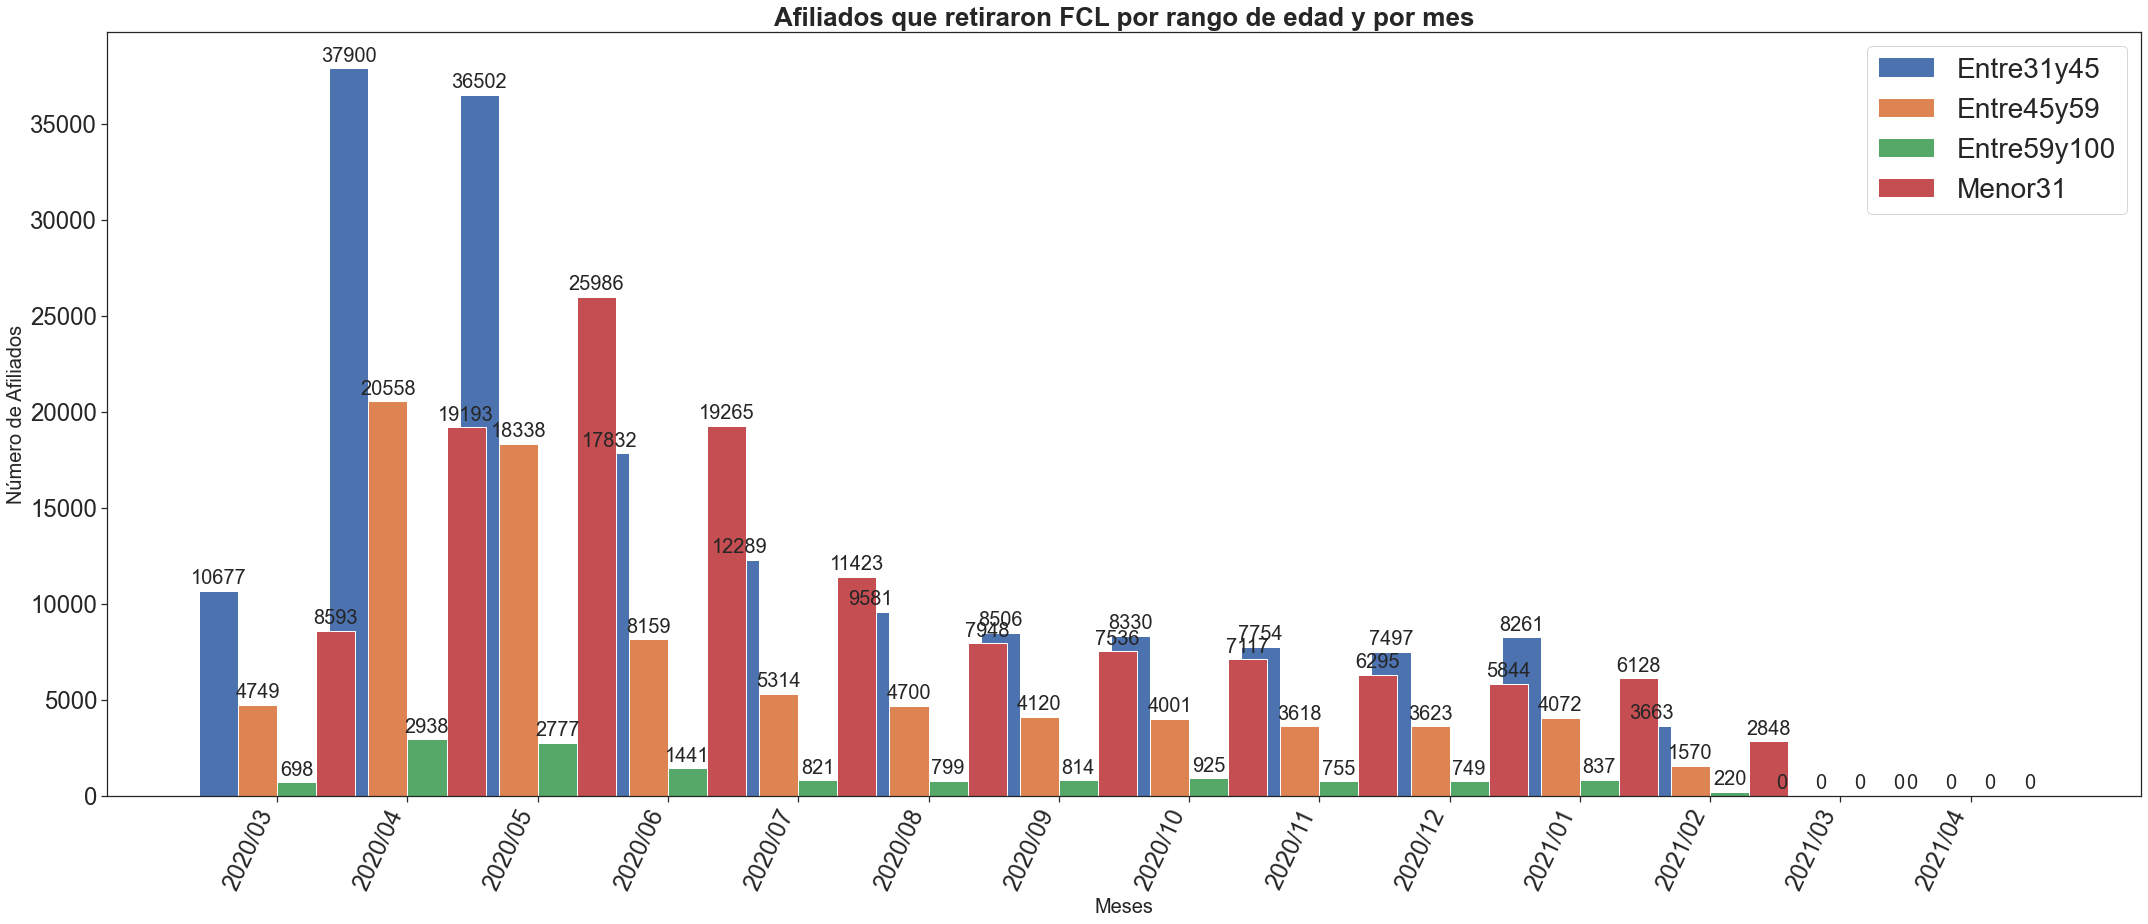

In [38]:
group1 = df_temp.groupby(by = ['Periodo','RangoEdad'])['Desempleado'] #"raw2"
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.3

RangoEdades = list(data1['RangoEdad'].drop_duplicates())
l = len(RangoEdades)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',fontsize = 20)

for i in range(l):
  pos = -(l+1)/2 + i+1
  rect = ax.bar(x + pos*width,data1[data1['RangoEdad'] == RangoEdades[i]].cantidad.astype(int),width)
  autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de edad y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de Afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoEdades,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)
#ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

fig.tight_layout()

#### Analisis entre rango de edad y mes.

Este gráfico nos muestra como en todos los meses la mayoria de afectados siempre han estado entre el rango de 31 y 45 y luego por los menores de 31 años. Y ahora en el mes de marzo se presenta una nueva escalada en los desempleados.

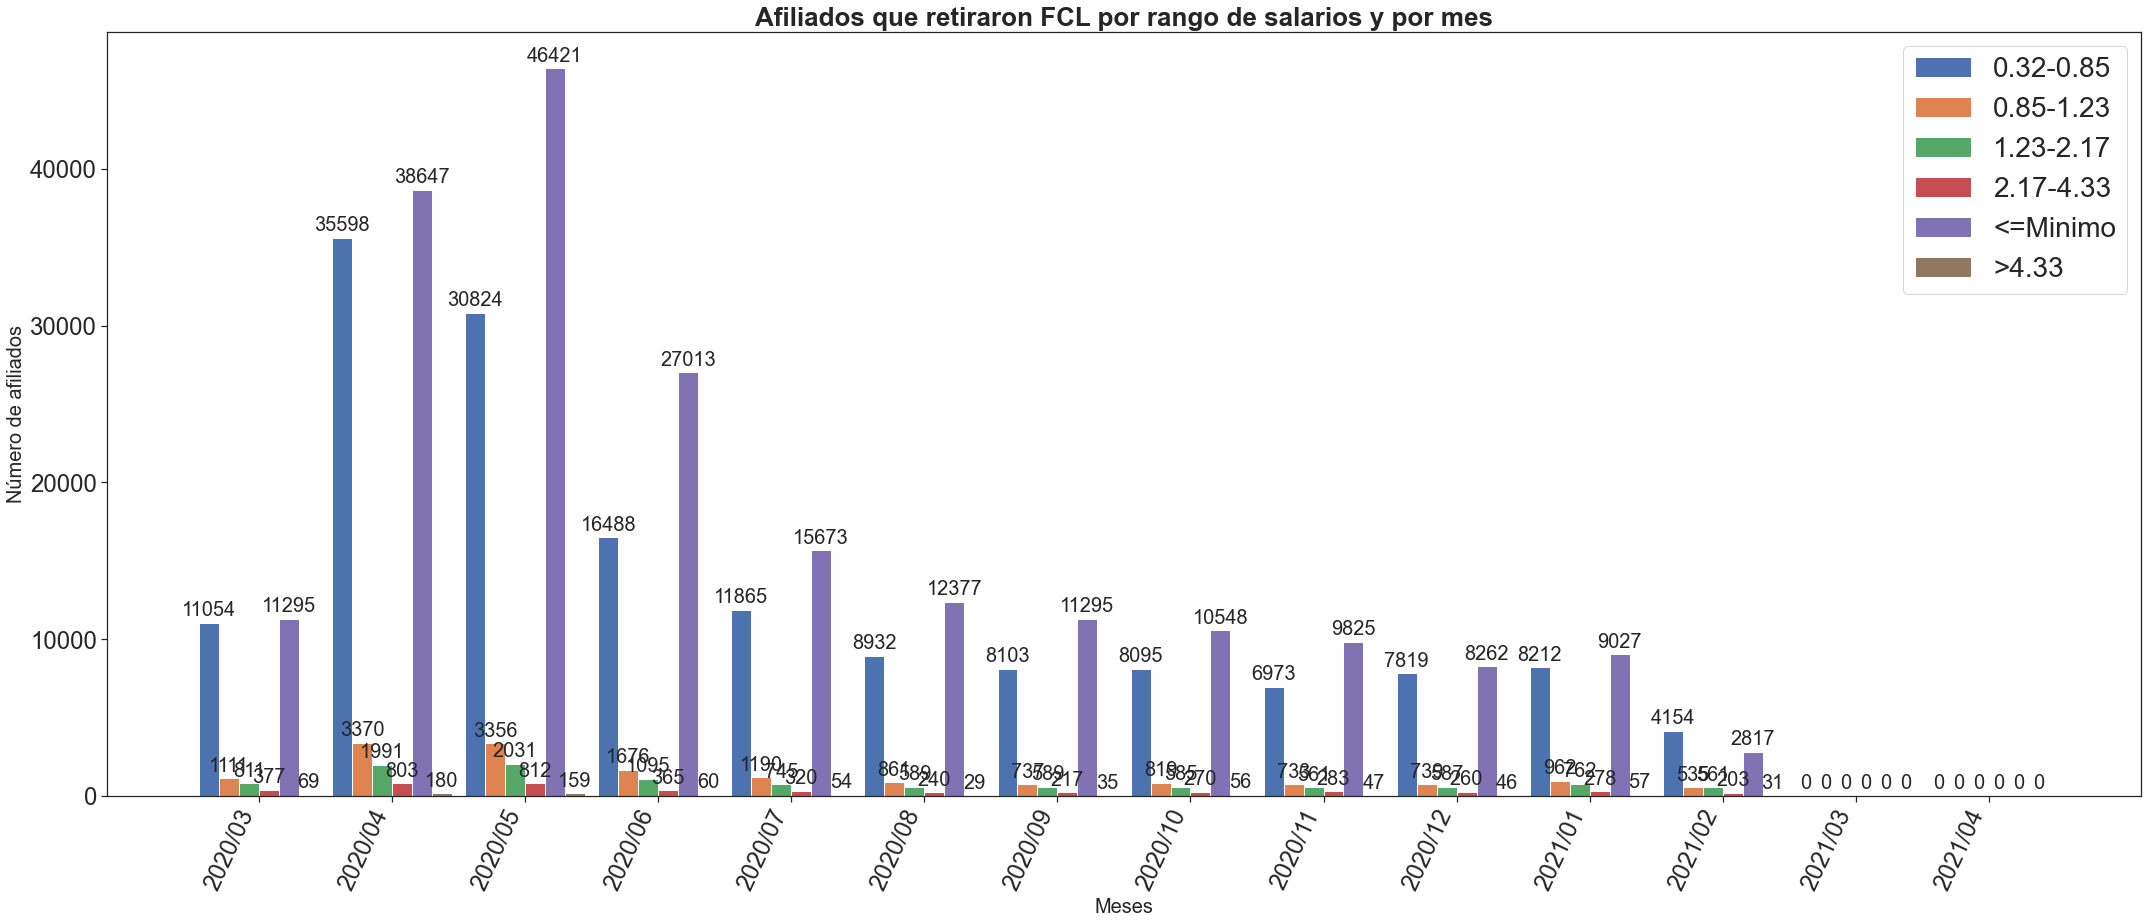

In [39]:
group1 = df_temp.groupby(by = ['Periodo','RangoSalario'])['Desempleado']
data1 = group1.agg(['sum']).reset_index()
data1.rename(columns={'sum' : 'cantidad'},inplace=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())

x = np.arange(len(periodos))
width = 0.15

RangoSalarios = list(data1['RangoSalario'].drop_duplicates())
l = len(RangoSalarios)
for i in range(l):
    pos = -(l+1)/2 + i+1
    #print(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    rect = ax.bar(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de salarios y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoSalarios,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)

fig.tight_layout()

#### Analisis entre rango de salario y mes.

Este gráfico muestra como durante todos los meses predominado los salarios inferioresa los 850000, como principales afectados.

In [40]:
PeriodosDistintos = df_temp.drop_duplicates(subset = ["Periodo"])
RangoSalarioDistintos = df_temp.drop_duplicates(subset = ["RangoSalarioRetorno"])

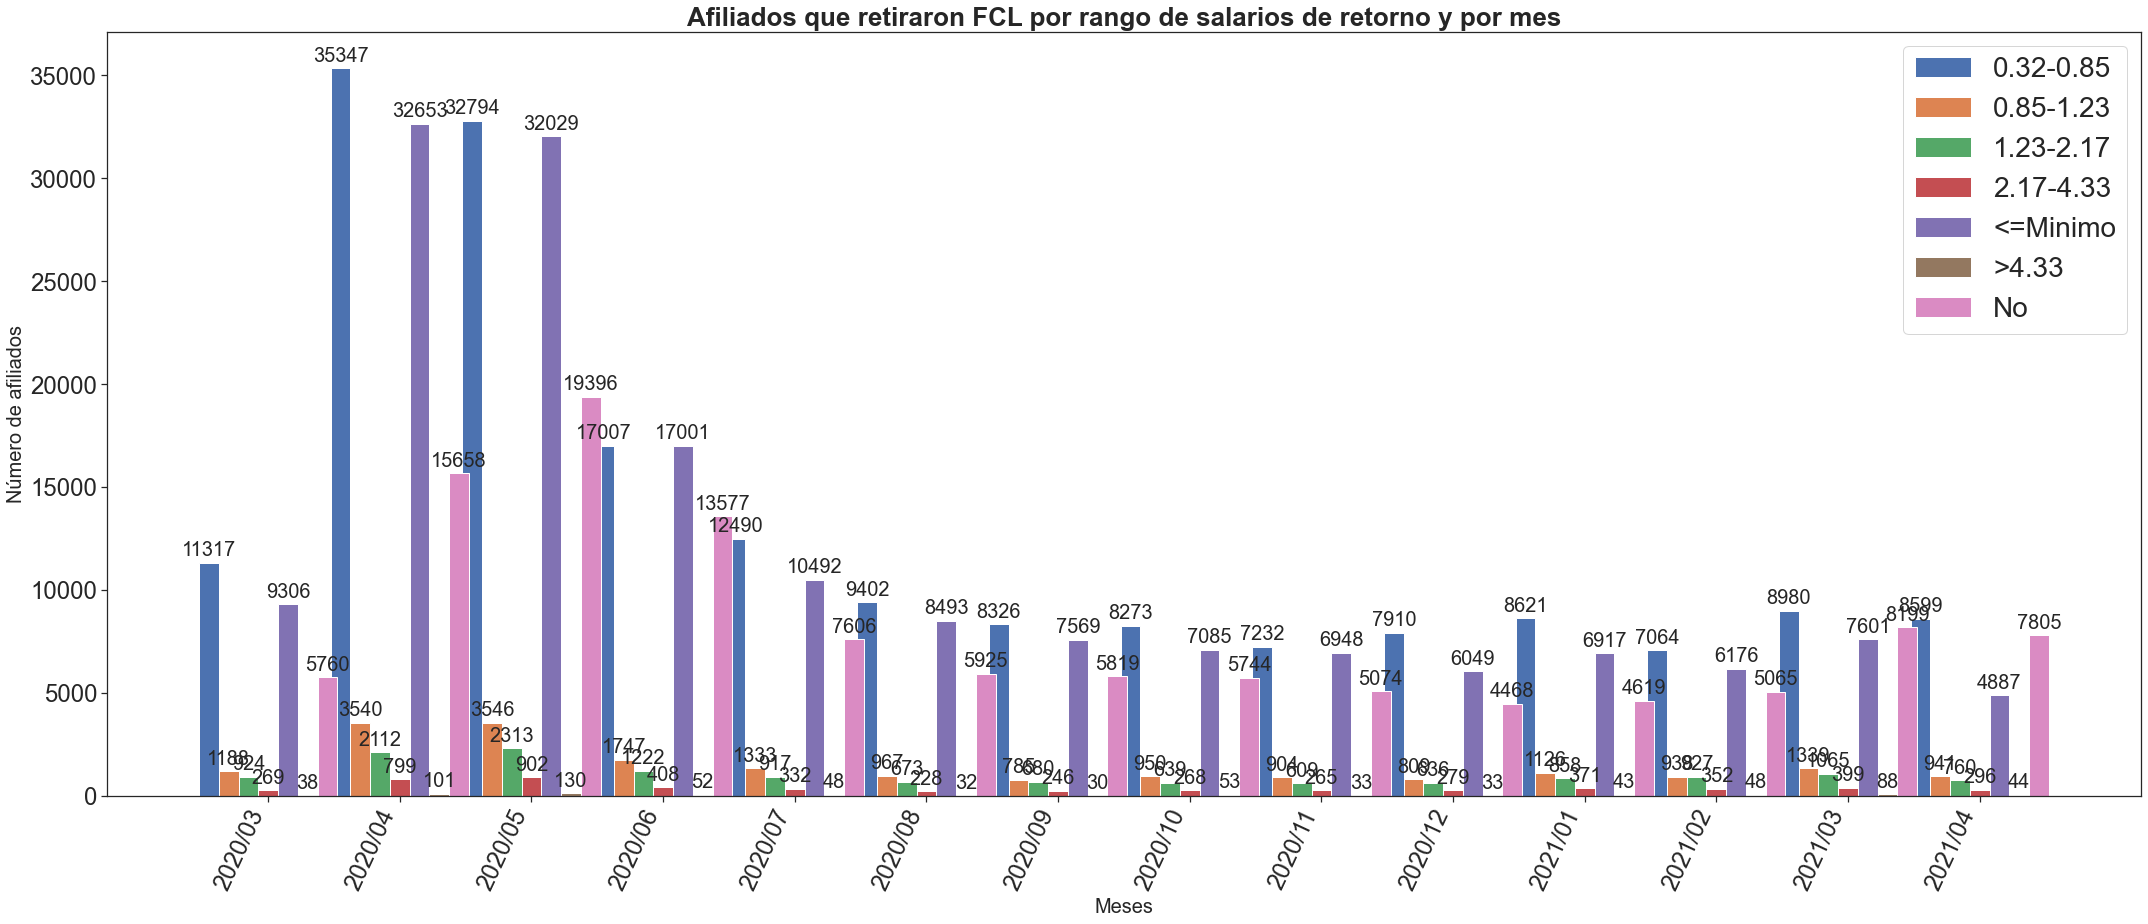

In [41]:
group1 = df_temp.groupby(by = ['Periodo','RangoSalarioRetorno'])['Desempleado']
data1 = group1.agg(['count']).reset_index()
data1.rename(columns={'count' : 'cantidad'},inplace=True)

for per in PeriodosDistintos["Periodo"]:
    for ran in RangoSalarioDistintos["RangoSalarioRetorno"]:
        buscar = data1.loc[(data1['Periodo'] == per) & (data1['RangoSalarioRetorno'] == ran)]
        if buscar.size <= 0:
            print(buscar)
            print("\nNone of thses values exists in Dataframe")
            new_row = {'Periodo':per, 'RangoSalarioRetorno':ran, 'cantidad':0}
            data1 = data1.append(new_row, ignore_index=True)

fig,ax = plt.subplots(figsize = (30,13))

periodos = list(data1['Periodo'].drop_duplicates())
x = np.arange(len(periodos))
width = 0.15

RangoSalariosRetorno = list(data1['RangoSalarioRetorno'].drop_duplicates())
l = len(RangoSalariosRetorno)
#print(range(l))
for i in range(l):
    #print(i,RangoSalariosRetorno[i])
    #print(data1[data1['RangoSalarioRetorno'] == RangoSalariosRetorno[i]].cantidad)
    pos = -(l+1)/2 + i+1
    #print(x + pos*width,data1[data1['RangoSalario'] == RangoSalarios[i]].cantidad.astype(int),width)
    rect = ax.bar(x + pos*width,data1[data1['RangoSalarioRetorno'] == RangoSalariosRetorno[i]].cantidad.astype(int),width)
    autolabel(rect)

ax.set_xticks(x)
ax.set_xticklabels(periodos, rotation= 65, horizontalalignment = 'right')

ax.set_title('Afiliados que retiraron FCL por rango de salarios de retorno y por mes')
ax.title.set_fontsize(26)
ax.title.set_fontweight('bold')
ax.set_xlabel('Meses')
ax.xaxis.label.set_fontsize(20)
ax.set_ylabel('Número de afiliados')
ax.yaxis.label.set_fontsize(20)

ax.legend(labels = RangoSalariosRetorno,fontsize = 28,loc = 1)

ax.tick_params(axis='both', which='major', labelsize=24)

fig.tight_layout()


## No estoy seguro de interpretarlo bien

In [42]:
# Grafico de cambios salariales.
def Distribucion_Numerica(df_cal1,feature):
    """ Distribution de la variable numerica basado en la fuente"""
    fig = plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    ax = sns.kdeplot(df_cal1[feature]
                     , color = 'g'
                     , shade = True)
    
    title_str = "Distribución original " +feature 
    plt.title(title_str)
    
    plt.subplot(1,2,2)
    ax = sns.kdeplot(df_cal1.loc[(df_cal1[target_col]=="Si"),feature]
                     , color = 'r'
                     , shade = True
                     , label='Desempleado', legend = True)
    ax = sns.kdeplot(df_cal1.loc[(df_cal1[target_col]=="No"),feature]
                     , color = 'b'
                     , shade = True
                     , label='No', legend = True)
    
    title_str = feature + " Distribución: Desempleado o no"
    plt.title(title_str)
    plt.legend()
    plt.show()

In [43]:
df_temp = df_cal.copy()
#df_temp['Desempleado'] = df_temp['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
#df_temp['Periodo'] = pd.to_datetime(df_temp['Periodo']).apply(lambda x:x.strftime('%Y/%m'))
#df_temp['Desempleado'] = df_work.Desempleado.map({1:'Si',0:'No'})
df_temp['RangoSalario'] = df_temp.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})

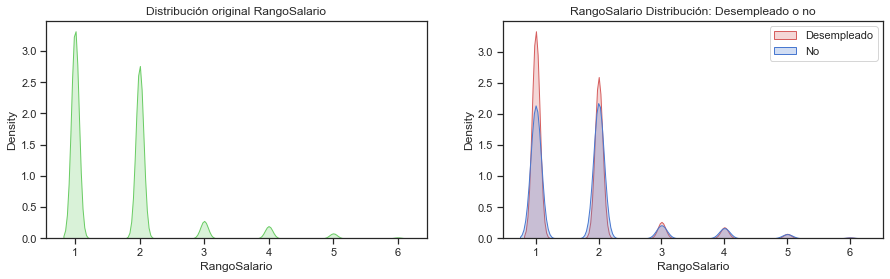

In [44]:
Distribucion_Numerica(df_temp,'RangoSalario')

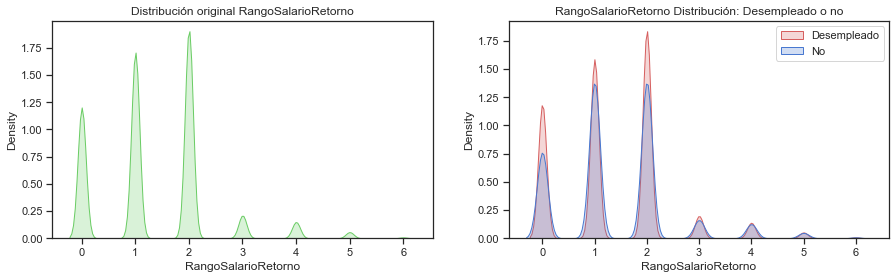

In [45]:
Distribucion_Numerica(df_temp,'RangoSalarioRetorno')

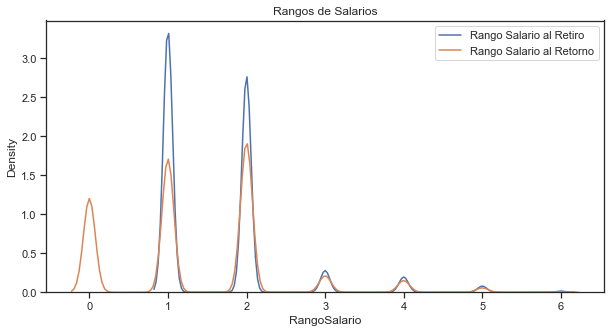

In [46]:
fig, (ax1) = plt.subplots(figsize=(10, 5))

ax1.set_title('Rangos de Salarios')
sns.kdeplot(df_temp['RangoSalario'], ax=ax1, label='Rango Salario al Retiro')
sns.kdeplot(df_temp['RangoSalarioRetorno'], ax=ax1, label='Rango Salario al Retorno')
plt.legend()
plt.show()

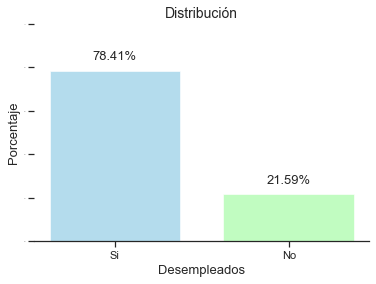

1    0.78412
0    0.21588
Name: Desempleado, dtype: float64


In [47]:
# Balance de la variable de salida
#print(df_raw2.groupby(target_col).size() / len(df_raw2))
#sns.catplot(data=df_raw2,y=target_col, kind = 'count',height=2.6, aspect=1.5)
df_temp['Desempleado'] = df_temp['Desempleado'].map({'Si': 1,'No': 0}).astype(int)

Tasa_Desempleado = df_temp[target_col].value_counts() / df_temp.shape[0]

Generate_bar_graph(Tasa_Desempleado.index.map({0:'No',1:"Si"})
                   , Tasa_Desempleado.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución')

print(Tasa_Desempleado)


### EDA (bivariante)

In [48]:
# se importa para evaluar la variables categoricas no ordinales-
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as multi

In [49]:
# Cuales pueden influir en el tipo de salario.
# cat_cols = ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","Pensionado","TuvoReduccion"]

# Influencia RangoEdad
x = df_temp['RangoEdad']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del rango de edad en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en true donde se rechaza la hipotesis, debe existir alguna influencia

# Influencia RangoEdad
x = df_temp['Genero']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del genero en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Influencia EstadoCivil
x = df_temp['EstadoCivil']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del Estado civil en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

# Pasa a valor de texto
df_temp['RangoSalario'] = df_temp.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})

    # Influencia RangoSalario
x = df_temp['RangoSalario']
y = df_temp['Desempleado']

mcDate = multi.MultiComparison (y,x)
Results = mcDate.tukeyhsd()
print("Influencia del rango salarial en el status de desempleado")
print (Results)  # Por lo que se aprecia hay varias lineas en FALSE donde se acepta la hipotesis, debe existir alguna influencia

Influencia del rango de edad en el status de desempleado
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
 Entre31y45  Entre45y59  -0.0012 0.8515 -0.0052  0.0028  False
 Entre31y45 Entre59y100  -0.0644  0.001 -0.0724 -0.0564   True
 Entre31y45     Menor31  -0.0039 0.0193 -0.0074 -0.0005   True
 Entre45y59 Entre59y100  -0.0632  0.001 -0.0715 -0.0548   True
 Entre45y59     Menor31  -0.0027 0.3361 -0.0069  0.0014  False
Entre59y100     Menor31   0.0604  0.001  0.0523  0.0685   True
--------------------------------------------------------------
Influencia del genero en el status de desempleado
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     F      M  -0.0067 0.001 -0.0091 -0.0043   True
---------------------------------------------------
Inf

Se aprecia que hay varias línea sen true lo que puede implicar alguna correlación entre las variables

### Estadísticas descriptivas

### Distribucion de edad, salario y salario de retorno

In [50]:
# NO le veo valor agregado
df_temp[monto_cols].describe(include='all')

,Salario,SalarioPromedioRetorno,Edad
count,5.019180e+05,5.019180e+05,501918.000000
mean,4.131667e+05,3.666002e+05,37.082185
std,4.845808e+05,4.679583e+05,10.773657
min,0.000000e+00,0.000000e+00,16.000000
25%,1.782000e+05,8.000000e+04,29.000000
50%,3.171000e+05,2.912771e+05,35.000000
75%,4.618667e+05,4.422596e+05,44.000000
max,7.823333e+06,6.623567e+06,98.000000


### Con base en el análisis descriptivo de columnas numéricas, el salario, el salario de retorno y la edad del afiliado el promedio es de 413146 colones, 364986 colones y 37 años, respectivamente

In [51]:
# Mean summary of customers (Churn vs Non churn)
suma_desempleado = df_temp.groupby('Desempleado')
print(suma_desempleado[monto_cols].mean())

                   Salario  SalarioPromedioRetorno       Edad
Desempleado                                                  
0            447264.925246           384186.937503  37.316620
1            403778.890333           361758.313514  37.017641


In [52]:
#df_model['Genero'] = df_model.Genero.map({'F':1,'M':2,'X':0}).astype(int)
#df_model['TipoRetiro'] = df_model.TipoRetiro.map({'Extinción':1,'Suspensión':2,'Reducción':3}).astype(int)
#df_model['EstadoCivil'] = df_model.EstadoCivil.map({'DESC':0,'SOLT':1,'CASAD':2,'DIVOR':3,'VIUDO':4,'UNLIB':5,'SEPAR':6}).astype(int) 

print(pd.pivot_table(df_temp, index = 'Desempleado', values = ['Edad','HayAportes','Genero','TipoRetiro','EstadoCivil','Salario']))

#df_model['Genero'] = df_model.Genero.map({1:'F',2:'M',0:'X'})
#df_model['TipoRetiro'] = df_model.TipoRetiro.map({1:'Extinción',2:'Suspensión',3:'Reducción'})
#df_model['EstadoCivil'] = df_model.EstadoCivil.map({0:'DESC',1:'SOLT',2:'CASAD',3:'DIVOR',4:'VIUDO',5:'UNLIB',6:'SEPAR'})


print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'Genero', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'EstadoCivil', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'RangoSalario', values = 'Edad' ,aggfunc ='count'))
print(pd.pivot_table(df_temp, index = 'Desempleado', columns = 'RangoEdad', values = 'Edad' ,aggfunc ='count'))

                  Edad  HayAportes        Salario
Desempleado                                      
0            37.316620    0.576702  447264.925246
1            37.017641    0.630985  403778.890333
Genero            F       M
Desempleado                
0             36752   71602
1            137027  256537
EstadoCivil  CASAD   DESC  DIVOR    SOLT  UNLIB  VIUDO
Desempleado                                           
0            17133  22010   2794   60291   5886    240
1            61317  85747   9542  215590  20542    826
RangoSalario  0.32-0.85  0.85-1.23  1.23-2.17  2.17-4.33  <=Minimo  >4.33
Desempleado                                                              
0                 49503       4790       3741       1528     48500    292
1                158117      16089      10907       4428    203200    823
RangoEdad    Entre31y45  Entre45y59  Entre59y100  Menor31
Desempleado                                              
0                 45387       22430         5258    3527

In [53]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

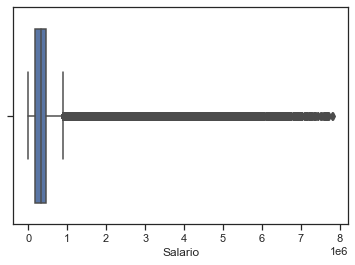

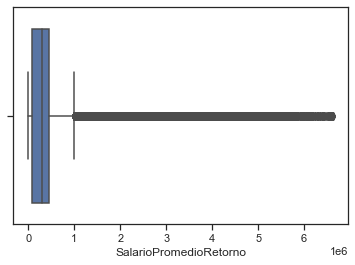

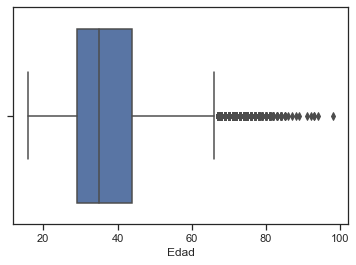

In [54]:
for i in monto_cols:
    Outlier_boxplot(df_temp,i) #df_cal

El resultado muestra que los trabajadores que retiraron el FCL y que quedaron desempleados tenían un salario promedio mensual inferior a los que se quedaron. Y los que regresaron, lo hicieron por salarios similares en promedio.

Con respecto a la edad promedio no hay mucha diferencia

Comprobaremos la distribución de cada característica con la variable de destino.

-------- Salario -----------
Mediana 321466.667
Desv. Stand 486365.82455070934
Varianza 236551715290.8914
Maximo 7823333.333
Minimo 5004.0
-------- Salario Retorno-----------
Mediana 347163.3331665
Desv. Stand 481926.1423057761
Varianza 232252806637.72717
Maximo 6623566.667
Minimo 5066.667


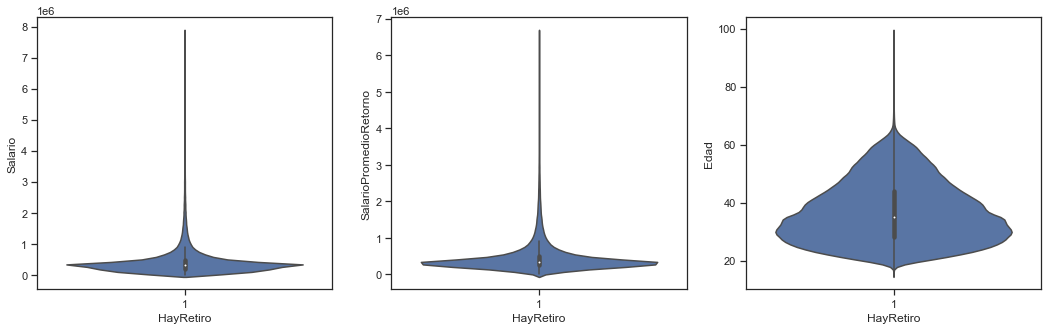

In [55]:
import statistics as st
df_temp_filtered =df_temp.copy() # df_raw1.copy()
fig , ax = plt.subplots(1,3,figsize=(18,5))
sns.set(style="ticks", color_codes=True)
for axis,col in zip(ax.flat,monto_cols):
    if col == "Salario":
        df_temp_filtered = df_temp.query('Salario>5000') 
        print('-------- Salario -----------')
        print('Mediana',st.median(df_temp_filtered["Salario"]))
        print('Desv. Stand',np.std(df_temp_filtered["Salario"]))
        print('Varianza',np.var(df_temp_filtered["Salario"]))
        print('Maximo',np.max(df_temp_filtered["Salario"]))
        print('Minimo',np.min(df_temp_filtered["Salario"]))
        
    else:
        if col == "SalarioPromedioRetorno":
            df_temp_filtered = df_temp.query('SalarioPromedioRetorno>5000') 
            print('-------- Salario Retorno-----------')
            print('Mediana',st.median(df_temp_filtered["SalarioPromedioRetorno"]))
            print('Desv. Stand',np.std(df_temp_filtered["SalarioPromedioRetorno"]))
            print('Varianza',np.var(df_temp_filtered["SalarioPromedioRetorno"]))
            print('Maximo',np.max(df_temp_filtered["SalarioPromedioRetorno"]))
            print('Minimo',np.min(df_temp_filtered["SalarioPromedioRetorno"]))            
    sns.violinplot(x=df_temp_filtered["HayRetiro"], y=df_temp_filtered[col],ax=axis)
plt.show()

## 3. Analisis de correlación
> Comprobaremos si existe alguna relación entre la edad y el salario recibido.

### Correlacion

In [56]:
def Generar_Mapa_Correlacion(corr, chart_title, mask_uppertri=False ):
    """ Basado en las caracteristicas correlacionaas , genera matrix de correlacion """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri
    fig,ax = plt.subplots(figsize=(15,15))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 10, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
#var_corr = round(df_cal.corr(),2)

In [57]:
df_temp['RangoSalario'] = df_temp.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})

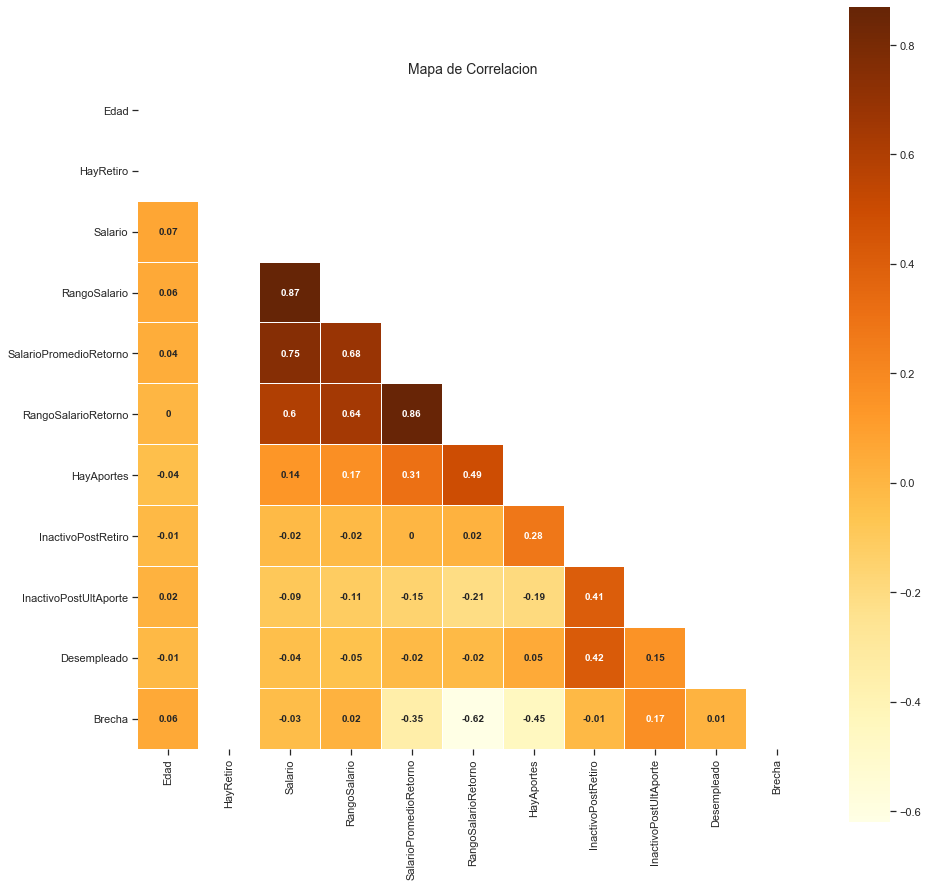

In [58]:
var_corr = round(df_temp.corr(),2)
Generar_Mapa_Correlacion(var_corr
                       ,chart_title = 'Mapa de Correlacion'
                       ,mask_uppertri = True)

De la matriz de correlación, se nota que existe correlación entre algunas variables. Esto se puede deber a que sobre todo los rangos se originaron de otras existentes. Y HayRetiro es una variable que tiene le mismo valor para todos.

Se podia esperar tal y como se aprecia en el gráfico que salario se correlacione con rangosalario, al igual que salario promedioretorno con RangoSalarioretorno.

El gráfico muestra una clara diferencia en los salario entre los generos. Para el mismo salario, las mujeres tienen más probabilidades de tener un salario de retorno bajo o cero que los hombres. 

## 3. Analisis de Clusters

Comprobaremos si existe alguna relación entre la edad y el salario recibido.

In [59]:
df_temp.head().T

,0,1,2,3,4
Periodo,2020/10,2020/08,2020/11,2020/05,2020/06
Edad,71,68,66,64,64
RangoEdad,Entre59y100,Entre59y100,Entre59y100,Entre59y100,Entre59y100
Genero,F,F,F,F,F
EstadoCivil,SOLT,CASAD,SOLT,VIUDO,VIUDO
HayRetiro,1,1,1,1,1
TipoRetiro,Extinción,Extinción,Extinción,Extinción,Extinción
Salario,61386.5,0,0,1.3448e+06,717233
RangoSalario,1,1,1,4,2
SalarioPromedioRetorno,61400,0,0,1.03102e+06,717233


In [60]:
def Normalize_feature(feature):
    """ Return normalized features """
    return prepro.StandardScaler().fit_transform(feature)

In [61]:
df_temp['Desempleado'] = df_temp['Desempleado'].map({1:'Si',0:'No'})
df_temp['edad_norm'] = Normalize_feature(df_temp[['Edad']])
df_temp['salario_norm'] = Normalize_feature(df_temp[['Salario']])
df_temp['SalarioPromedioRetorno_norm'] = Normalize_feature(df_temp[['SalarioPromedioRetorno']])
df_temp['Desempleado_code'] = df_temp['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
df_temp['RangoSalario'] = df_temp.RangoSalario.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})
df_temp['RangoSalarioRetorno'] = df_temp.RangoSalarioRetorno.map({0:'No',1:'<=Minimo',2:'0.32-0.85',3:'0.85-1.23',4:'1.23-2.17',5:'2.17-4.33',6:'>4.33'})


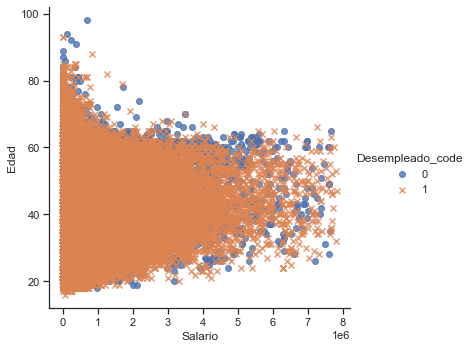

In [62]:
sns.lmplot(x='Salario'
           ,y='Edad'
           ,data=df_temp
           ,hue='Desempleado_code'
            ,fit_reg=False
            ,markers=["o", "x"])
plt.show()

** A partir del análisis, hay algunos grupos basados en la edad y el salario anterior. ** 

Aplicaremos el algoritmo de clúster de K-means para ver los clústeres. Antes de pasar datos al algoritmo K-means, es necesario normalizar las variables

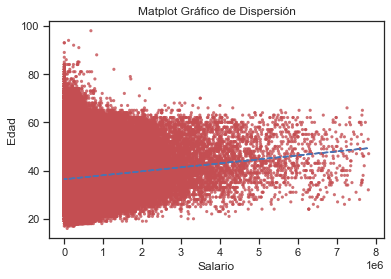

In [63]:
plt.scatter(df_temp.Salario, df_temp.Edad, alpha=0.8, c="r", edgecolors='none', s=10)

# calc the trendline
z = np.polyfit(df_temp.Salario, df_temp.Edad, 1)
p = np.poly1d(z)
plt.plot(df_temp.Salario,p(df_temp.Salario),"b--")

plt.title('Matplot Gráfico de Dispersión')
plt.ylabel('Edad')
plt.xlabel('Salario')
#plt.legend(loc=2)
plt.show()

In [64]:
def Crea_curva_elbow(data):
    """ Despliega curva elbow de K-means para la información data """
    from sklearn.cluster import KMeans
    df_kmeans_data = data
    k = range(1,10)
    kmeans = [KMeans(n_clusters=i) for i in k]
    score = [kmeans[i].fit(df_kmeans_data).score(df_kmeans_data)  for i in range(len(kmeans))]
    plt.figure(figsize=(8,5))
    plt.plot(k,score)
    plt.xlabel("Clusters")
    plt.ylabel("Puntaje")
    plt.title("Curva Elbow",fontsize=15)
    plt.show()    

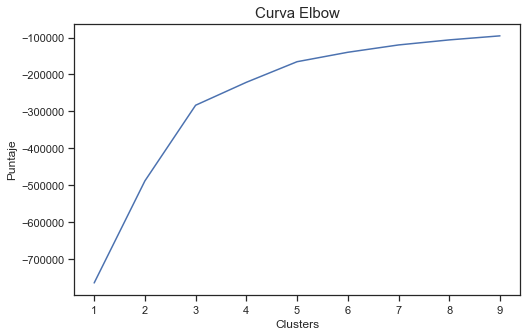

In [65]:
# checking number of clusters

Crea_curva_elbow(df_temp[df_temp.Desempleado_code==1][['salario_norm','edad_norm']])

> * De la curva elbow, 3 parece más ser el número más eficiente.

In [66]:
def Create_kmeans_cluster_graph(df_cal, data, n_clusters, x_title, y_title, chart_title):
    """ Display K-means cluster based on data """
    
    kmeans = KMeans(n_clusters=n_clusters # No of cluster in data
                    , random_state = random_state # Selecting same training data
                   ) 

    kmeans.fit(data)
    kmean_colors = [plotColor[c] for c in kmeans.labels_]


    fig = plt.figure(figsize=(12,8))
    plt.scatter(x= x_title + '_norm'
                , y= y_title + '_norm'
                , data=data 
                , color=kmean_colors # color of data points
                , alpha=0.25 # transparancy of data points
               )

    plt.xlabel(x_title)
    plt.ylabel(y_title)

    plt.scatter(x=kmeans.cluster_centers_[:,0]
                , y=kmeans.cluster_centers_[:,1]
                , color='black'
                , marker='X' # Marker sign for data points
                , s=100 # marker size
               )
    
    plt.title(chart_title,fontsize=15)
    plt.show()
    
    return kmeans.fit_predict(df_cal[df_cal.Desempleado_code==1][[x_title+'_norm', y_title +'_norm']])    

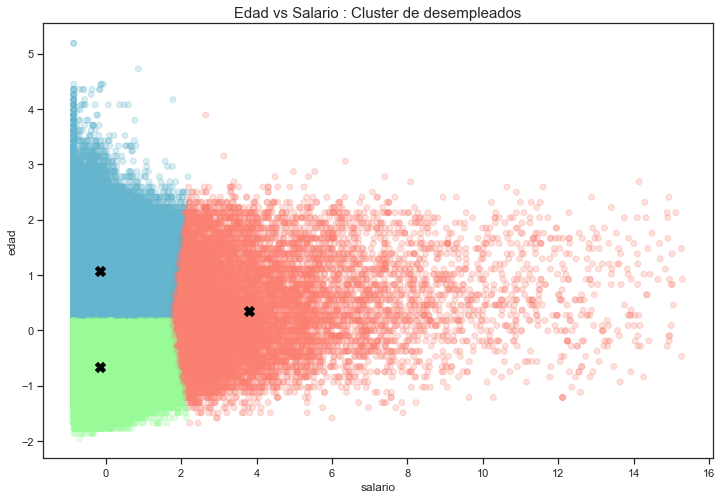

array([ 0, -1,  2,  1], dtype=int64)

In [67]:
df_temp['Cluster'] = -1 # by default set Cluster to -1
df_temp.loc[(df_temp.Desempleado_code==1),'Cluster'] = Create_kmeans_cluster_graph(df_temp
                            ,df_temp[df_temp.Desempleado_code==1][['salario_norm','edad_norm']]
                            ,3  ## Clusters
                           ,'salario'
                           ,'edad'
                           ,"Edad vs Salario : Cluster de desempleados")

df_temp['Cluster'].unique()

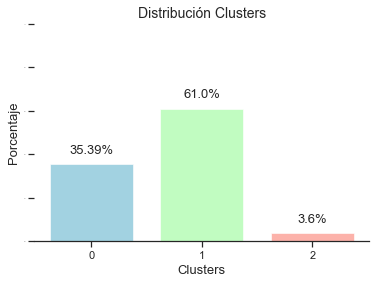

In [68]:
# Distribution of clusters
Desempleado_distribucion =  df_temp[df_temp['Desempleado_code']==1].Cluster.value_counts(normalize=True).sort_index()

Generate_bar_graph( x= Desempleado_distribucion.index
                   , y = Desempleado_distribucion.values
                   , x_title = 'Clusters'
                   , y_title = 'Porcentaje'
                   , chart_title = 'Distribución Clusters'
                  , color = plotColor)

Con base en el gráfico de clusters de K-medias, podemos ver que hay tres grupos y dos con poco aporte. 

> * Edades altas y salarios altos (grupo verde) 
> * Edades intermedias y salarios bajos (grupo celeste) 
> * Baja edad y bajos ingresos (grupo turquesa) 
> * Edades laborales e ingresos intermedios (grupo lila)
> * Rango de edad amplio e ngresos altos (grupo rojo)

Y el gráfico de distribución muestra que alrededor del 70% de los desempleados pertenecen a los clúster celeste y turquesa, que destacan por sus bajos ingresos.

Con 3 cluster el analisis salió muy parecido.

> * Edades de jovenes a intermedias y salarios bajos a intermedios (grupo verde) 
> * Edades intermedias a mayores y salarios bajos a intermedios (grupo celeste) 
> * Rango de edad amplio e ingresos intermedios a altos (grupo rojo)

Y el gráfico de distribución muestra que más de 96% de los funcionarios que retiraron el FCL pertenecen a los clúster celeste y verde, que destacan por sus bajos ingresos.

Revisemos los promedios de edades y salarios por cluster.

In [69]:
df_cluster_gp = df_temp[df_temp['Desempleado_code']==1].groupby('Cluster')
print(df_cluster_gp[['Edad','Salario']].mean())

              Edad       Salario
Cluster                         
0        48.678005  3.335022e+05
1        30.029176  3.350027e+05
2        40.804653  2.257938e+06


Basándome en información demográfica y otra relacionada con el desempleado, se ha intentado explorar las características de los trabajadores que desemplearon de cada grupo.

In [70]:
def Extract_highest_in_cluster(df_cal, df_cluster, feature, edad_salario_cluster_df ):
    """ Para cada característica, compare el valor del clúster con el valor general 
        y descubra las características distribuidas más altas para ese clúster  """
    
    #print(feature)
    df = df_cal.copy()
    feature_churn_dist = df[(df['Desempleado_code']==1)][feature].value_counts(normalize=True).reset_index()
    #print(feature_churn_dist)
    feature_churn_dist.columns = [feature,'Porcentaje']
      
    feature_cluster_dist = df_cluster[feature].value_counts(normalize=True).to_frame()
    feature_cluster_dist.columns = ['Porcentaje']
    feature_cluster_dist = feature_cluster_dist.reset_index()
    feature_cluster_dist_new = feature_cluster_dist.copy()
    
    edad_salario_df = df_cal[df_cal['Desempleado_code']==1].groupby(['Cluster',feature],as_index=False)[['Edad','Salario']].mean()
    #print(edad_salario_df)
    
    for i,cluster in enumerate(feature_cluster_dist_new['Cluster'].unique()):
        for i, label in enumerate(feature_churn_dist[feature].unique()):
            cluster_val = feature_cluster_dist_new[(feature_cluster_dist_new['Cluster']==cluster) & (feature_cluster_dist_new[feature]==label)]['Porcentaje']
            feature_val = feature_churn_dist[feature_churn_dist[feature] == label]['Porcentaje']
            
            if((len(feature_val.values) > 0) & (len(cluster_val.values) > 0)) :
                if((feature_val.values[0] < cluster_val.values[0])):
                    
                    edad_salario_cluster_df = edad_salario_cluster_df.append(pd.DataFrame({'Category':feature
                            , 'Label': ("No tiene "+ feature) if (df_cal[feature].dtypes == 'int64') & (label == 0) else (("Tiene "+feature) if (df_cal[feature].dtypes == 'int64') & (label == 1) else label)
                            , 'Porcentaje': cluster_val.values[0]
                            , 'Cluster' : cluster
                            , 'Avg_edad':    round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['Edad'].values[0],2)
                            , 'Avg_salario': round(edad_salario_df[(edad_salario_df['Cluster']==cluster) & (edad_salario_df[feature]==label) ]['Salario'].values[0],2)
                            , 'Represent_in_graph': 0 if (label == 0) | (label == 'No') else 1
                            , 'Label_in_graph' :  feature if (df_cal[feature].dtypes == 'int64') else label
                           }
                        , index = [len(edad_salario_cluster_df)])
                        )
    
    return edad_salario_cluster_df  

In [71]:
df_temp.columns

Index(['Periodo', 'Edad', 'RangoEdad', 'Genero', 'EstadoCivil', 'HayRetiro',
       'TipoRetiro', 'Salario', 'RangoSalario', 'SalarioPromedioRetorno',
       'RangoSalarioRetorno', 'TuvoReduccion', 'HayAportes',
       'InactivoPostRetiro', 'InactivoPostUltAporte', 'Desempleado', 'Brecha',
       'edad_norm', 'salario_norm', 'SalarioPromedioRetorno_norm',
       'Desempleado_code', 'Cluster'],
      dtype='object')

In [72]:
edad_salario_cluster_df = pd.DataFrame()
#binary_cols = ["Pensionado","TuvoReduccion"] "HayAportes","Diferenciabrechas","InactivoPostRetiro","InactivoPostUltAporte"
#,'HayAportes','InactivoPostRetiro', 'InactivoPostUltAporte', 'Brecha'
for feature in ["RangoEdad","Genero","EstadoCivil","RangoSalario","RangoSalarioRetorno","TuvoReduccion","TipoRetiro",'HayAportes',
                'InactivoPostRetiro', 'InactivoPostUltAporte', 'Brecha']:
    edad_salario_cluster_df = Extract_highest_in_cluster(df_temp, df_cluster_gp, feature,edad_salario_cluster_df)

#### Cluster 0 - Mayores de 45 años y salario menor a 1200000, sin salario retorno, y que tuvieron reducción-

In [73]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==0]

,Category,Label,Porcentaje,Cluster,Avg_edad,Avg_salario,Represent_in_graph,Label_in_graph
0,RangoEdad,Entre45y59,0.565763,0,50.56,332190.08,1,Entre45y59
1,RangoEdad,Entre59y100,0.095349,0,61.69,284662.28,1,Entre59y100
6,Genero,M,0.689808,0,49.00,348594.27,1,M
9,EstadoCivil,CASAD,0.283872,0,50.06,363931.37,1,CASAD
10,EstadoCivil,UNLIB,0.074249,0,48.09,315548.84,1,UNLIB
11,EstadoCivil,DIVOR,0.049179,0,50.22,344202.92,1,DIVOR
12,EstadoCivil,VIUDO,0.004882,0,53.94,301380.32,1,VIUDO
18,RangoSalario,<=Minimo,0.539860,0,49.12,163616.98,1,<=Minimo
19,RangoSalario,0.32-0.85,0.409059,0,48.18,469832.21,1,0.32-0.85
20,RangoSalario,0.85-1.23,0.045761,0,47.71,1007903.00,1,0.85-1.23


### Cluster 1 - Rango edad menores 45 años y con salarios menores a 850 mil. Mujeres solteras.

In [74]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==1]

,Category,Label,Porcentaje,Cluster,Avg_edad,Avg_salario,Represent_in_graph,Label_in_graph
2,RangoEdad,Entre31y45,0.473058,1,34.77,354768.21,1,Entre31y45
3,RangoEdad,Menor31,0.526942,1,25.77,317258.36,1,Menor31
7,Genero,F,0.371234,1,29.96,325639.48,1,F
13,EstadoCivil,SOLT,0.603455,1,29.91,341897.75,1,SOLT
14,EstadoCivil,DESC,0.272159,1,28.79,311003.71,1,DESC
21,RangoSalario,<=Minimo,0.533148,1,29.63,172077.66,1,<=Minimo
22,RangoSalario,0.32-0.85,0.421257,1,30.35,465406.20,1,0.32-0.85
27,RangoSalarioRetorno,0.32-0.85,0.389519,1,30.30,433138.51,1,0.32-0.85
28,RangoSalarioRetorno,<=Minimo,0.336397,1,29.60,229676.35,1,<=Minimo
34,TuvoReduccion,No,0.505700,1,29.99,302325.48,0,No


#### Cluster 2 - mayores a 45 años, hombres con salarios mayores a 4.3. 

In [75]:
edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==2]

,Category,Label,Porcentaje,Cluster,Avg_edad,Avg_salario,Represent_in_graph,Label_in_graph
4,RangoEdad,Entre31y45,0.564822,2,37.53,2172806.05,1,Entre31y45
5,RangoEdad,Entre45y59,0.283257,2,50.30,2466975.22,1,Entre45y59
8,Genero,M,0.669299,2,41.11,2292472.60,1,M
15,EstadoCivil,CASAD,0.282693,2,45.55,2403302.83,1,CASAD
16,EstadoCivil,DIVOR,0.039972,2,47.58,2322576.36,1,DIVOR
17,EstadoCivil,VIUDO,0.003384,2,55.71,2458806.43,1,VIUDO
23,RangoSalario,1.23-2.17,0.629820,2,39.85,1654207.89,1,1.23-2.17
24,RangoSalario,2.17-4.33,0.312161,2,42.07,2881155.42,1,2.17-4.33
25,RangoSalario,>4.33,0.058019,2,44.34,5458572.70,1,>4.33
29,RangoSalarioRetorno,0.85-1.23,0.124075,2,39.81,1830305.99,1,0.85-1.23


In [76]:
#### Cluster 4 - Edad entre 38 y 50 años y salarios entre 3.5 y 5.5 millones

In [77]:
#edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==3] Analisis para 5 clusters

In [78]:
#### Cluster 5 - Edad entre 38 y 41años y salarios entre 280000 y 500000 mil

In [79]:
# edad_salario_cluster_df[edad_salario_cluster_df['Cluster']==4] Analisis para 5 clusters

### Representación gráfica de clústeres

In [80]:
def Create_kmeans_cluster_with_label(data, cluster_visualize_gp, x_title, y_title, chart_title):
    """ Generate K-means cluster with labels """
    
    legend_list = []
    category_color = cluster_visualize_gp[['Category']].drop_duplicates().reset_index()
    annotations = []
    #print(data)
    #print([plotColor[c] for c in data.Cluster])
    #df_raw1[df_raw1['Desempleado_code']==1].groupby('Cluster')
           
    fig, ax = plt.subplots(figsize=(12,8))
    plt.scatter(x= x_title 
                , y= y_title
                , data=data 
                , color=[plotColor[c] for c in data.Cluster] # color of data points
                , alpha=0.25 # transparancy of data points
                , s = 15
               )

    for i,txt in enumerate(cluster_visualize_gp['Label_in_graph']):
        annotations.append(ax.text(cluster_visualize_gp['Avg_edad'][i]
                                , cluster_visualize_gp['Avg_salario'][i]
                                , txt))
                                #, fontsize = 13
                                #, weight="bold"))
        #print(annotations)

        ax.scatter(x=cluster_visualize_gp['Avg_edad'][i]
            , y=cluster_visualize_gp['Avg_salario'][i]
            , color = plotColor[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , label = cluster_visualize_gp['Label_in_graph'][i]
            , marker = markers[category_color[category_color['Category'] == cluster_visualize_gp['Category'][i]].index[0]]
            , s=120 # marker size
           )
    
    for key,i in enumerate(category_color.Category.values):
        legend_list.append(mlines.Line2D([]
                            , []
                            , linestyle= 'None'
                            , color = plotColor[key]      
                            , markersize = 10
                            , marker = markers[key]
                            , label= i))
    
    adjust_text(annotations, arrowprops={"arrowstyle": "-", "color": "black", "ls": "dashed", "alpha": 1.9},
               force_text=(2, 2),autoalign='y')
                #,x=cluster_visualize_gp['Avg_edad']
                #,y=cluster_visualize_gp['Avg_salario'])
    
    plt.legend(handles=legend_list
              , loc = 'lower right')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title(chart_title,fontsize=15)
    plt.show()           

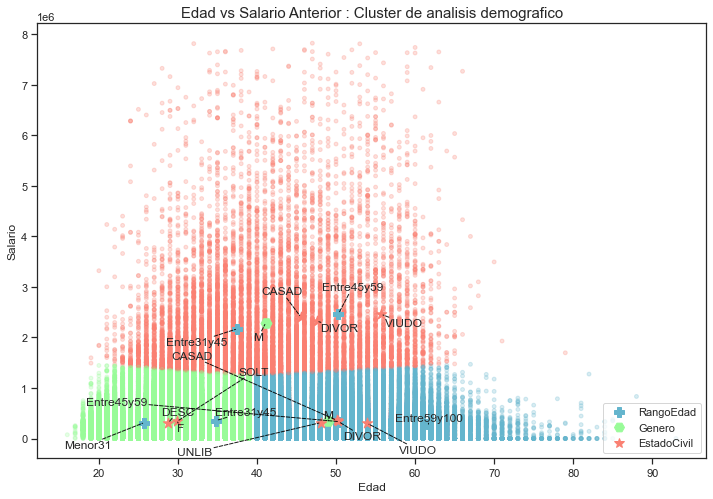

In [81]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'Genero')
                            | (edad_salario_cluster_df['Category'] == 'RangoEdad')
                            | (edad_salario_cluster_df['Category'] == 'EstadoCivil'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_temp[df_temp.Desempleado_code==1][['Edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'Edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis demografico")

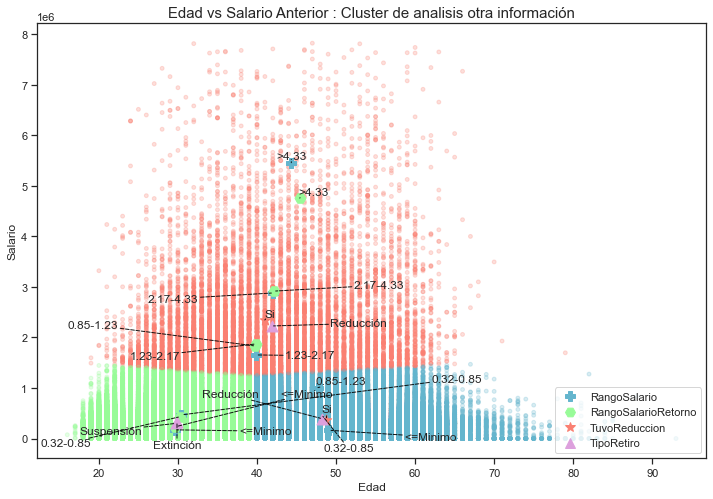

In [82]:
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'TuvoReduccion')
                           | (edad_salario_cluster_df['Category'] == 'RangoSalarioRetorno')
                           | (edad_salario_cluster_df['Category'] == 'TipoRetiro')                          
                            | (edad_salario_cluster_df['Category'] == 'RangoSalario'))]
                           #| (edad_salario_cluster_df['Category'] == 'InactivoPostRetiro'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_temp[df_temp.Desempleado_code==1][['Edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'Edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis otra información")

In [83]:
'''
cluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df['Represent_in_graph']==1) 
                          & ((edad_salario_cluster_df['Category'] == 'Brecha')
                            | (edad_salario_cluster_df['Category'] == 'HayAportes')
                            | (edad_salario_cluster_df['Category'] == 'InactivoPostUltAporte')
                            | (edad_salario_cluster_df['Category'] == 'InactivoPostRetiro'))]
#print(cluster_with_label_gp )

#print(df_raw1[df_raw1.Desempleado_code==1][['edad','salario','Cluster']])
Create_kmeans_cluster_with_label(df_temp[df_temp.Desempleado_code==1][['Edad','Salario','Cluster']]
                           ,cluster_with_label_gp.reset_index()
                           ,'Edad'
                           ,'Salario'
                           ,"Edad vs Salario Anterior : Cluster de analisis Aportes y brechas")
'''

'\ncluster_with_label_gp = edad_salario_cluster_df[(edad_salario_cluster_df[\'Represent_in_graph\']==1) \n                          & ((edad_salario_cluster_df[\'Category\'] == \'Brecha\')\n                            | (edad_salario_cluster_df[\'Category\'] == \'HayAportes\')\n                            | (edad_salario_cluster_df[\'Category\'] == \'InactivoPostUltAporte\')\n                            | (edad_salario_cluster_df[\'Category\'] == \'InactivoPostRetiro\'))]\n#print(cluster_with_label_gp )\n\n#print(df_raw1[df_raw1.Desempleado_code==1][[\'edad\',\'salario\',\'Cluster\']])\nCreate_kmeans_cluster_with_label(df_temp[df_temp.Desempleado_code==1][[\'Edad\',\'Salario\',\'Cluster\']]\n                           ,cluster_with_label_gp.reset_index()\n                           ,\'Edad\'\n                           ,\'Salario\'\n                           ,"Edad vs Salario Anterior : Cluster de analisis Aportes y brechas")\n'

In [84]:
#df_raw1['Desempleado_code'] = df_raw1['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
df_clu = df_temp.copy()
# Se elimina porque estan normalizadas.
""" Cambiar el nombre de las columnas y transformarlos en el formato adecuado y devolver el marco de datos """    
    
df_clu['RangoSalario'] = df_clu.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_clu['RangoSalarioRetorno'] = df_clu.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
df_clu['RangoEdad'] = df_clu.RangoEdad.map({'Menor31':1,'Entre31y45':2,'Entre45y59':3,'Entre59y100':4,'Mayor100':5}).astype(int)
df_clu['Genero'] = df_clu.Genero.map({'F':1,'M':2,'X':0}).astype(int)
df_clu['TipoRetiro'] = df_clu.TipoRetiro.map({'Extinción':1,'Suspensión':2,'Reducción':3}).astype(int)
df_clu['EstadoCivil'] = df_clu.EstadoCivil.map({'DESC':0,'SOLT':1,'CASAD':2,'DIVOR':3,'VIUDO':4,'UNLIB':5,'SEPAR':6}).astype(int) 
df_clu['TuvoReduccion'] = df_clu.TuvoReduccion.map({'No':0,'Si':1}).astype(int)
df_clu['Desempleado'] = df_clu['Desempleado_code'].astype(int)
#df_clu['InactivoPostRetiro'] = Normalize_feature(df_clu[['InactivoPostRetiro']])
#df_clu['InactivoPostUltAporte'] = Normalize_feature(df_clu[['InactivoPostUltAporte']])
#df_clu['HayAportes'] = Normalize_feature(df_clu[['HayAportes']])
# Codificar las variables
    
df_clu = df_clu.drop(columns=['RangoSalario','RangoSalarioRetorno','RangoEdad'])
df_clu = df_clu.drop(columns=['Cluster','Desempleado_code','Periodo','HayRetiro'])
df_clu = df_clu.drop(columns=['SalarioPromedioRetorno_norm','edad_norm', 'salario_norm'])
#df_clu = df_clu.drop(columns=['SalarioPromedioRetorno','Edad', 'Salario'])
df_clu = df_clu.drop(columns=['TuvoReduccion','Brecha'])

In [87]:
df_clu = df_clu.drop(columns=['TuvoReduccion','Brecha'])
df_clu = df_clu.drop(columns=['RangoSalario','RangoSalarioRetorno','RangoEdad'])

In [88]:
df_clu.head().T

,0,1,2,3,4
Edad,71.0,68.0,66.0,6.400000e+01,64.000
Genero,1.0,1.0,1.0,1.000000e+00,1.000
EstadoCivil,1.0,2.0,1.0,4.000000e+00,4.000
TipoRetiro,1.0,1.0,1.0,1.000000e+00,1.000
Salario,61386.5,0.0,0.0,1.344800e+06,717233.333
SalarioPromedioRetorno,61400.0,0.0,0.0,1.031017e+06,717233.333
HayAportes,1.0,0.0,0.0,1.000000e+00,0.000
InactivoPostRetiro,1.0,1.0,1.0,1.000000e+00,1.000
InactivoPostUltAporte,0.0,1.0,1.0,1.000000e+00,1.000
Desempleado,1.0,1.0,1.0,0.000000e+00,1.000


In [89]:
# Obtener las correlaciones de las variables con "Churn" con las actuales
df_clu.corr()['Desempleado'].sort_values(ascending = False)

Desempleado               1.000000
InactivoPostRetiro        0.420805
TipoRetiro                0.152418
InactivoPostUltAporte     0.147121
HayAportes                0.045995
Genero                   -0.007770
EstadoCivil              -0.010515
Edad                     -0.011418
SalarioPromedioRetorno   -0.019719
Salario                  -0.036922
Name: Desempleado, dtype: float64

In [90]:
correlated_features = set()
df_corr = df_clu
correlation_matrix = df_corr.corr()

In [91]:
# Se obtendran las caracteristicas que tengan un correlación mayor a .7.
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(colname2)

In [92]:
correlated_features

{'Salario', 'SalarioPromedioRetorno'}

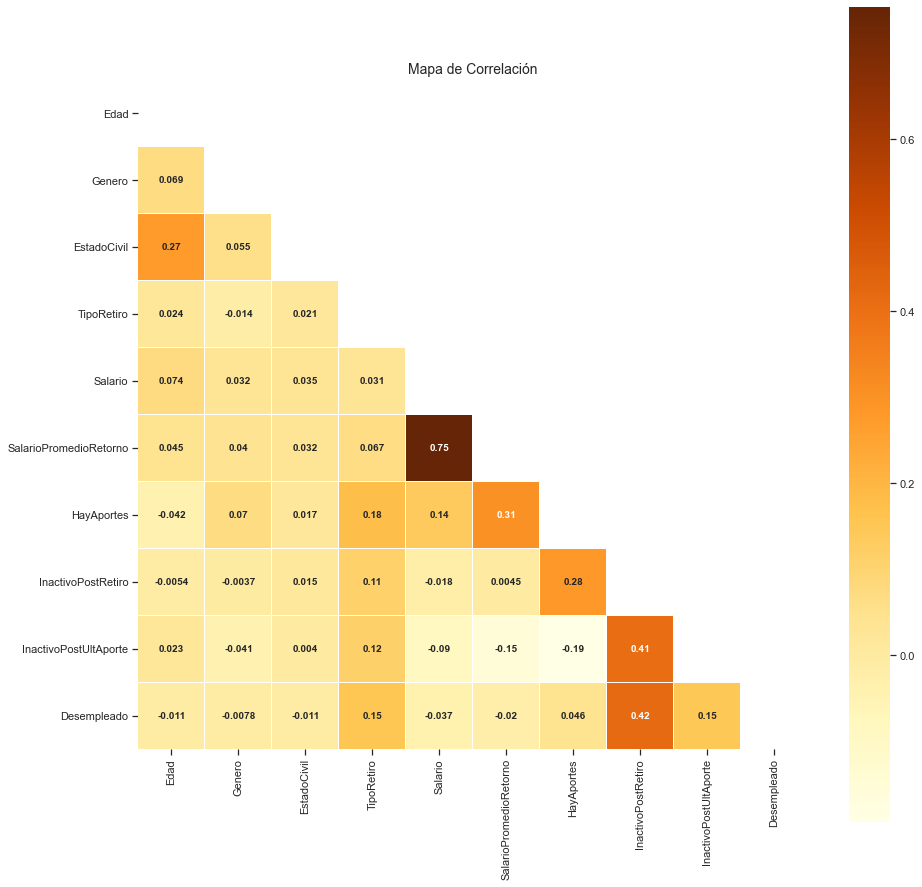

In [93]:
Generar_Mapa_Correlacion(df_clu.corr()
                       ,chart_title = 'Mapa de Correlación'
                       ,mask_uppertri = True)

In [94]:
import scipy.stats as ss
n=6
r=correlation_matrix
t=r*np.sqrt((n-2)/(1-r*r))
p_features = set()  
arr_matrix = ss.t.cdf(t, n-2)
p_matrix = pd.DataFrame(arr_matrix)

In [95]:
for i in range(len(p_matrix.columns)):  
    for j in range(i):
        if abs(p_matrix.iloc[i, j]) <= 0.05:
            colname = p_matrix.columns[i]
            colname2 = p_matrix.columns[j]
            p_features.add(colname)
            p_features.add(colname2)

In [96]:
# Rechazan la hipotesis nula. Se podrían eliminar
p_features

set()

ejecutaremos el modelo de Regresión Logística “desequilibrado”, para tener un “baseline”, es decir unas métricas contra las cuales podremos comparar y ver si mejoramos

#### Probando el Modelo sin estrategias

In [97]:
def Shuffle_data(df):
    """ Return shuffled data based on rows """
    return shuffle(df).reset_index().drop('index'
                                          , axis = 1)

def One_hot_encoding(df,feature):
    """ Apply one hot encoding to given features """
    return pd.concat([df
                      , pd.get_dummies(df[feature])]
                     , axis = 1)

def Merge_df(data, features):
    """ Return merge dataframe with given features"""
    merged_df = pd.DataFrame()
    for feature in features:
        merged_df = pd.concat([merged_df, data[feature]]
                              , axis = 1)
    return merged_df

def Normalize_df(data, cols):
    """ Normalize features """
    for col in cols:
        data[col] = Normalize_feature(data[[col]])
        
    return data    

def Create_model_df(df, col_cols, nom_cols, binary_cols, num_cols, target_col):
    """ Preparing data for modelling """
    
    df_model = Merge_df(df , [col_cols, num_cols, target_col])
    df_model = Shuffle_data(df_model)
    df_model = One_hot_encoding(df_model, nom_cols)
    
    df_model.drop(nom_cols, axis = 1, inplace = True)
    
    df_model = Normalize_df(df_model, num_cols)
    
    return (df_model.loc[:, ~df_model.columns.isin(target_col)]
            , df_model[target_col].values.flatten())


def Train_test_df(feature, target, test_size):
    """ Spliting data to train and test"""
    return train_test_split(feature
                     ,target
                     ,test_size= test_size
                     ,random_state= random_state)

In [98]:
df_temp.head().T

,0,1,2,3,4
Periodo,2020/10,2020/08,2020/11,2020/05,2020/06
Edad,71,68,66,64,64
RangoEdad,Entre59y100,Entre59y100,Entre59y100,Entre59y100,Entre59y100
Genero,F,F,F,F,F
EstadoCivil,SOLT,CASAD,SOLT,VIUDO,VIUDO
HayRetiro,1,1,1,1,1
TipoRetiro,Extinción,Extinción,Extinción,Extinción,Extinción
Salario,61386.5,0,0,1.3448e+06,717233
RangoSalario,<=Minimo,<=Minimo,<=Minimo,1.23-2.17,0.32-0.85
SalarioPromedioRetorno,61400,0,0,1.03102e+06,717233


In [99]:


#df_raw1['Desempleado_code'] = df_raw1['Desempleado'].map({'Si': 1,'No': 0}).astype(int)
df_clu = df_temp.copy()
# Se elimina porque estan normalizadas.
""" Cambiar el nombre de las columnas y transformarlos en el formato adecuado y devolver el marco de datos """    
    
#df_clu['RangoSalario'] = df_clu.RangoSalario.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
#df_clu['RangoSalarioRetorno'] = df_clu.RangoSalarioRetorno.map({'No':0,'<=Minimo':1,'0.32-0.85':2,'0.85-1.23':3,'1.23-2.17':4,'2.17-4.33':5,'>4.33':6})
#df_clu['RangoEdad'] = df_clu.RangoEdad.map({'Menor31':1,'Entre31y45':2,'Entre45y59':3,'Entre59y100':4,'Mayor100':5}).astype(int)
#df_clu['Genero'] = df_clu.Genero.map({'F':1,'M':2,'X':0}).astype(int)
#df_clu['TipoRetiro'] = df_clu.TipoRetiro.map({'Extinción':1,'Suspensión':2,'Reducción':3}).astype(int)
#df_clu['EstadoCivil'] = df_clu.EstadoCivil.map({'DESC':0,'SOLT':1,'CASAD':2,'DIVOR':3,'VIUDO':4,'UNLIB':5,'SEPAR':6}).astype(int) 
df_clu['TuvoReduccion'] = df_clu.TuvoReduccion.map({'No':0,'Si':1}).astype(int)
df_clu['Desempleado'] = df_clu['Desempleado_code'].astype(int)
#df_clu['InactivoPostRetiro'] = Normalize_feature(df_clu[['InactivoPostRetiro']])
#df_clu['InactivoPostUltAporte'] = Normalize_feature(df_clu[['InactivoPostUltAporte']])
#df_clu['HayAportes'] = Normalize_feature(df_clu[['HayAportes']])
# Codificar las variables
    
df_clu = df_clu.drop(columns=['RangoSalario','RangoSalarioRetorno','RangoEdad'])
df_clu = df_clu.drop(columns=['Cluster','Desempleado_code','Periodo','HayRetiro','Brecha','TuvoReduccion'])
df_clu = df_clu.drop(columns=['SalarioPromedioRetorno_norm','edad_norm', 'salario_norm'])
#df_clu = df_clu.drop(columns=['InactivoPostRetiro','HayAportes','InactivoPostUltAporte'])
#df_clu = df_clu.drop(columns=['SalarioPromedioRetorno','Edad', 'Salario'])

#### Dividir en Train & Test

In [100]:
# Se eliminan por la correlación 'RangoSalario','RangoSalarioRetorno','RangoEdad','Brecha','TvoReduccion'
binary_cols = ['HayAportes','InactivoPostUltAporte','InactivoPostRetiro']
cat_cols = ["Genero","EstadoCivil","TipoRetiro","HayAportes","InactivoPostUltAporte","InactivoPostRetiro"]
num_cols = ["Salario","SalarioPromedioRetorno","Edad"]
target_col = 'Desempleado'
nominal_cols = ["Genero","EstadoCivil","TipoRetiro"]
monto_cols = ["Salario","SalarioPromedioRetorno","Edad"]

In [132]:
df_model_feature.head().T

,0,1,2,3,4
HayAportes,1.000000,0.000000,1.000000,1.000000,0.000000
InactivoPostUltAporte,1.000000,1.000000,1.000000,1.000000,1.000000
InactivoPostRetiro,1.000000,1.000000,1.000000,1.000000,1.000000
Salario,-0.375239,0.111778,0.274120,-0.609434,-0.235268
SalarioPromedioRetorno,-0.350816,-0.783404,0.383367,-0.763887,-0.783404
Edad,1.941572,-0.564543,0.178010,1.384658,-0.935819
Genero_F,1.000000,1.000000,0.000000,0.000000,1.000000
Genero_M,0.000000,0.000000,1.000000,1.000000,0.000000
EstadoCivil_CASAD,0.000000,0.000000,0.000000,1.000000,1.000000
EstadoCivil_DESC,1.000000,0.000000,0.000000,0.000000,0.000000


In [101]:
df_model = df_clu.copy()
df_model_feature ,df_model_target = Create_model_df(df_model
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])

X_train, X_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.2)

In [102]:
print("----------------------------")
print("Tamaño original de las caracteristicas, ", df_model_feature.shape)
print("Tamaño original de la variable a evaluar, ", df_model_target.shape)
print("Tamaño x-train, ", X_train.shape)
print("Tamaño y-train, ", y_train.shape)
print("Tamaño x-test, ", X_test.shape)
print("Tamaño y-test, ", y_test.shape)
print("----------------------------")

----------------------------
Tamaño original de las caracteristicas,  (501918, 17)
Tamaño original de la variable a evaluar,  (501918,)
Tamaño x-train,  (401534, 17)
Tamaño y-train,  (401534,)
Tamaño x-test,  (100384, 17)
Tamaño y-test,  (100384,)
----------------------------


#### Desbalance en la clase

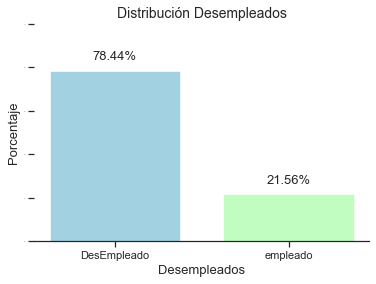

In [103]:
# Distribution in train dataset

Tasa_Desempleados = pd.value_counts(y_train) / len(y_train)
Generate_bar_graph(Tasa_Desempleados.index.map({1:'DesEmpleado',0:"empleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

Aquí, nuestro modelo de entrenamiento tiene un problema de desequilibrio de clases debido a la desigualdad en la distribución de datos. 

#### Se hara Upsampling de los datos de entrenamiento (train)

In [104]:
# Upsampling usando SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = random_state) #, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

#from imblearn.combine import SMOTETomek
#os_us = SMOTETomek() #ratio=0.5
#X_train_sm, y_train_sm = os_us.fit_resample(X_train, y_train)
#print ("Distribution before resampling {}".format(Counter(y_train)))
#print ("Distribution after resampling {}".format(Counter(y_train_sm)))


In [105]:
print("----------------------------")
print("Tamaño original y-train, ", y_train.shape)
print("Tamaño y-train con upsampling, ", y_train_sm.shape)
print("----------------------------")

----------------------------
Tamaño original y-train,  (401534,)
Tamaño y-train con upsampling,  (629960,)
----------------------------


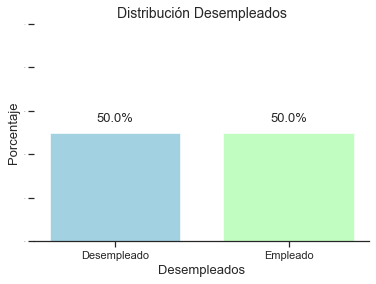

In [106]:
# Despues upsampling la nueva distribución del dataset de entrenamiento

Tasa_Desempleados = pd.value_counts(y_train_sm) / len(y_train_sm)
Generate_bar_graph(Tasa_Desempleados.index.map({0:'Empleado',1:"Desempleado"})
                   , Tasa_Desempleados.values
                   , 'Desempleados'
                   , 'Porcentaje'
                   , 'Distribución Desempleados')

In [107]:
# Prueba con un regresión logisticas con el tamaño original sin upsampling

#creamos una función que crea el modelo que usaremos cada vez
def run_model(X_train, X_test, y_train, y_test):
    LogReg_base = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg")
    LogReg_base.fit(X_train, y_train)
    return LogReg_base

#ejecutamos el modelo "tal cual"
model_logreg = run_model(X_train, X_test, y_train, y_test)

In [108]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score

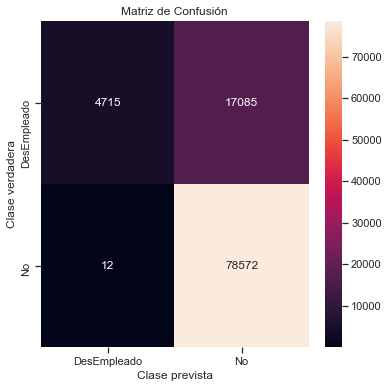

              precision    recall  f1-score   support

           0       1.00      0.22      0.36     21800
           1       0.82      1.00      0.90     78584

    accuracy                           0.83    100384
   macro avg       0.91      0.61      0.63    100384
weighted avg       0.86      0.83      0.78    100384



In [109]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(6, 6))
    # Porcentaje
    # sns.heatmap(conf_matrix/np.sum(conf_matrix), xticklabels=['No','Si'],yticklabels=['No','Si'], annot=True, fmt =".2%");
    sns.heatmap(conf_matrix, xticklabels=['DesEmpleado','No'],yticklabels=['DesEmpleado','No'], annot=True, fmt ="d");
    plt.title("Matriz de Confusión")
    plt.ylabel('Clase verdadera')
    plt.xlabel('Clase prevista')
    plt.show()
    print (classification_report(y_test, pred_y))

pred_y = model_logreg.predict(X_test)
mostrar_resultados(y_test, pred_y)

Aqui vemos la confusion matrix y en la clase 2 (es lo que nos interesa detectar) vemos 0 fallos y 26526
aciertos dando un** recall de 1** y en teoría el valor no se podría mejorar. También es interesante
notar que en la columna de f1-score obtenemos excelentes resultados PERO que realmente no nos
deben engañar… Sin embargo, Lo cierto es que nuestro modelo es capaz de detectar correctamente los casos correctos.

Utilizaremos un parámetro adicional en el modelo de Regresión logística en donde indicamos class_-
weight = “balanced” y con esto el algoritmo se encargará de equilibrar a la clase minoritaria durante
el entrenamiento. Veamos:

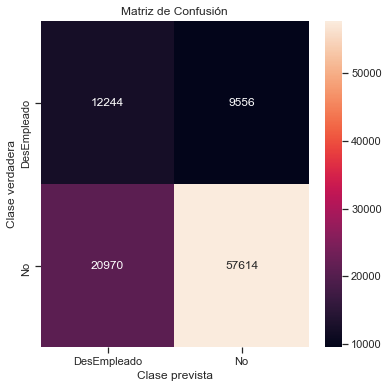

              precision    recall  f1-score   support

           0       0.37      0.56      0.45     21800
           1       0.86      0.73      0.79     78584

    accuracy                           0.70    100384
   macro avg       0.61      0.65      0.62    100384
weighted avg       0.75      0.70      0.72    100384



In [110]:
# Prueba con un regresión logisticas pero con el atributo balanceado paro con el grupo de tamaño original.
def run_model_balanced(X_train, X_test, y_train, y_test):
    LogRegBal = LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight="balanced")
    LogRegBal.fit(X_train, y_train)
    return LogRegBal

model_logreg_bal = run_model_balanced(X_train, X_test, y_train, y_test)
pred_y = model_logreg_bal.predict(X_test)
mostrar_resultados(y_test, pred_y)

Con la parametro balanced seguimos onteniendo buenos resultados.Puede haber problemas de overfitting

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
#df_model_feature.head().T
#df_temp.head().T

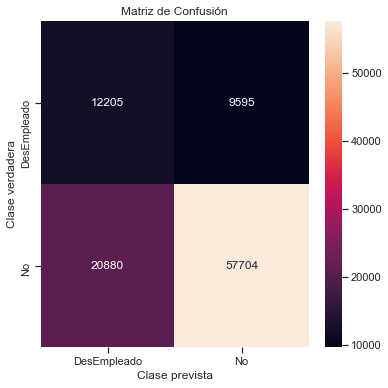

              precision    recall  f1-score   support

           0       0.37      0.56      0.44     21800
           1       0.86      0.73      0.79     78584

    accuracy                           0.70    100384
   macro avg       0.61      0.65      0.62    100384
weighted avg       0.75      0.70      0.72    100384



In [113]:
#Corre un regresio logistica con parametro balanced con el grupo upsamplig
model_logreg_sm = run_model_balanced(X_train_sm, X_test, y_train_sm, y_test)
pred_y = model_logreg_sm.predict(X_test)
mostrar_resultados(y_test, pred_y)

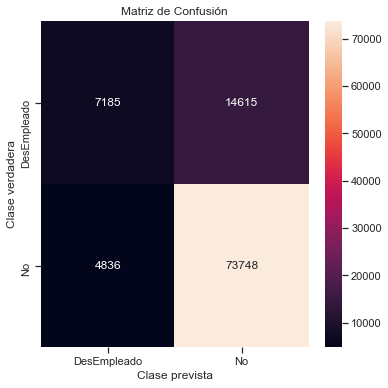

              precision    recall  f1-score   support

           0       0.60      0.33      0.42     21800
           1       0.83      0.94      0.88     78584

    accuracy                           0.81    100384
   macro avg       0.72      0.63      0.65    100384
weighted avg       0.78      0.81      0.78    100384



In [114]:
# Ejecutamos un randomforest con el train original.  Para que?
from sklearn.ensemble import RandomForestClassifier

RanFor_base = RandomForestClassifier(random_state=2)
RanFor_base.fit(X_train,y_train)

pred_y = RanFor_base.predict(X_test)
mostrar_resultados(y_test, pred_y)

In [115]:
y_proba = RanFor_base.predict_proba(X_test)[:,1]

In [116]:
#from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_proba)

0.7232027917651609

Tiene un metrica ROC_AUC excelente, esto nos idica qué tan bien esta clasificando las predicciones
Pero no predice desempleados.

#### Predecir la tasa de desempleo de cada trabajador según el modelo RandomForest

In [117]:
y_proba = RanFor_base.predict_proba(X_test)

Cross-validation

In [118]:
RanFor_base

RandomForestClassifier(random_state=2)

In [119]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10,random_state=2,shuffle=True)
#df_model_feature ,df_model_target
#cross_val_score(cl,X,y,cv=kf,scoring='roc_auc').mean()
cross_val_score(RanFor_base,df_model_feature ,df_model_target,cv=kf,scoring='roc_auc').mean()

0.7227492402720551

## Random forest
### 2 - más arboles

In [120]:
'''
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train_sm,y_train_sm,cv=5)
print(cv)
print(cv.mean())
knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train_sm,y_train_sm,cv=5)
print(cv)
print(cv.mean())
svc = SVC(probability = True)
cv = cross_val_score(svc,X_train_sm,y_train_sm,cv=5)
print(cv)
print(cv.mean())
'''

'\nfrom sklearn.model_selection import cross_val_score\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\nlr = LogisticRegression(max_iter = 2000)\ncv = cross_val_score(lr,X_train_sm,y_train_sm,cv=5)\nprint(cv)\nprint(cv.mean())\nknn = KNeighborsClassifier()\ncv = cross_val_score(knn,X_train_sm,y_train_sm,cv=5)\nprint(cv)\nprint(cv.mean())\nsvc = SVC(probability = True)\ncv = cross_val_score(svc,X_train_sm,y_train_sm,cv=5)\nprint(cv)\nprint(cv.mean())\n'

In [121]:
# Se hara con el train upsampling

#X_train2, X_test2, y_train2, y_test2 = Train_test_df(df_model_feature
#                                                 , df_model_target
#                                                 , test_size = 0.3)

#X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state = 0)
#from imblearn.over_sampling import SMOTE
#smt = SMOTE()
#X_train_res2, y_train_res2 = smt.fit_resample(X_train2, y_train2) 



In [122]:
X_train2 = X_train_sm
y_train2 = y_train_sm

RanFor_sm = RandomForestClassifier(n_estimators = 100, random_state=2)
RanFor_sm.fit(X_train2,y_train2)

RandomForestClassifier(random_state=2)

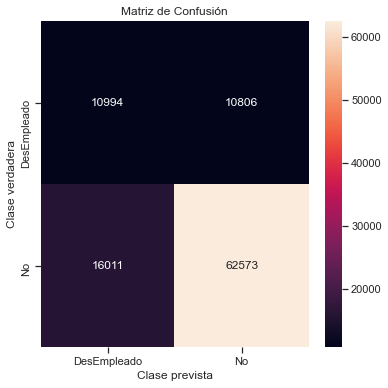

              precision    recall  f1-score   support

           0       0.41      0.50      0.45     21800
           1       0.85      0.80      0.82     78584

    accuracy                           0.73    100384
   macro avg       0.63      0.65      0.64    100384
weighted avg       0.76      0.73      0.74    100384



In [123]:
X_test2 = X_test
y_test2 = y_test
y_pred = RanFor_sm.predict(X_test2)
mostrar_resultados(y_test2, y_pred)

In [124]:
y_proba = RanFor_sm.predict_proba(X_test2)[:,1]
roc_auc_score(y_test2,y_proba)

0.7233297925459532

In [126]:
y_proba = RanFor_sm.predict_proba(X_test2)
# Cross validation
RanFor_sm

RandomForestClassifier(random_state=2)

In [127]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=2,shuffle=True)
#df_model_feature ,df_model_target
#cross_val_score(cl,X,y,cv=kf,scoring='roc_auc').mean()
cross_val_score(RanFor_sm,df_model_feature ,df_model_target,cv=kf,scoring='roc_auc').mean()

0.7227492402720551

In [128]:
RanFor_sm.feature_importances_.size

17

In [129]:
df_model_feature.columns.size

17

In [133]:
coef_dict={}

for name, importance in zip(df_model_feature.columns.values, RanFor_sm.feature_importances_):
    print(name, "=", importance)

HayAportes = 0.028530160093575344
InactivoPostUltAporte = 0.02802281734445536
InactivoPostRetiro = 0.07503281694568631
Salario = 0.35485183036001194
SalarioPromedioRetorno = 0.26067638758795825
Edad = 0.2029873168190302
Genero_F = 0.0013497730611113287
Genero_M = 0.0013302018715832663
EstadoCivil_CASAD = 0.0015835316075201525
EstadoCivil_DESC = 0.002483259534606403
EstadoCivil_DIVOR = 0.0010013634285702632
EstadoCivil_SOLT = 0.0018466554315160553
EstadoCivil_UNLIB = 0.0012595340875045317
EstadoCivil_VIUDO = 0.0003485239286967531
TipoRetiro_Extinción = 0.021127252335440015
TipoRetiro_Reducción = 0.0139935312524225
TipoRetiro_Suspensión = 0.0035750443103113945


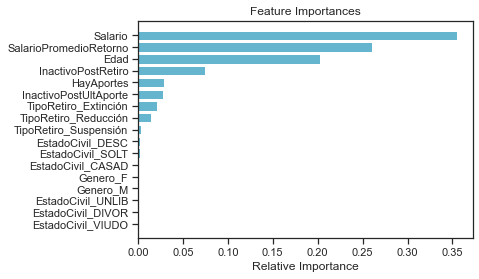

In [134]:
features = df_model_feature.columns.values
importances = RanFor_sm.feature_importances_
indices = np.argsort(importances)

#plt.size()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='c', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Hay que eliminar algunas caracteristicas que le estan aportando mucho al modelo y puede ser duplicada.
- Los rangos de salario, los salarios están normalizados
- Los valores de inactivo
- El rabgo de edad, esta normalizada.
- la brecha .

<AxesSubplot:>

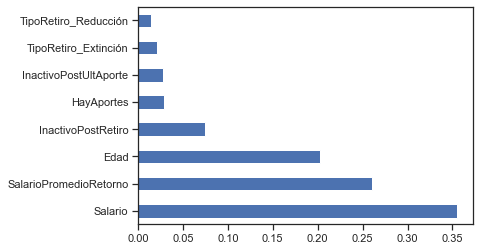

In [135]:
feat_importances = pd.Series(RanFor_sm.feature_importances_, index=df_model_feature.columns.values)
feat_importances.nlargest(8).plot(kind='barh')

In [136]:
X_train, X_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.25)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [137]:
###############################################################################

# ANN Build

###############################################################################

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense


def create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay):
    """
    Funcion para crear una NN para clasificacion binaria usando 2 HL
    """
    
    # Initialising the ANN
    model = Sequential()
    
    # First HL
    # [batch_size x n_features] x [n_features x w_in]
    model.add(Dense(units = w_in, input_dim = n_features, 
                    kernel_initializer = 'normal', 
                    activation = 'relu')) 
    # Second HL
    # [batch_size x w_in] x [w_in x w_h1]
    model.add(Dense(units = w_h1, input_dim = w_in, 
                    kernel_initializer = 'normal', 
                    activation = 'relu'))
    
    # Output Layer
    # [batch_size x w_h1] x [w_h1 x w_out]
    model.add(Dense(units = n_var_out, 
                    kernel_initializer = 'normal', 
                    activation = 'sigmoid')) 
    
    # Compile Model
    # Loss Function -> Cross Entropy (Binary)
    # Optimizer -> sgd, adam...
    if optimizer == 'sgd':
        keras.optimizers.SGD(lr=lr, momentum=momentum, decay=decay, nesterov=False)
        model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])
    else:
        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model

In [138]:
## fix random seed for reproducibility
#from tensorflow import set_random_seed
#from numpy.random import seed
#value = 7
#seed(value)
#set_random_seed(value)

# Parametros
n_features = np.shape(X_train)[1]
w_in = 12
w_h1 = 8
n_var_out = 1
batch_size = 100
nb_epochs = 100
optimizer = 'adam'
lr = 0.1
momentum = 0.01
decay = 0.0

# Create NN
model_nn = create_nn(n_features, w_in, w_h1, n_var_out, optimizer, lr, momentum, decay)
    
# Fitting the ANN to the Training set
model_nn.fit(X_train, y_train, batch_size = batch_size, epochs = nb_epochs)

Epoch 1/100
3765/3765 [==============================] - 6s 1ms/step - loss: 0.4636 - accuracy: 0.8209
Epoch 2/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4261 - accuracy: 0.8303
Epoch 3/100
3765/3765 [==============================] - 6s 2ms/step - loss: 0.4228 - accuracy: 0.8323
Epoch 4/100
3765/3765 [==============================] - 6s 2ms/step - loss: 0.4247 - accuracy: 0.8302
Epoch 5/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4223 - accuracy: 0.8302
Epoch 6/100
3765/3765 [==============================] - 6s 1ms/step - loss: 0.4206 - accuracy: 0.8306
Epoch 7/100
3765/3765 [==============================] - 6s 1ms/step - loss: 0.4194 - accuracy: 0.8310
Epoch 8/100
3765/3765 [==============================] - 6s 2ms/step - loss: 0.4182 - accuracy: 0.8308
Epoch 9/100
3765/3765 [==============================] - 6s 1ms/step - loss: 0.4180 - accuracy: 0.8304
Epoch 10/100
3765/3765 [==============================] - 5s 1ms/step - l

3765/3765 [==============================] - 5s 1ms/step - loss: 0.4113 - accuracy: 0.8298
Epoch 80/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4106 - accuracy: 0.8310
Epoch 81/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4110 - accuracy: 0.8305
Epoch 82/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4111 - accuracy: 0.8298
Epoch 83/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4105 - accuracy: 0.8304
Epoch 84/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4108 - accuracy: 0.8307
Epoch 85/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4109 - accuracy: 0.8307
Epoch 86/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4088 - accuracy: 0.8318
Epoch 87/100
3765/3765 [==============================] - 5s 1ms/step - loss: 0.4108 - accuracy: 0.8302
Epoch 88/100
3765/3765 [==============================] - 5s 1ms/step - loss:

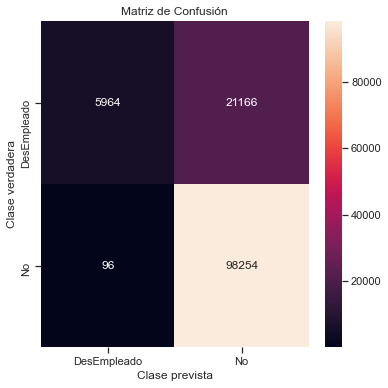

              precision    recall  f1-score   support

           0       0.98      0.22      0.36     27130
           1       0.82      1.00      0.90     98350

    accuracy                           0.83    125480
   macro avg       0.90      0.61      0.63    125480
weighted avg       0.86      0.83      0.78    125480



In [139]:
###############################################################################

# ANN Predictions

###############################################################################

# Predict
y_pred = model_nn.predict(X_test)
y_pred = np.round(y_pred)

mostrar_resultados(y_test, y_pred)

In [152]:
# Con menos variables

print(model_nn.predict(np.array([[0,0,0,400000,300000,45,1,0,0,0,0,1,0,0,0,0,1]])))
print(RanFor_sm.predict(np.array([[0,0,0,400000,300000,45,1,0,0,0,0,1,0,0,0,0,1]])))
print(RanFor_base.predict(np.array([[0,0,0,1400000,0,25,0,1,0,0,0,1,0,0,1,0,0]])))
print(model_logreg_sm.predict(np.array([[0,0,0,1400000,0,25,0,1,0,0,0,1,0,0,1,0,0]])))
print(model_logreg.predict(np.array([[0,0,0,1400000,0,25,0,1,0,0,0,1,0,0,1,0,0]])))
print(model_logreg_bal.predict(np.array([[0,1,1,1400000,0,25,1,0,1,0,0,0,0,0,1,0,0]])))

#HayAportes = 0.028530160093575344
#InactivoPostUltAporte = 0.02802281734445536
#InactivoPostRetiro = 0.07503281694568631
#Salario = 0.35485183036001194
#SalarioPromedioRetorno = 0.26067638758795825
#Edad = 0.2029873168190302
#Genero_F = 0.0013497730611113287
#Genero_M = 0.0013302018715832663
#EstadoCivil_CASAD = 0.0015835316075201525
#EstadoCivil_DESC = 0.002483259534606403
#EstadoCivil_DIVOR = 0.0010013634285702632
#EstadoCivil_SOLT = 0.0018466554315160553
#EstadoCivil_UNLIB = 0.0012595340875045317
#EstadoCivil_VIUDO = 0.0003485239286967531
#TipoRetiro_Extinción = 0.021127252335440015
#TipoRetiro_Reducción = 0.0139935312524225
#TipoRetiro_Suspensión = 0.0035750443103113945


# Probar el modelo , faltan parametros
#print(model_nn.predict(np.array([[0,1,0,0,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]])))
#print(RanFor_sm.predict(np.array([[0,1,0,0,0,1000000,350000,30,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]])))
#print(RanFor_base(np.array([[0,1,0,0,0,400000,0,45,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0]])))

#TuvoReduccion #HayAportes #Brecha #InactivoPostUltAporte #InactivoPostRetiro
#Salario #SalarioPromedioRetorno #Edad
#RangoEdad_Entre31y45 #RangoEdad_Entre45y59 #RangoEdad_Entre59y100 #RangoEdad_Menor31
#Genero_F #Genero_M
#EstadoCivil_CASAD #EstadoCivil_DESC #EstadoCivil_DIVOR #EstadoCivil_SOLT #EstadoCivil_UNLIB #EstadoCivil_VIUDO
#RangoSalario_0.32-0.85 #RangoSalario_0.85-1.23 #RangoSalario_1.23-2.17 #RangoSalario_2.17-4.33 #RangoSalario_<=Minimo
#RangoSalario_>4.33 
#RangoSalarioRetorno_0.32-0.85 #RangoSalarioRetorno_0.85-1.23 #RangoSalarioRetorno_1.23-2.17
#RangoSalarioRetorno_2.17-4.33 #RangoSalarioRetorno_<=Minimo #RangoSalarioRetorno_>4.33 #RangoSalarioRetorno_No
#TipoRetiro_Extinción #TipoRetiro_Reducción #TipoRetiro_Suspensión

[[0.]]
[0]
[0]
[0]
[0]
[0]


#### Desarrollo del Modelo

Aquí, usaré modelos de regresión logística, Random forest y aumento de gradiente(**Gradient boosting**) para predecir desempleados y comparar qué modelo funciona mejor para nuestro conjunto de datos. Además, analizare el conjunto de datos original y los datos de muestreo superior para todos estos modelos.

### Ajuste de hiperparametros (Hyperparameter Tunning)

Basado en datos originales y de Upsampling, ajustamos los hiperparámetros para nuestros datos de entrenamiento para los tres modelos.

In [153]:
#X_train, X_test, y_train, y_test = Train_test_df(df_model_feature
#                                                 , df_model_target
#                                                 , test_size = 0.75)
X_train, X_test, y_train, y_test = Train_test_df(df_model_feature
                                                 , df_model_target
                                                 , test_size = 0.75)
# Se le hace un escalado - Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
# Luego el upsampling
sm = SMOTE(random_state = random_state) #, ratio = 1.0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print("----------------------------")
print("Original features shape, ", df_model_feature.shape)
print("Original target shape, ", df_model_target.shape)
print("x train shape, ", X_train.shape)
print("y train shape, ", y_train.shape)
print("x test shape, ", X_test.shape)
print("y test shape, ", y_test.shape)
print("x train shape sm, ", X_train_sm.shape)
print("y train shape sm, ", y_train_sm.shape)
print("----------------------------")

----------------------------
Original features shape,  (501918, 17)
Original target shape,  (501918,)
x train shape,  (125479, 17)
y train shape,  (125479,)
x test shape,  (376439, 17)
y test shape,  (376439,)
x train shape sm,  (197052, 17)
y train shape sm,  (197052,)
----------------------------


In [154]:
'''

#from xgboost.sklearn import XGBRegressor
import xgboost as xgb
modelo =  xgb.XGBClassifier()
modelo.fit(X_train_sm, y_train_sm)
# Realizo las predicciones
y_pred = modelo.predict(X_train_sm)
predicciones = [round(value) for value in y_pred]
# Evalúo las predicciones
precision_train = accuracy_score(y_train_sm, predicciones)

# Repito el proceso con datos de evaluacion
y_pred = modelo.predict(X_test)
predicciones = [round(value) for value in y_pred]

# Evalúo las predicciones
precision_test = accuracy_score(y_test, predicciones)
print(modelo)
print('Precisión xgboost train/test  {0:.3f}/{1:.3f}'
      .format(precision_train, precision_test))
'''      

"\n\n#from xgboost.sklearn import XGBRegressor\nimport xgboost as xgb\nmodelo =  xgb.XGBClassifier()\nmodelo.fit(X_train_sm, y_train_sm)\n# Realizo las predicciones\ny_pred = modelo.predict(X_train_sm)\npredicciones = [round(value) for value in y_pred]\n# Evalúo las predicciones\nprecision_train = accuracy_score(y_train_sm, predicciones)\n\n# Repito el proceso con datos de evaluacion\ny_pred = modelo.predict(X_test)\npredicciones = [round(value) for value in y_pred]\n\n# Evalúo las predicciones\nprecision_test = accuracy_score(y_test, predicciones)\nprint(modelo)\nprint('Precisión xgboost train/test  {0:.3f}/{1:.3f}'\n      .format(precision_train, precision_test))\n"

In [155]:
def Parameter_tunning(x, y, models, clsModelsNm, parameters, score):
    
    tuned_params = {}
    for i,model in enumerate(models):
        print(clsModelsNm[i])
        if clsModelsNm[i] == "Logistic Regression":
            ## Se cambiaron porque daba error con los parametros anteriores
            solver_options = ['newton-cg','sag','lbfgs']  ## Le quite esta 'lbfgs',  -- sag --'liblinear'
            # ValueError: Solver liblinear does not support a multinomial backend.
            multi_class_options = ['ovr', 'multinomial'] 
            class_weight_options = ['None', 'balanced']

            param_grid_RL = dict(solver = solver_options, multi_class = 
            multi_class_options, class_weight = class_weight_options)

            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = param_grid_RL  ####parameters[clsModelsNm[i]]
                            , scoring = score
                            , n_jobs = 3
                           )            
            
        else:
            print(clsModelsNm[i])
            grid = GridSearchCV(estimator = model 
                            , cv = 5
                            , param_grid = parameters[clsModelsNm[i]]
                            , scoring = score                          
                            , n_jobs = 3
                           )
        grid.fit(x,y)
        print(grid.best_score_)
        print(grid.best_params_)
        tuned_params[clsModelsNm[i]] = {'params':grid.best_params_}
    
    return tuned_params

In [156]:
clsModelsNm = ["Logistic Regression", "Random Forest", "xgb"] #"Gradient boosting"]
#clsModelsNm = [ "xgb"]
scoreMatrix = ['accuracy','precision','recall','f1','neg_log_loss']
'''
clsParams = {'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'Gradient boosting': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }

'''
clsParams = {'Logistic Regression':{'C':[0.1, 0.5, 1, 5, 10, 15, 20, 100] 
                                   ,'penalty':['l1','l2']
                                    }
             , 'Random Forest': {'max_depth':[3,5,7,10,15,20]
                                ,'n_estimators':[100,150,200]
                                ,'max_features':['auto',0.7,0.2]
                                ,'min_samples_leaf':[1,5,10,15,20]
                                 }
             , 'xgb': {'learning_rate': [0.05, 0.1, 0.2]
                                    ,'n_estimators':[10,50,100,150,200]
                                    ,'max_depth':[3,5,7]
                                    ,'min_samples_split':[0.1, 0.5, 1.0]
                                    ,'min_samples_leaf':[1, 5, 10, 15, 20]
                                    ,'subsample': [0.1, 0.5, 0.7 , 1]
                                    }
            }            

In [157]:
clsLR = LogisticRegression(random_state = random_state)
clsRF = RandomForestClassifier(random_state = random_state)
clsGB = GradientBoostingClassifier(random_state = random_state)

clsModels = [clsLR, clsRF, clsGB]
#clsModels = [clsGB]


tuned_params = Parameter_tunning(X_train, y_train, clsModels, clsModelsNm, clsParams, 'neg_log_loss')

Logistic Regression
-0.4284208092174902
{'class_weight': 'None', 'multi_class': 'ovr', 'solver': 'sag'}
Random Forest
Random Forest
-0.4104142944442584
{'max_depth': 15, 'max_features': 0.7, 'min_samples_leaf': 20, 'n_estimators': 200}
xgb
xgb
-0.41249725034399826
{'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 20, 'min_samples_split': 0.1, 'n_estimators': 200, 'subsample': 1}


In [158]:
# Probando hiperparametro con umsampling
# Upsampling usando SMOTE
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = random_state) #, ratio = 1.0)
#X_train_sm , y_train_sm = sm.fit_resample(X_train,y_train)

print("----------------------------")
print("Original x train shape, ", X_train.shape)
print("Resample x train shape, ", X_train_sm.shape)
print("----------------------------")

----------------------------
Original x train shape,  (125479, 17)
Resample x train shape,  (197052, 17)
----------------------------


In [159]:

clsLR_sm = LogisticRegression(random_state = random_state)
clsRF_sm = RandomForestClassifier(random_state = random_state)
clsGB_sm = GradientBoostingClassifier(random_state = random_state)

clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

tuned_params_sm = Parameter_tunning(X_train_sm, y_train_sm, clsModels_sm, clsModelsNm, clsParams , 'neg_log_loss')

Logistic Regression
-0.5836014236716062
{'class_weight': 'balanced', 'multi_class': 'multinomial', 'solver': 'sag'}
Random Forest
Random Forest
-0.47541648270001174
{'max_depth': 20, 'max_features': 0.7, 'min_samples_leaf': 1, 'n_estimators': 200}
xgb
xgb
-0.419170189873033
{'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 15, 'min_samples_split': 0.1, 'n_estimators': 200, 'subsample': 1}


### Model Comparision

During hyperparameter tunning process, I got best parameters for each models. using these parameter and corss_val_score method, 
I have compared different metrics and try to find best threshold value with lower log loss score.

Intuition process -

Because target variable is binary value, log loss would be better metrics to find uncertainity of the model. Once I'll explore a better model wih lower log loss score, then I'll tune threshold to improve F1/Recall/Precision score.

In [430]:
# Graph of precision & recall against threshold
def plot_precision_recall_vs_thresold(precisions, recalls, thresholds):
    plt.plot(thresholds,precisions[:-1],label="Precision")
    plt.plot(thresholds,recalls[:-1],label="Recall")
    plt.plot(thresholds,2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1]) ,label="F1")
    plt.title("Precision, recall & F1 vs thresold")
    plt.xlabel("Thresold")
    plt.legend(loc='lower right')
    plt.show()

In [431]:
def Cross_validation_score(clsModels, clsModelsNm, clsSample, scoreMatrix):
    """ Cross validation using cross_val_score method """
    for i,model in enumerate(clsModels):
        print("===============================================")
        print(clsModelsNm[i])

        for j, sample in enumerate(clsSample):
            print("************************************************")
            print(sample[2])
            
            for score in scoreMatrix:
                scores = cross_val_score(model, sample[0], sample[1], cv=5 , scoring = score)
                print(score, " score:", scores.mean())
                
            y_scores = cross_val_predict(model, sample[0], sample[1], cv=5, method="predict_proba") 
            
            
            precisions, recalls, thresholds = metrics.precision_recall_curve(sample[1], y_scores[:][:,1]) 
            plot_precision_recall_vs_thresold(precisions, recalls, thresholds)
            score_matrix = pd.DataFrame({'Precisions': precisions[:-1]
                                ,'Recalls': recalls[:-1]
                                ,'F1': 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1]+recalls[:-1])
                                ,'Threshold': thresholds
                               })
            #print("When percision and recall are same \n" , score_matrix[ score_matrix['Precisions'] == score_matrix['Recalls']] )
            print("When F1 score is max \n" , score_matrix[ score_matrix['F1'] == max(score_matrix['F1'])] )

> ### Original Data

Logistic Regression
************************************************
Original data
accuracy  score: 0.9998884319277925
precision  score: 0.9998574104712091
recall  score: 1.0
f1  score: 0.9999286990113847
neg_log_loss  score: -0.0015551206952133538


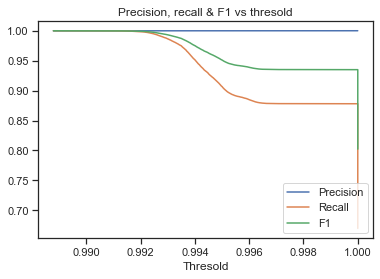

When F1 score is max 
    Precisions  Recalls        F1  Threshold
0    0.999857      1.0  0.999929   0.988787
Random Forest
************************************************
Original data
accuracy  score: 0.9998884319277925
precision  score: 0.9998574104712091
recall  score: 1.0
f1  score: 0.9999286990113847
neg_log_loss  score: -0.0010803441571247178


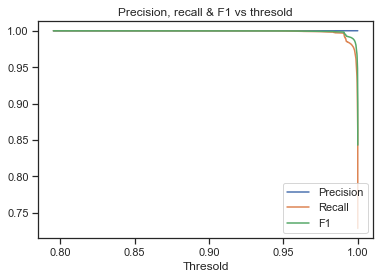

When F1 score is max 
    Precisions  Recalls        F1  Threshold
0    0.999857      1.0  0.999929   0.795389
Gradient boosting
************************************************
Original data
accuracy  score: 0.9998884319277925
precision  score: 0.9998574104712091
recall  score: 1.0
f1  score: 0.9999286990113847
neg_log_loss  score: -0.0008589341117865062


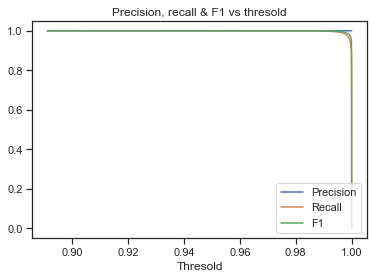

When F1 score is max 
    Precisions  Recalls        F1  Threshold
0    0.999857      1.0  0.999929   0.891125


In [434]:
# Original data

clsLR = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'l2')

clsRF = RandomForestClassifier(random_state = random_state
                              ,max_depth = 7 
                              ,max_features = 0.7
                              ,min_samples_leaf = 1
                              ,n_estimators = 100
                              )

# clsRF = RandomForestClassifier(random_state = random_state,max_depth = 15,max_features = 'auto',min_samples_leaf = 10
#                              ,n_estimators = 150 )

clsGB = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 3 #5
                              , n_estimators = 200 #150
                              , learning_rate = 0.2 #0.05
                              , min_samples_leaf = 1 #20 
                              , min_samples_split = 0.5 #0.1
                              , subsample = 1 #0.7
                                  )

clsModels = [clsLR, clsRF, clsGB]

Cross_validation_score(clsModels, clsModelsNm, [(X_train, y_train,'Original data')], scoreMatrix)

### Upsampling data

Logistic Regression
************************************************
Upsampled data
accuracy  score: 0.9999235999694399
precision  score: 0.9998472588042873
recall  score: 1.0
f1  score: 0.9999236147534447
neg_log_loss  score: -0.000590930752557019


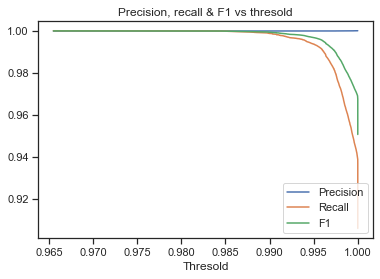

When F1 score is max 
    Precisions  Recalls        F1  Threshold
0    0.999847      1.0  0.999924   0.965502
Random Forest
************************************************
Upsampled data
accuracy  score: 0.9999235999694399
precision  score: 0.9998472588042873
recall  score: 1.0
f1  score: 0.9999236147534447
neg_log_loss  score: -0.0007977967760235212


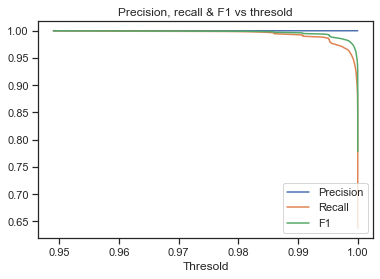

When F1 score is max 
    Precisions  Recalls        F1  Threshold
0    0.999847      1.0  0.999924   0.949014
Gradient boosting
************************************************
Upsampled data
accuracy  score: 0.9999235999694399
precision  score: 0.9998472588042873
recall  score: 1.0
f1  score: 0.9999236147534447
neg_log_loss  score: -0.0006398042648209643


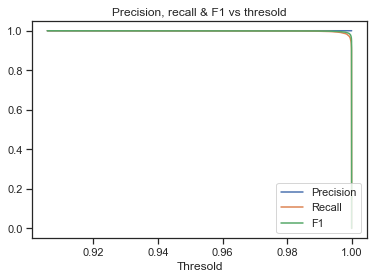

When F1 score is max 
    Precisions  Recalls        F1  Threshold
0    0.999847      1.0  0.999924    0.90573


In [436]:
# resample data


clsLR_sm = LogisticRegression(random_state = random_state
                           , C = 0.5
                           , penalty = 'none')

clsRF_sm = RandomForestClassifier(random_state = random_state
                               , max_depth = 7 #20
                              , n_estimators = 200
                              , max_features = 0.7 #'auto'
                              , min_samples_leaf = 20 #1 
                                 )

clsGB_sm = GradientBoostingClassifier(random_state = random_state
                              , max_depth = 7 #5
                              , n_estimators = 200 #100
                              , learning_rate = 0.2
                              , min_samples_leaf = 1 #10 
                              , min_samples_split = 0.5 #0.1
                              , subsample = 1
                                     )
                        
clsModels_sm = [clsLR_sm, clsRF_sm, clsGB_sm]

Cross_validation_score(clsModels_sm, clsModelsNm, [(X_train_sm, y_train_sm,'Upsampled data')], scoreMatrix)

Using these threshold values, now we will tune our model and evaluate it on testing dataset.

### Model Evaluation

Up till now, I was working on training dataset to train model. Let's checked how models are performing on unseen dataset (testing).

In [437]:
def Cus_log_loss(target, predicted):
    if len(predicted) != len(target):
        print("Data object initiated")
        return
    
    target = [float(x) for x in target] # converting target into float
    predicted = [min([max([x,1e-15]), 1-1e-15]) for x in predicted]
        
    return -1.0 / len(target) *  sum([ target[i] * math.log(predicted[i]) + (1.0 - target[i]) * math.log(1.0 - predicted[i]) 
                                      for i in range(len(predicted))])

In [438]:
def Model_evaluation(models, clsModelsNm, x_train, y_train, x_test, y_test,  threshold ):
    
    predicted_val = {}
    for i, model in enumerate(clsModelsNm):
        models[i].fit(x_train,y_train)
        predicted_proba = models[i].predict_proba(x_test)
        
        predicted = predicted_proba[:,1].copy()
        predicted[predicted >=threshold[i]] = 1
        predicted[predicted < threshold[i]] = 0
        
        confusion_matrix_matrix = metrics.confusion_matrix(y_true = y_test
                                                   ,y_pred = predicted
                                                   #,normalize = 'true' 
                                                   )
        
        print("***********",clsModelsNm[i], "*************")
        print(metrics.classification_report(y_test, predicted))
        print("*******************************************")
        #print("Log loss score", round(metrics.log_loss(y_test,models[i].predict_proba(x_test)[:,1]),2))
        print("Log loss score", round(Cus_log_loss(y_test,predicted_proba[:,1]),2))
        print("*******************************************")
        print("Confusion matrix")
        sns.heatmap(confusion_matrix_matrix
                    , annot=True
                    , fmt="d"
                   )
        plt.xlabel("Predicted label")
        plt.ylabel("Actual label")
        plt.show()
        print("*******************************************")
        
        predicted_val[model] = predicted

### Original data

*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81038
           1       1.00      1.00      1.00    295415

    accuracy                           1.00    376453
   macro avg       1.00      1.00      1.00    376453
weighted avg       1.00      1.00      1.00    376453

*******************************************
Log loss score 0.0
*******************************************
Confusion matrix


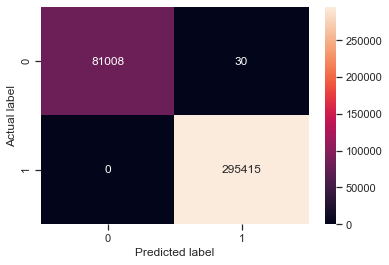

*******************************************
*********** Random Forest *************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81038
           1       1.00      1.00      1.00    295415

    accuracy                           1.00    376453
   macro avg       1.00      1.00      1.00    376453
weighted avg       1.00      1.00      1.00    376453

*******************************************
Log loss score 0.0
*******************************************
Confusion matrix


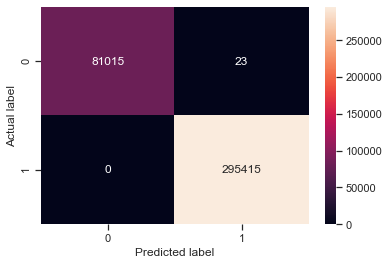

*******************************************
*********** Gradient boosting *************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81038
           1       1.00      1.00      1.00    295415

    accuracy                           1.00    376453
   macro avg       1.00      1.00      1.00    376453
weighted avg       1.00      1.00      1.00    376453

*******************************************
Log loss score 0.0
*******************************************
Confusion matrix


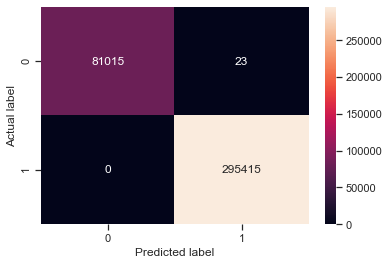

*******************************************


In [439]:
Logistic_threshold = 0.988787
Random_forest_threshold = 0.795389
Gradient_boosting_threshold = 0.891125

Model_evaluation(clsModels
                 , clsModelsNm
                 , X_train
                 , y_train
                 , X_test
                 , y_test
                 , [Logistic_threshold
                    ,Random_forest_threshold
                    , Gradient_boosting_threshold  ] )

### Upsampling data

*********** Logistic Regression *************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81038
           1       1.00      1.00      1.00    295415

    accuracy                           1.00    376453
   macro avg       1.00      1.00      1.00    376453
weighted avg       1.00      1.00      1.00    376453

*******************************************
Log loss score 0.0
*******************************************
Confusion matrix


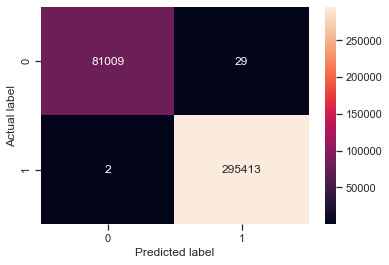

*******************************************
*********** Random Forest *************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81038
           1       1.00      1.00      1.00    295415

    accuracy                           1.00    376453
   macro avg       1.00      1.00      1.00    376453
weighted avg       1.00      1.00      1.00    376453

*******************************************
Log loss score 0.0
*******************************************
Confusion matrix


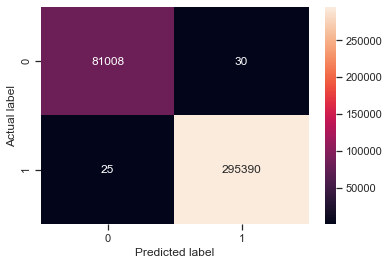

*******************************************
*********** Gradient boosting *************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81038
           1       1.00      1.00      1.00    295415

    accuracy                           1.00    376453
   macro avg       1.00      1.00      1.00    376453
weighted avg       1.00      1.00      1.00    376453

*******************************************
Log loss score 0.0
*******************************************
Confusion matrix


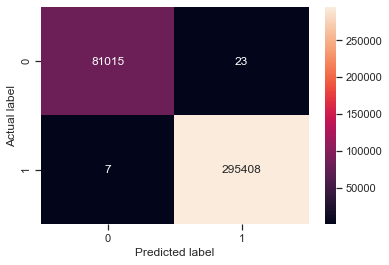

*******************************************


In [440]:
Logistic_threshold_sm = 0.965502
Random_forest_threshold_sm = 0.949014
Gradient_boosting_threshold_sm = 0.90573

Model_evaluation(clsModels_sm
                 , clsModelsNm
                 , X_train_sm
                 , y_train_sm
                 , X_test
                 , y_test
                 , [Logistic_threshold_sm
                    ,Random_forest_threshold_sm
                    , Gradient_boosting_threshold_sm  ] )

### Model conclusion

Based on model comparision and evaluation process, upsampling data works better during training process, however not with unseen data (based on log loss score). One of the reason could be data leakage in corss_val_score step.

However, log loss score for original dataset remains same with training dataset as well as testing dataset.

From above analysis, gradient boosting with original dataset has stable and best score. So, for prediction process I have used it.

Text(0.5, 1.0, 'Feature importance')

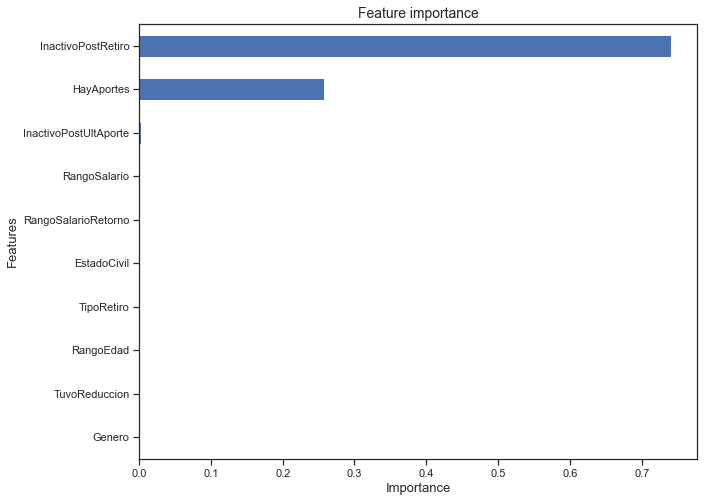

In [441]:
feature_importance = pd.Series(clsGB.feature_importances_, X_train.columns)
plt.figure(figsize = (10,8))
feature_importance.sort_values().plot(kind = 'barh')
plt.xlabel("Importance", fontsize = 13)
plt.ylabel("Features", fontsize = 13)
plt.title("Feature importance", fontsize = 14)

Based on feature importance graph, it tells that Totalcharges, Tenure, Monthly charges , Contract type, Payment method, Internet sevice type, PaperlessBilling are some important features to predict churn customers.

In [442]:
Desempleado_prob = pd.DataFrame({'Predicted_proba': clsGB.predict_proba(X_test)[:][:,1]
                                   , 'predicted': clsGB.predict(X_test)})
Desempleado_prob

,Predicted_proba,predicted
0,0.999955,1
1,0.999987,1
2,0.999673,1
3,0.999997,1
4,0.999997,1
...,...,...
376448,0.999994,1
376449,0.999966,1
376450,0.999993,1
376451,0.000027,0


### 5. Plan de Analisis


Predicción de Empleados 

Ya que generamos un modelo basado en desempleados y no, que ayudan a clasificar a ambos. Ahora podemos usar el mismo modelo en empleados para encontrar la probabilidad de desempleo.

In [444]:
empleado = df_model[df_model['Desempleado']==0]

empleado_feature ,empleado_target = Create_model_df(empleado
                                                    , cat_cols
                                                    , nominal_cols
                                                    , binary_cols
                                                    , num_cols
                                                    , [target_col])


#empleado_feature = empleado.drop(columns=['Desempleado'])
#empleado_target = empleado.Desempleado

In [445]:
empleado_prob = clsGB.predict_proba(empleado_feature)

In [446]:
empleado['Churn_proba'] = empleado_prob[:][:,1]

Text(0.5, 1.0, 'Distribución de probabilidad de desempleo de empleados activos')

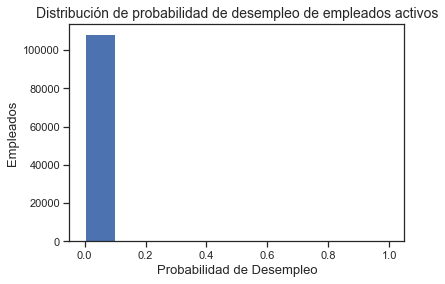

In [450]:
plt.hist(empleado['Churn_proba'], bins = 10)

plt.xlabel("Probabilidad de Desempleo", fontsize=13)
plt.ylabel("Empleados", fontsize=13)
plt.title("Distribución de probabilidad de desempleo de empleados activos", fontsize=14)

In [448]:
empleado.loc[empleado['Churn_proba'] >= 0.8 , 'Risk_type'] = 'Very high'
empleado.loc[(empleado['Churn_proba'] >= 0.6) & (empleado['Churn_proba'] < 0.8)  , 'Risk_type'] = 'High'
empleado.loc[(empleado['Churn_proba'] >= 0.4) & (empleado['Churn_proba'] < 0.6) , 'Risk_type'] = 'Medium'
empleado.loc[(empleado['Churn_proba'] >= 0.2) & (empleado['Churn_proba'] < 0.4) , 'Risk_type'] = 'Low'
empleado.loc[(empleado['Churn_proba'] > 0.0) & (empleado['Churn_proba'] < 0.2) , 'Risk_type'] = 'Very low'

In [449]:
empleado['Risk_type'].value_counts()

Very low     108315
Very high        36
Medium            2
Low               2
High              1
Name: Risk_type, dtype: int64

Text(0.5, 0, 'Empleados')

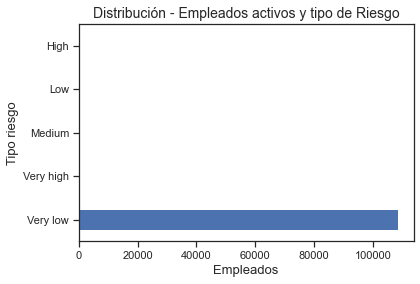

In [452]:
empleado['Risk_type'].value_counts().plot(kind = 'barh')
plt.title("Distribución - Empleados activos y tipo de Riesgo", fontsize=14)
plt.ylabel("Tipo riesgo", fontsize = 13)
plt.xlabel("Empleados", fontsize = 13)

We can provide retension plans to high risk and very high risk type customers.

## Conclusion

In this notebook, I have tried to divide customer churn prediction problem into steps like exploration, profiling, clustering, model selection & evaluation and retention plans. Based on this analysis, we can help retention team to analyze high risk churn customers before they leave the company.

Moreover, we can add different datasources like customer inquires, seasonality in sales, more demographic information to make our prediction accurate.

# **ANÁLISIS DE NOTAS PERIODÍSTICAS**

Análisis exploratorio de las notas periodísticas usando Procesamiento de Lenguaje Natural Básico. Con esta información se busca indagar si el tema referente al cierre de restaurantes y diferentes comercios identificados en el análisis anterior, realmente fue percibido como un problema por la población mexicana y que tipo de sentimientos fueron asociados en la propagación de las noticias. 

Las preguntas de investigación que se plantearon para este análisis fueron las siguientes:


*   ¿En qué meses o fechas exactas existieron un mayor número de noticias referentes al covid, FCL y jornada laboral?
*   ¿Cuál fue el sentimiento que predomino en la redacción de las notas periodisticas y si fueron sustentadas con hechos o meramente opiones?

## Definición de módulos

In [1]:
import locale
from datetime import datetime
import dateutil
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
#import plotly.express as px


## Extracción de notas periodísticas con Scrapy
Scrapy fue utilizado para rastrear el sitio web de La Jornada (se puede actualizar la programación hacia otro periodico) y extraer las noticias de manera eficiente sobre las palabras clave *'restaurantes'* y *'covid'*. Con el objetivo de analizar la conversación sobre unos de los sectores economicos mas afectados durante de la pandemia, con este análisis se logro corroborar que efectivamente el cierre y la reapertura fueron temas latentes durante durante el año 2020.  Los pasos que se siguieron para la extracción de las noticias fueron los siguientes:
1. Instalar los módulos scrapy y virtualenv:

> `pip install scrapy`

> `pip install virtualenv`

2. Se crea un ambiente virtual con Python y se activa:

```
virtualenv scrapyvenv
cd scrapyvenv
.\Scripts\activate
```
3. Se crea un proyecto Scrapy:

```
scrapy startproject webscrapy
```
4. Se crea una araña o spider:

```
cd webscrapy
scrapy genspider nacion www.nacion.com
```
5. Al terminar de codificar la araña, se ejecuta el siguiente comando para iniciar el proceso de extracción de información:

```
$ scrapy crawl nacion -a Keywords='despido,disminución,FCL,jornada,covid' -o nacion_covid.csv
```

## Exploración y trasformación inicial
Se lee el archivo CSV generado con el web crawler, el cual contiene el nombre del autor, el cuerpo de la nota periodística, la fecha de publicación, las palabras claves, el enlace, ubicación, la fuente de datos y el titulo de la noticia.

In [4]:
data = pd.read_csv(r'D:\Personal\Maestria BigData\Trabajo Fin Master\noticias.csv', sep=';',encoding='utf8')
data.head(10)

,Keywords,Titulo,Autor,Fecha,Link,resumen,Noticia
0,"Covid, FCL",Crisis disparó retiros del FCL en operadoras d...,"Yeryis Salas.,","22 agosto, 2020 ,",/el-pais/politica/crisis-disparo-retiros-del-f...,"195.000 asalariados, equivalentes al 18% de lo...","El 7 de abril, las operadoras de pensiones em..."
1,"Covid, FCL",#NoComaCuento: Sitio web para supuesto retiro...,"Nicole Pérez.,","12 mayo, 2020 ,",/no-coma-cuento/nocomacuento-sitio-web-para-s...,Criminales están empleando el sitio web fraud...,El portal suplanta las identidades de la Super...
2,"Covid, FCL",Delincuentes descubren en covid-19 una novedo...,"Eillyn Jiménez B..,","4 agosto, 2020 ,",/sucesos/judiciales/delincuentes-descubren-en...,"Karla Chinchilla, jefa de la Sección de Fraud...",El OIJ explicó que las modalidades de estafa s...
3,"Covid, FCL",CCSS habilita plataforma web para conocer dón...,"José Andrés Céspedes.,","15 abril, 2020 ,",/el-pais/servicios/ccss-habilita-plataforma-w...,La Caja Costarricense de Seguro Social (CCSS)...,Varias entidades financieras reportaron este l...
4,"Covid, FCL",Diputados aprueban entrega del FCL a asalaria...,"Aarón Sequeira.,","1 abril, 2020 ,",/el-pais/politica/diputados-autorizan-entrega...,Con 46 votos a favor este proyecto permitirá ...,"Los diputados Víctor Morales, del PAC, y Karin..."
5,"Covid, FCL",Jefes de fracción debaten plan sobre entrega ...,"Aarón Sequeira.,","31 marzo, 2020 ,",/el-pais/politica/jefes-de-fraccion-debaten-p...,Nueva versión del proyecto de ley se estudiab...,"Eduardo Cruickshank, de Restauración Nacional,..."
6,"Covid, FCL",Gobierno estima que hasta 500.000 asalariados...,"Aarón Sequeira.,","28 marzo, 2020 ,",/el-pais/politica/gobierno-estima-que-hasta-5...,Cifra equivale a más de un 40% de la població...,"Eduardo Cruickshank y Carlos Avendaño, del Pa..."
7,"Covid, FCL",#NoComaCuento: Delincuentes utilizan posible ...,"Nicole Pérez.,","26 marzo, 2020 ,",/no-coma-cuento/nocomacuento-delincuentes-uti...,"El Banco Nacional alertó, en sus redes social...","El Banco Nacional alertó, en sus redes social..."
8,"Covid, FCL",Grupo de diputados sugiere texto para entrega...,Josué Bravo.,"25 marzo, 2020",/el-pais/politica/diputados-alcanzan-acuerdo-...,Podrían retirar el FCL quienes sufran suspens...,Los trabajadores afectados salarialmente por ...
9,"Covid, Jornada Laboral","Digitalización y retos del Derecho Laboral,","Café Laboral, Alejandro Trejos G. Socio BDS A...","30 abril, 4:45 PM ,",/blogs/cafe-laboral/digitalizacion-y-retos-del...,El país puede aprovechar la tendencia al cambi...,Si bien el tema no es nuevo porque se viene ha...


Se reemplazan los acronimos de los meses al idioma Ingles, para que el parser del modulo dateutil reconozca la fecha en el texto de manera automática y se pueda convertir el string a un formato datetime.

In [5]:
data['Fecha'] = data['Fecha'].str.replace(r'Marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'agosto', 'aug')
data['Fecha'] = data['Fecha'].str.replace(r'abril', 'apr')
data['Fecha'] = data['Fecha'].str.replace(r'Abril', 'apr')
data['Fecha'] = data['Fecha'].str.replace(r'enero', 'jan')
data['Fecha'] = data['Fecha'].str.replace(r'febrero', 'feb')
data['Fecha'] = data['Fecha'].str.replace(r'marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'Marzo', 'mar')
data['Fecha'] = data['Fecha'].str.replace(r'mayo', 'may')
data['Fecha'] = data['Fecha'].str.replace(r'Mayo', 'may')
data['Fecha'] = data['Fecha'].str.replace(r'diciembre', 'dec')
data['Fecha'] = data['Fecha'].str.replace(r'noviembre', 'nov')
data['Fecha'] = data['Fecha'].str.replace(r'octubre', 'oct')
data['Fecha'] = data['Fecha'].str.replace(r'septiembre', 'sep')

In [96]:
data.Fecha

0         22 aug, 2020 ,
1         12 may, 2020 ,
2          4 aug, 2020 ,
3         15 apr, 2020 ,
4          1 apr, 2020 ,
5         31 mar, 2020 ,
6         28 mar, 2020 ,
7         26 mar, 2020 ,
8          25 mar, 2020 
9      30 apr, 4:45 PM ,
10              27 mar ,
11               2 feb ,
12               2 jan ,
13        16 dec, 2020 ,
14         3 dec, 2020 ,
15        24 nov, 2020 ,
16         5 nov, 2020 ,
17         8 oct, 2020 ,
18        22 sep, 2020 ,
19        12 may, 2020 ,
20        23 apr, 2020 ,
21         6 apr, 2020 ,
22         2 apr, 2020 ,
23        18 mar, 2020 ,
24        17 mar, 2020 ,
25          03 apr 2020,
26          01 apr 2020,
27          30 apr 2021,
28          28 may 2020,
29          18 apr 2020,
30          18 apr 2020,
31          07 apr 2020,
32          04 apr 2020,
33          03 apr 2020,
34          26 mar 2020,
35          25 mar 2020,
36          21 apr 2020,
Name: Fecha, dtype: object

In [6]:
data['Fecha'] = [dateutil.parser.parse(x, fuzzy_with_tokens=True)[0] for x in data['Fecha']]
data['year'] = pd.DatetimeIndex(data['Fecha']).year
data['month'] = pd.DatetimeIndex(data['Fecha']).month

Se corrobora la transformación del atributo date y los nuevos atributos agregados al dataframe.

In [7]:
data

,Keywords,Titulo,Autor,Fecha,Link,resumen,Noticia,year,month
0,"Covid, FCL",Crisis disparó retiros del FCL en operadoras d...,"Yeryis Salas.,",2020-08-22 00:00:00,/el-pais/politica/crisis-disparo-retiros-del-f...,"195.000 asalariados, equivalentes al 18% de lo...","El 7 de abril, las operadoras de pensiones em...",2020,8
1,"Covid, FCL",#NoComaCuento: Sitio web para supuesto retiro...,"Nicole Pérez.,",2020-05-12 00:00:00,/no-coma-cuento/nocomacuento-sitio-web-para-s...,Criminales están empleando el sitio web fraud...,El portal suplanta las identidades de la Super...,2020,5
2,"Covid, FCL",Delincuentes descubren en covid-19 una novedo...,"Eillyn Jiménez B..,",2020-08-04 00:00:00,/sucesos/judiciales/delincuentes-descubren-en...,"Karla Chinchilla, jefa de la Sección de Fraud...",El OIJ explicó que las modalidades de estafa s...,2020,8
3,"Covid, FCL",CCSS habilita plataforma web para conocer dón...,"José Andrés Céspedes.,",2020-04-15 00:00:00,/el-pais/servicios/ccss-habilita-plataforma-w...,La Caja Costarricense de Seguro Social (CCSS)...,Varias entidades financieras reportaron este l...,2020,4
4,"Covid, FCL",Diputados aprueban entrega del FCL a asalaria...,"Aarón Sequeira.,",2020-04-01 00:00:00,/el-pais/politica/diputados-autorizan-entrega...,Con 46 votos a favor este proyecto permitirá ...,"Los diputados Víctor Morales, del PAC, y Karin...",2020,4
5,"Covid, FCL",Jefes de fracción debaten plan sobre entrega ...,"Aarón Sequeira.,",2020-03-31 00:00:00,/el-pais/politica/jefes-de-fraccion-debaten-p...,Nueva versión del proyecto de ley se estudiab...,"Eduardo Cruickshank, de Restauración Nacional,...",2020,3
6,"Covid, FCL",Gobierno estima que hasta 500.000 asalariados...,"Aarón Sequeira.,",2020-03-28 00:00:00,/el-pais/politica/gobierno-estima-que-hasta-5...,Cifra equivale a más de un 40% de la població...,"Eduardo Cruickshank y Carlos Avendaño, del Pa...",2020,3
7,"Covid, FCL",#NoComaCuento: Delincuentes utilizan posible ...,"Nicole Pérez.,",2020-03-26 00:00:00,/no-coma-cuento/nocomacuento-delincuentes-uti...,"El Banco Nacional alertó, en sus redes social...","El Banco Nacional alertó, en sus redes social...",2020,3
8,"Covid, FCL",Grupo de diputados sugiere texto para entrega...,Josué Bravo.,2020-03-25 00:00:00,/el-pais/politica/diputados-alcanzan-acuerdo-...,Podrían retirar el FCL quienes sufran suspens...,Los trabajadores afectados salarialmente por ...,2020,3
9,"Covid, Jornada Laboral","Digitalización y retos del Derecho Laboral,","Café Laboral, Alejandro Trejos G. Socio BDS A...",2021-04-30 16:45:00,/blogs/cafe-laboral/digitalizacion-y-retos-del...,El país puede aprovechar la tendencia al cambi...,Si bien el tema no es nuevo porque se viene ha...,2021,4



En este paso, se cuentan los números de registros extraídos por año.

In [8]:
count_year = data.groupby('year').count()[['Link']].reset_index().rename(columns={'Link': 'count'})
count_year

,year,count
0,2020,32
1,2021,5


 se procede a analizar en cuales meses se cuenta con mayor número de noticias ejecutando un group by y conteo por enlace (link).

In [9]:
count_month = data.groupby('month').count()[['Link']].reset_index().rename(columns={'Link': 'count'})
count_month

,month,count
0,1,1
1,2,1
2,3,9
3,4,15
4,5,3
5,8,2
6,9,1
7,10,1
8,11,2
9,12,2



### Visualización sobre el número de noticias por mes en el año 2020

Con este análisis estadístico básico, se observó que en la nación no hubo un gran impacto en las noticias relacionadas, con FCL con covid y covid con jornada laboral. Si se notat como en los meses de febreo y marzo previos a la pandemia es que se realizron mayor cantidad de notas.

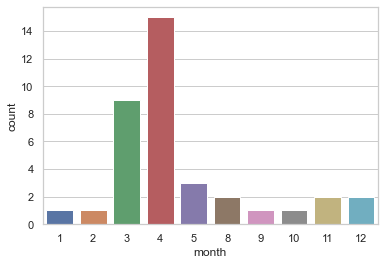

In [11]:
#fig = sns.countplot(count_month, x="month", y="count")
fig = sns.barplot(x="month", y="count", data=count_month)
#fig.show()

Este paso tiene como único objetivo concatenar todo el texto de las noticias por mes.

In [12]:
data_month = data.groupby(['month'])['Noticia'].apply(' '.join).reset_index()
data_month = data_month.set_index('month')
data_month

,Noticia
month,
1,"Actualmente, el INS mantiene asegurados a 1.4..."
2,Sin que tengamos claridad de los resultados f...
3,"Eduardo Cruickshank, de Restauración Nacional,..."
4,Varias entidades financieras reportaron este l...
5,El portal suplanta las identidades de la Super...
8,"El 7 de abril, las operadoras de pensiones em..."
9,Desde el pasado 6 de marzo Costa Rica reportó ...
10,Foto: Jorge Navarro La crisis del coronavirus...
11,Debido a la pandemia causada por el virus de ...


#### Limpieza de datos
En esta etapa se aplican filtros de limpieza que suelen usarse en los textos:

* Pasar textos a minúsculas
* Quitar signos de puntuación
* Quitar espacios extras y tabulaciones

In [13]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
 
round1 = lambda x: clean_text_round1(x)
 
data_clean = pd.DataFrame(data_month.Noticia.apply(round1))

def clean_text_round2(text):
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
 
round2 = lambda x: clean_text_round2(x)
 
data_clean = pd.DataFrame(data_clean.Noticia.apply(round2))
data_clean

,Noticia
month,
1,actualmente el ins mantiene asegurados a ...
2,sin que tengamos claridad de los resultados f...
3,eduardo cruickshank de restauración nacional ...
4,varias entidades financieras reportaron este l...
5,el portal suplanta las identidades de la super...
8,el de abril las operadoras de pensiones emp...
9,desde el pasado de marzo costa rica reportó e...
10,foto jorge navarro la crisis del coronavirus...
11,debido a la pandemia causada por el virus de ...


A partir del conjunto de datos limpio, se crea un "Bag of Words" contando el número de veces que una palabra aparece en las noticias y calculando la frecuencia de las mismas. En este paso, se incluye la lectura de las "stopwords" en español desde nuestro repositorio, las cuales nos permiten filtrar palabras vacías o sin significado para nuestro análisis como articulos, pronombres, preposiciones, etc.

In [14]:
master = "D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt"
#req = requests.get(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt')
#req = pd.read_fwf(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt', header=None,encoding = 'utf8')
with open(r'D:\Personal\Maestria BigData\Trabajo Fin Master\SinSignificado.txt', "r",encoding = 'utf8') as archivo:
    lista = [linea.rstrip() for linea in archivo]

In [15]:
cv = CountVectorizer(stop_words=lista)
#print(data_clean.Noticia)
#print(cv)
data_cv = cv.fit_transform(data_clean.Noticia)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
 
data_dtm

,aarón,abandonar,abarcaban,abierta,abogada,abogados,abriendo,abril,abrir,abuelos,...,ágil,ágiles,álvaro,ámbito,área,áreas,época,única,únicamente,único
month,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,0,0,0,3,1,0,...,1,0,3,1,1,0,0,1,0,0
4,0,0,0,0,0,0,1,8,1,0,...,0,2,0,0,2,0,1,0,1,1
5,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Análisis exploratorio

Con el dataframe transpuesto se inicia la exploración del dataset.

In [16]:
dt_data = data_dtm.transpose()
dt_data.head()

month,1,2,3,4,5,8,9,10,11,12
aarón,0,0,0,0,0,1,0,0,0,0
abandonar,0,0,0,0,0,0,1,0,0,0
abarcaban,0,0,1,0,0,0,0,0,0,0
abierta,0,0,1,0,0,0,0,0,0,0
abogada,0,0,0,0,0,0,0,1,0,0


Se extraen las palabras más usadas por meses, identificando las palabras como covid y sus sinónimos, FCL, jornada, reducción, estas palabras forman parte de la conversación habitual en las notas periodisticas sobre los FCL.

In [17]:
top_dict = {}
for c in dt_data.columns:
    top = dt_data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

for month, top_words in top_dict.items():
    print(month)
    print(', '.join([word+' '+str(count) for word, count in top_words[0:14]]))

1
ins 9, aviso 5, trabajadores 4, contagio 4, ccss 4, instituto 3, caso 3, covid 3, accidente 3, trabajador 3, nacional 3, casos 3, virus 3, centros 3
2
renta 9, trabajadores 6, año 5, declaración 5, global 5, proyecto 4, gastos 4, ingresos 4, colones 3, ley 3, ingreso 3, trabajador 3, contribuyentes 3, deberán 3
3
fcl 38, proyecto 21, personas 20, nacional 19, trabajadores 19, laboral 19, pandemia 18, pensiones 18, banco 16, height 16, datawrapper 16, emergencia 16, ley 16, retiro 16
4
laboral 33, pensiones 33, fcl 30, ley 27, personas 24, covid 17, suspensión 16, fondo 16, jornada 16, horas 16, contrato 16, reducción 15, emergencia 15, operadoras 14
5
ingreso 9, fuentes 9, personas 8, idea 6, generar 6, covid 6, cuarentena 5, proceso 5, persona 5, alfaro 5, mercado 4, crear 4, negocio 4, forma 4
8
millones 13, datos 12, covid 10, fcl 9, ingresos 9, personas 8, pensiones 8, abril 8, bancarias 6, estafadores 6, judicial 6, información 6, fraudes 6, víctimas 5
9
migración 6, extranjería

Dentro de este listado se observa que hay varias palabras muy usadas sin un significado útil para el análisis. Por lo que se procede a crear una lista de las palabras menos usadas, para posteriormente unificarlo a nuestro listado de stopwords. 

In [18]:
from collections import Counter

words = []
for anio in dt_data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

[('covid', 7), ('trabajadores', 5), ('personas', 5), ('laboral', 5), ('nacional', 4), ('ley', 4), ('fcl', 4), ('pandemia', 4), ('pensiones', 4), ('emergencia', 4), ('caso', 3), ('trabajador', 3), ('proyecto', 3), ('ingresos', 3), ('ingreso', 3), ('marzo', 3), ('banco', 3), ('lea', 3), ('país', 3), ('suspensión', 3), ('contrato', 3), ('medida', 3), ('contagio', 2), ('virus', 2), ('salud', 2), ('caja', 2), ('presentar', 2), ('año', 2), ('retiro', 2), ('operadoras', 2), ('fondo', 2), ('coronavirus', 2), ('jornada', 2), ('reducción', 2), ('rica', 2), ('importante', 2), ('información', 2), ('empresas', 2), ('medidas', 2), ('laborales', 2), ('acuerdo', 2), ('pago', 2), ('contratos', 2), ('relación', 2), ('temporal', 2), ('ins', 1), ('aviso', 1), ('ccss', 1), ('instituto', 1), ('accidente', 1), ('casos', 1), ('centros', 1), ('atención', 1), ('territorio', 1), ('brindadas', 1), ('contagiados', 1), ('paciente', 1), ('atenciones', 1), ('correo', 1), ('colaboradores', 1), ('consultasrt', 1), ('as

['covid']

En este paso, se actualiza la "Bag of Words" que se quitaran del conjunto de datos. Algunas de ellas se pueden incorporar manualmente a la lista.

In [19]:
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

stop_words = lista #req.text.split(sep='\n')
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['mesa','aviso','caso','debe','horas','dato','idea','día','nuevo','según','si','hora','año','function', 'recomendamos', 'además', 'intermediate', 'display','ad','gpt','dijo','div','más','también', 'interarticle','pues','parte','está', 'cmd', 'push', 'googletag','alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','cualquier','cuales','así','foto','hogar','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Noticia)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

### **Nubes de palabras por mes**
Se generan nubes de palabras para identificar los topicos principales por meses. Observando que en el mes de Julio, se mencionó varias veces la reapertura de servicios de comida en varias regiones del país.

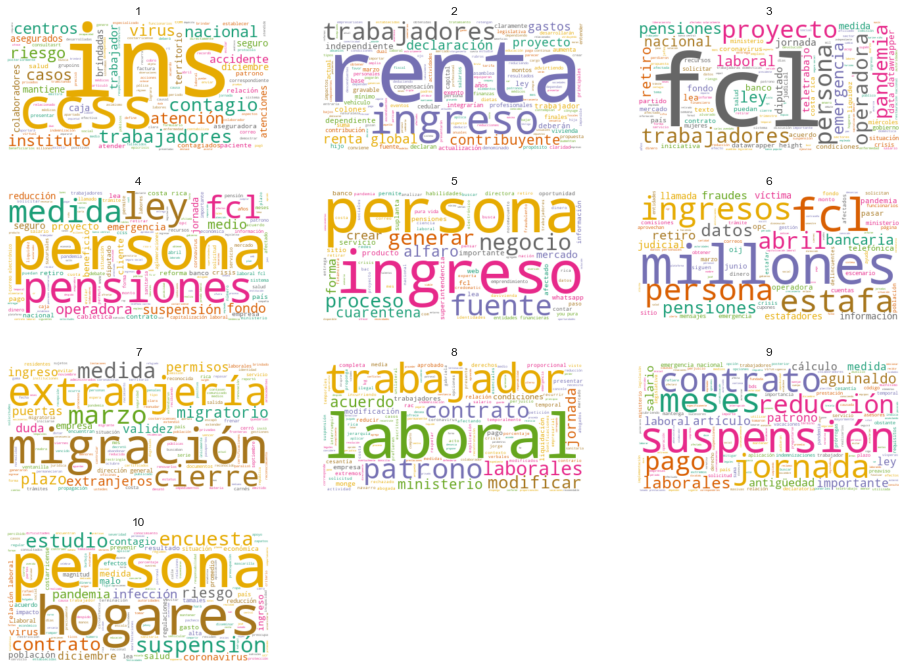

In [20]:
from wordcloud import WordCloud
anios = ['1','2','3','4','5','6','7','8','9','10','11','12']

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]

for index, mes in enumerate(dt_data.columns):
    wc.generate(data_clean.Noticia[mes])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
plt.show()

## **Análisis de sentimientos**
Para cada noticia se analiza su polaridad y subjetividad, la primera asigna un valor positivo o negativo dependiendo del sentimiento identificado. 

# ADVERTENCIA: Este fragmento del código tarda debido a la traducción al idioma inglés con el módulo textblob.

In [21]:
import nltk
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

traducir = lambda x: TextBlob(x).translate(to="en")

data['blob_en'] = data['Noticia'].apply(traducir)
data['polarity'] = data['blob_en'].apply(pol2)
data['subjectivity'] = data['blob_en'].apply(sub2)
data.to_csv('translated_news.csv', index=False) # Generación del archivo que contiene las noticias traducidas

Este dataframe (mismo que se genera en el paso anterior), contiene las notas periodisticas traducidas al idioma inglés.

In [22]:
data = pd.read_csv(r'C:\Users\OREAMUNOAE\Desktop\Maestria\translated_news.csv',sep=',',encoding = 'utf8')
#data = data.drop("Unnamed: 0", axis=1)
data

,Keywords,Titulo,Autor,Fecha,Link,resumen,Noticia,year,month,blob_en,polarity,subjectivity
0,"Covid, FCL",Crisis disparó retiros del FCL en operadoras d...,"Yeryis Salas.,",2020-08-22 00:00:00,/el-pais/politica/crisis-disparo-retiros-del-f...,"195.000 asalariados, equivalentes al 18% de lo...","El 7 de abril, las operadoras de pensiones em...",2020,8,"On April 7, pension operators began to deliver...",0.084201,0.343924
1,"Covid, FCL",#NoComaCuento: Sitio web para supuesto retiro...,"Nicole Pérez.,",2020-05-12 00:00:00,/no-coma-cuento/nocomacuento-sitio-web-para-s...,Criminales están empleando el sitio web fraud...,El portal suplanta las identidades de la Super...,2020,5,The portal impersonates the identities of the ...,0.018939,0.349242
2,"Covid, FCL",Delincuentes descubren en covid-19 una novedo...,"Eillyn Jiménez B..,",2020-08-04 00:00:00,/sucesos/judiciales/delincuentes-descubren-en...,"Karla Chinchilla, jefa de la Sección de Fraud...",El OIJ explicó que las modalidades de estafa s...,2020,8,The OIJ explained that the fraud modalities re...,0.029465,0.418525
3,"Covid, FCL",CCSS habilita plataforma web para conocer dón...,"José Andrés Céspedes.,",2020-04-15 00:00:00,/el-pais/servicios/ccss-habilita-plataforma-w...,La Caja Costarricense de Seguro Social (CCSS)...,Varias entidades financieras reportaron este l...,2020,4,Several financial entities reported this Monda...,0.085501,0.298969
4,"Covid, FCL",Diputados aprueban entrega del FCL a asalaria...,"Aarón Sequeira.,",2020-04-01 00:00:00,/el-pais/politica/diputados-autorizan-entrega...,Con 46 votos a favor este proyecto permitirá ...,"Los diputados Víctor Morales, del PAC, y Karin...",2020,4,"Deputies Víctor Morales, from the PAC, and Kar...",0.109211,0.469737
5,"Covid, FCL",Jefes de fracción debaten plan sobre entrega ...,"Aarón Sequeira.,",2020-03-31 00:00:00,/el-pais/politica/jefes-de-fraccion-debaten-p...,Nueva versión del proyecto de ley se estudiab...,"Eduardo Cruickshank, de Restauración Nacional,...",2020,3,"Eduardo Cruickshank, from the National Restora...",-0.008202,0.430270
6,"Covid, FCL",Gobierno estima que hasta 500.000 asalariados...,"Aarón Sequeira.,",2020-03-28 00:00:00,/el-pais/politica/gobierno-estima-que-hasta-5...,Cifra equivale a más de un 40% de la població...,"Eduardo Cruickshank y Carlos Avendaño, del Pa...",2020,3,"Eduardo Cruickshank and Carlos Avendaño, from ...",0.079041,0.516042
7,"Covid, FCL",#NoComaCuento: Delincuentes utilizan posible ...,"Nicole Pérez.,",2020-03-26 00:00:00,/no-coma-cuento/nocomacuento-delincuentes-uti...,"El Banco Nacional alertó, en sus redes social...","El Banco Nacional alertó, en sus redes social...",2020,3,"The National Bank warned, in its social networ...",-0.032917,0.356667
8,"Covid, FCL",Grupo de diputados sugiere texto para entrega...,Josué Bravo.,2020-03-25 00:00:00,/el-pais/politica/diputados-alcanzan-acuerdo-...,Podrían retirar el FCL quienes sufran suspens...,Los trabajadores afectados salarialmente por ...,2020,3,Workers affected by the national emergency in ...,0.074569,0.440367
9,"Covid, Jornada Laboral","Digitalización y retos del Derecho Laboral,","Café Laboral, Alejandro Trejos G. Socio BDS A...",2021-04-30 16:45:00,/blogs/cafe-laboral/digitalizacion-y-retos-del...,El país puede aprovechar la tendencia al cambi...,Si bien el tema no es nuevo porque se viene ha...,2021,4,Although the subject is not new because it has...,0.071802,0.363532


### **Visualización sobre las métricas subjetividad y polaridad en las noticias**
Se genera una visualización global con las métricas de subjetividad y polaridad de tal modo que se pueda observar que tipos de sentimientos predominaron durante el año 2020, observando que gran parte de las noticias se basaron en hechos y no en opiniones, y que el sentimiento que predomino principalemente fue el positivo aunque muy cercano a un estado neutral.

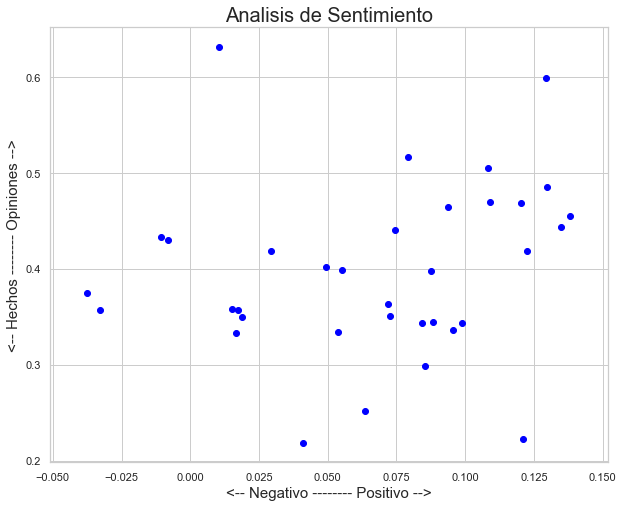

In [23]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, anio in enumerate(data.index):
    x = data.polarity.loc[anio]
    y = data.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-0.051, 0.152) 
    
plt.title('Analisis de Sentimiento', fontsize=20)
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15)
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15)

plt.show()

### **Distribución de la polaridad**
Con esta distribución de la polaridad, se corrobora lo anteriormente mencionado.

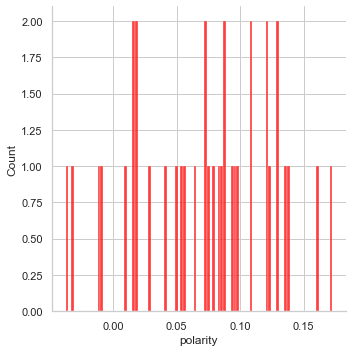

In [24]:
#fig = px.histogram(data, x="polarity", nbins=50)
#fig.show()
#fig = sns.countplot(count_month, x="month", y="count")
#fig = sns.barplot(data,x="polarity", nbins=50 )
sns.displot(data['polarity'], kde=False, color='red', bins=100)
#fig.show()

###### **Serie de tiempo: Polaridad y fecha de publicación de la nota periodística**
Finalmente, para este análisis de sentimientos se ordenan los registros por fecha para generar una visualización por día de publicación y su polaridad de tal manera que se pueda identificar que días se predominaron noticias más positivas o negativas. Observando que el 26 y 31 de marzo y 22 de setiembre se tuvieron las noticias con mayor percepción negativa y el 8 de octubre y 5 y 24 de noviembre con mayor positividad.

In [25]:
data = data.sort_values(by=['Fecha'])

<ipython-input-26-75acf9b4a65e>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(labels=data['Fecha'],rotation=75)


<function matplotlib.pyplot.show(close=None, block=None)>

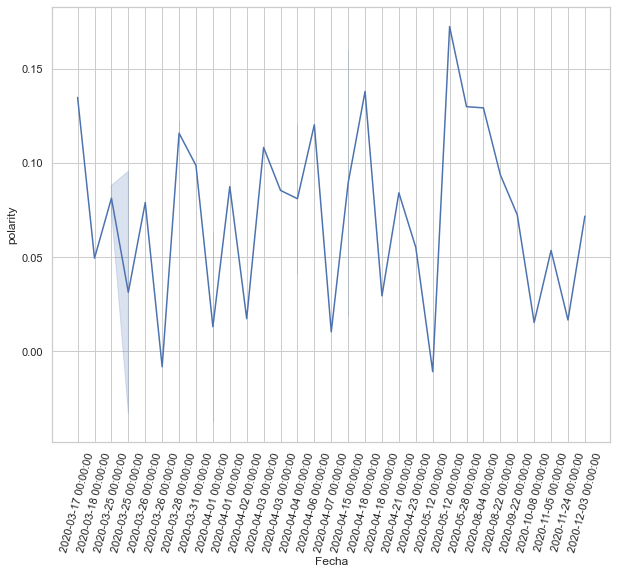

In [26]:
g=sns.lineplot(data=data, x="Fecha", y="polarity")
g.set_xticklabels(labels=data['Fecha'],rotation=75)
plt.show